In [2]:
import numpy as np
from nonlinear_model import discrete_nonlinear
from Koopman_numpy import Koopman_numpy
from MPC import *
import time

# Test Koopman operater in numpy

In [5]:
file_name = 'real_encoder_[3, 32, 64, 8]_decoder_[11, 128, 64, 32, 3]_hyper_[1.0, 3.0, 0.3, 1e-07, 1e-07, 1e-07, 10]_batch_10'
operater = Koopman_numpy(file_name)
x = np.array([1.,1.,0.3])
nonlinear_x = x
u = np.array([0.5,0.3])
lifted_x = operater.encode(x)
for i in range(5):
    next_lifted_x = operater.linear(lifted_x,u)
    nonlinear_x = discrete_nonlinear(nonlinear_x,u,0.1)
next_x = operater.decode(next_lifted_x)
print(next_x,nonlinear_x)
operater.property()

[1.03119509 1.01537881 0.30433126] [[1.23376368 1.08798932 0.45      ]]
The system is uncontrollable, the rank of the controllability matrix is 5.


In [4]:
file_name = 'real_encoder_[3, 32, 64, 8]_decoder_[11, 128, 64, 32, 3]_hyper_[1.0, 3.0, 0.3, 1e-07, 1e-07, 1e-07, 10]_batch_10'
operater = Koopman_numpy(file_name)
A,B = operater.linear_matrix()
print(A,B)

[[ 1.000812    0.          0.          0.         -0.         -0.
  -0.          0.          0.         -0.         -0.        ]
 [-0.          1.0008715   0.         -0.          0.          0.
   0.          0.         -0.         -0.         -0.        ]
 [ 0.         -0.          0.99281    -0.          0.          0.
  -0.          0.          0.         -0.         -0.        ]
 [-0.          0.         -0.          1.0020866   0.         -0.
  -0.         -0.         -0.         -0.         -0.        ]
 [ 0.         -0.         -0.          0.          0.99686694 -0.
  -0.          0.         -0.          0.          0.        ]
 [ 0.         -0.          0.          0.          0.          0.99478245
  -0.          0.          0.          0.         -0.        ]
 [ 0.         -0.          0.         -0.          0.         -0.
   0.9994833   0.         -0.         -0.          0.        ]
 [-0.          0.         -0.         -0.          0.          0.
   0.          1.000307

In [ ]:
Ae = np.linalg.eigvals(A)
print(Ae)

# Test MPC function

In [1]:
# get augmented matrices
A,B = operater.linear_matrix()
Q = np.diag(np.array([1.,2.,3.,4.,5.,6.,7.,8.,9.,10.,11.]))
R = np.diag(np.array([1.,2.]))
rho = 1.
Gamma,Theta,Qbig,H = get_Augmented_Matrix(A,B,Q,R,rho,3,2)
print(Gamma.shape)
print(Theta.shape)
print(Qbig.shape)
print(H.shape)

NameError: name 'operater' is not defined

In [1]:
#%matplotlib notebook
import numpy as np
from nonlinear_model import discrete_nonlinear
from Koopman_numpy import Koopman_numpy
from MPC import *
import time

In [2]:
SimLength = 40
init_x = np.array([-2.,0.,-np.pi/2])
path=simulate_path(init_x,SimLength)

./dataset/MPC/SimLenth_40_Ts_0.1


[-1.51189146 -1.39408174 -1.27627202 -1.15846229 -1.04065257 -0.92284284
 -0.80503312 -0.68722339 -0.56941367 -0.45160394 -0.33379422 -0.21598449
 -0.09817477  0.01963495  0.13744468  0.2552544   0.37306413  0.49087385
  0.60868358  0.7264933   0.84430303  0.96211275  1.07992247  1.1977322
  1.31554192  1.43335165  1.55116137  1.6689711   1.78678082  1.90459055
  2.02240027  2.14021     2.25801972  2.37582944  2.49363917  2.61144889
  2.72925862  2.84706834  2.96487807  3.08268779]


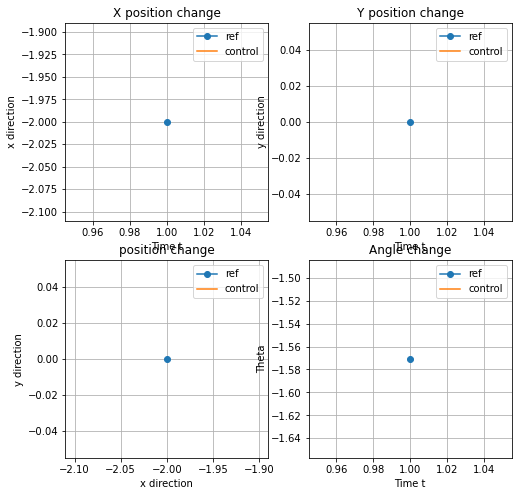

Point 2 ,Step 1 - MSE error in lifted space,state x, input u:
0.19859340580640197 [-2.         -0.03696585 -1.52079633] [0.36965846 0.5       ]
Point 2 ,Step 2 - MSE error in lifted space,state x, input u:
0.15318527358758616 [-1.99772996 -0.08232883 -1.47079633] [0.45419748 0.5       ]
Point 2 ,Step 3 - MSE error in lifted space,state x, input u:
0.10583791503179565 [-1.9930011  -0.1294597  -1.42079633] [0.47367514 0.5       ]
Point 2 ,Step 4 - MSE error in lifted space,state x, input u:
0.05834281228843743 [-1.98585649 -0.17673266 -1.37079632] [0.47809804 0.5       ]
Point 2 ,Step 5 - MSE error in lifted space,state x, input u:
0.015039074678973467 [-1.97634355 -0.22366148 -1.32079632] [0.47883304 0.5       ]
Point 2 ,Step 6 - MSE error in lifted space,state x, input u:
0.04110800576589187 [-1.9645037  -0.27003008 -1.27079632] [0.47856338 0.5       ]
Point 2 ,Step 7 - MSE error in lifted space,state x, input u:
0.0881751309768807 [-1.95038374 -0.31567606 -1.22079632] [0.47780003 0.5 

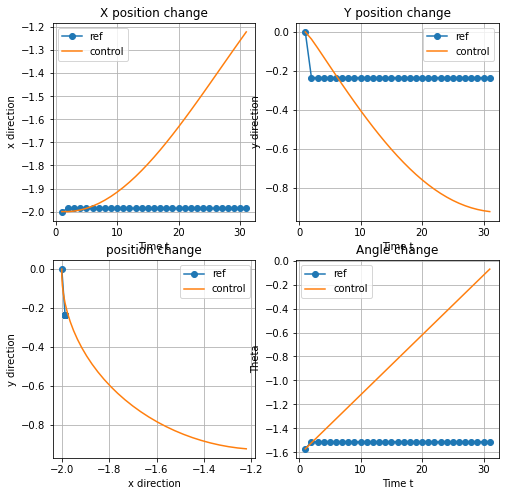

Point 3 ,Step 1 - MSE error in lifted space,state x, input u:
1.0585988097554064 [-1.18432728 -0.92625694 -0.02079631] [0.36926863 0.5       ]
Point 3 ,Step 2 - MSE error in lifted space,state x, input u:
1.086788449098366 [-1.14808339 -0.92701079  0.02920369] [0.36251736 0.5       ]
Point 3 ,Step 3 - MSE error in lifted space,state x, input u:
1.1137895734257475 [-1.11253062 -0.92597222  0.07920369] [0.35567935 0.5       ]
Point 3 ,Step 4 - MSE error in lifted space,state x, input u:
1.139597688378132 [-1.07775954 -0.92321245  0.12920369] [0.3488043 0.5      ]
Point 3 ,Step 5 - MSE error in lifted space,state x, input u:
1.1642117343844134 [-1.04385289 -0.91880704  0.17920369] [0.34191635 0.5       ]
Point 3 ,Step 6 - MSE error in lifted space,state x, input u:
1.187633501644872 [-1.0108861  -0.91283521  0.22920369] [0.33503321 0.5       ]
Point 3 ,Step 7 - MSE error in lifted space,state x, input u:
1.2098673884244098 [-0.97892729 -0.90537911  0.27920369] [0.32817052 0.5       ]
Poin

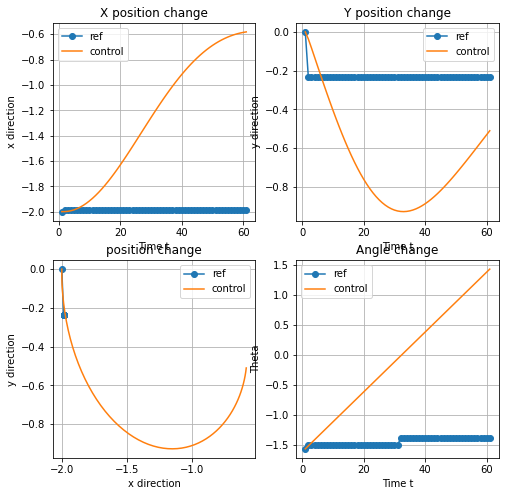

Point 4 ,Step 1 - MSE error in lifted space,state x, input u:
1.365852260668403 [-0.57907577 -0.48956319  1.4792037 ] [0.20522251 0.50000014]
Point 4 ,Step 2 - MSE error in lifted space,state x, input u:
1.367517955057285 [-0.5772242  -0.46940445  1.5292037 ] [0.20243597 0.50000007]
Point 4 ,Step 3 - MSE error in lifted space,state x, input u:
1.3684580419534753 [-0.57639313 -0.44943498  1.57920371] [0.19986755 0.50000002]
Point 4 ,Step 4 - MSE error in lifted space,state x, input u:
1.3686863673787095 [-0.57655915 -0.42968898  1.62920371] [0.19746703 0.5       ]
Point 4 ,Step 5 - MSE error in lifted space,state x, input u:
1.3682160946182464 [-0.57769863 -0.41020193  1.67920371] [0.19520339 0.5       ]
Point 4 ,Step 6 - MSE error in lifted space,state x, input u:
1.3670598551810735 [-0.57978773 -0.39100665  1.72920371] [0.19308626 0.5       ]
Point 4 ,Step 7 - MSE error in lifted space,state x, input u:
1.365229738855041 [-0.5828024  -0.372135    1.77920371] [0.19110923 0.5       ]
Po

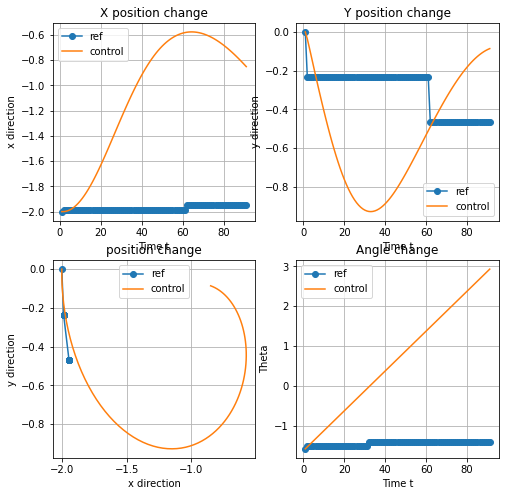

Point 5 ,Step 1 - MSE error in lifted space,state x, input u:
1.1424759436177006 [-0.86894286 -0.08229725  2.9792037 ] [0.18107076 0.5       ]
Point 5 ,Step 2 - MSE error in lifted space,state x, input u:
1.1266057807277938 [-0.88688403 -0.07935792  3.0292037 ] [0.18180355 0.5       ]
Point 5 ,Step 3 - MSE error in lifted space,state x, input u:
1.110304356829125 [-0.905027   -0.07731022  3.0792037 ] [0.18258155 0.5       ]
Point 5 ,Step 4 - MSE error in lifted space,state x, input u:
1.0935123834315403 [-0.92341721 -0.07616138  3.1292036 ] [0.18426062 0.49999901]
Point 5 ,Step 5 - MSE error in lifted space,state x, input u:
1.075569723373421 [-0.94274502 -0.07592192  3.16315788] [0.19329292 0.33954283]
Point 5 ,Step 6 - MSE error in lifted space,state x, input u:
1.0565794431844964 [-0.96298394 -0.07635844  3.17238263] [0.20243624 0.09224742]
Point 5 ,Step 7 - MSE error in lifted space,state x, input u:
1.0370556591162545 [-0.98376714 -0.07699856  3.1722299 ] [ 0.20793055 -0.00152726]

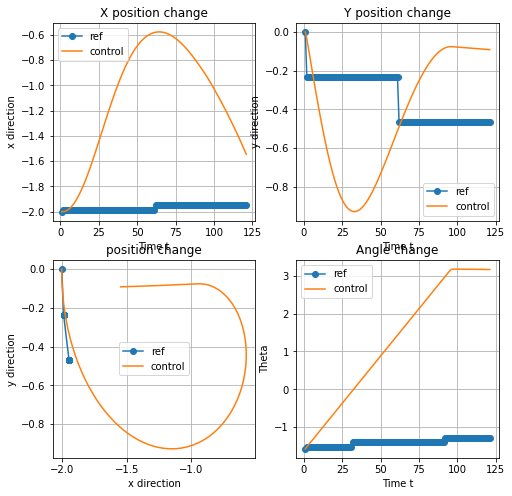

Point 6 ,Step 1 - MSE error in lifted space,state x, input u:
0.6719296136765719 [-1.57432513 -0.09202528  3.1626249 ] [ 0.28519192 -0.00448541]
Point 6 ,Step 2 - MSE error in lifted space,state x, input u:
0.6588937225000309 [-1.60321702 -0.09263303  3.16203638] [ 0.28898277 -0.00588521]
Point 6 ,Step 3 - MSE error in lifted space,state x, input u:
0.6467503965925627 [-1.63249316 -0.09323162  3.16147141] [ 0.29282264 -0.00564966]
Point 6 ,Step 4 - MSE error in lifted space,state x, input u:
0.6356016972117792 [-1.66215903 -0.09382142  3.16093218] [ 0.29671731 -0.00539234]
Point 6 ,Step 5 - MSE error in lifted space,state x, input u:
0.6255541342904449 [-1.69222032 -0.09440287  3.16039755] [ 0.30066906 -0.00534627]
Point 6 ,Step 6 - MSE error in lifted space,state x, input u:
0.6167181445223604 [-1.7226825  -0.09497577  3.15985695] [ 0.30467574 -0.00540599]
Point 6 ,Step 7 - MSE error in lifted space,state x, input u:
0.6092060004540467 [-1.75355093 -0.09553962  3.15930805] [ 0.3087357

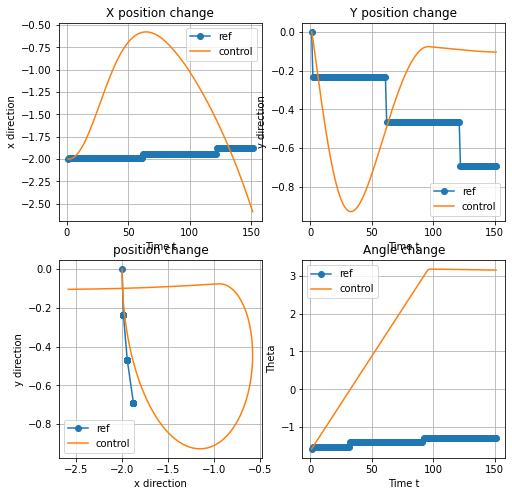

Point 7 ,Step 1 - MSE error in lifted space,state x, input u:
0.9565911040387158 [-2.63118272 -0.10457483  3.15075783] [0.42294749 0.03897723]
Point 7 ,Step 2 - MSE error in lifted space,state x, input u:
0.9905623241433107 [-2.67408707 -0.10496807  3.15233443] [0.42906157 0.01576592]
Point 7 ,Step 3 - MSE error in lifted space,state x, input u:
1.025661818675265 [-2.71760177 -0.10543551  3.15226018] [ 0.43517206 -0.00074249]
Point 7 ,Step 4 - MSE error in lifted space,state x, input u:
1.0618757867748627 [-2.76170722 -0.10590602  3.15173301] [ 0.44107964 -0.0052717 ]
Point 7 ,Step 5 - MSE error in lifted space,state x, input u:
1.099171225956138 [-2.80639772 -0.10635922  3.15121649] [ 0.44692796 -0.00516519]
Point 7 ,Step 6 - MSE error in lifted space,state x, input u:
1.1375189893046103 [-2.85168291 -0.10679505  3.15065375] [ 0.45287286 -0.00562734]
Point 7 ,Step 7 - MSE error in lifted space,state x, input u:
1.1768978922893178 [-2.89757633 -0.1072109   3.14993056] [ 0.45895309 -0.0

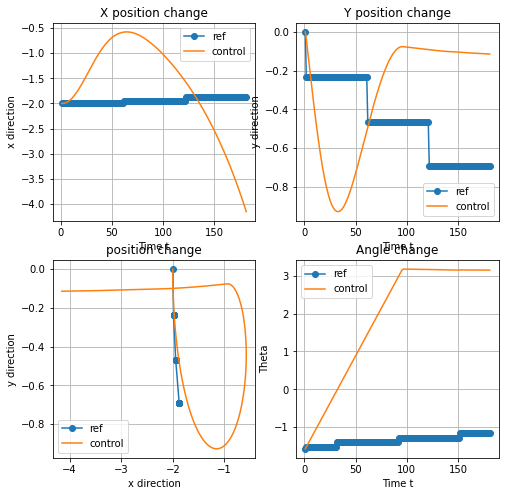

Point 8 ,Step 1 - MSE error in lifted space,state x, input u:
2.5607447273807282 [-4.21669454 -0.11441965  3.14390868] [ 0.64399236 -0.0172911 ]
Point 8 ,Step 2 - MSE error in lifted space,state x, input u:
2.6228825453413904 [-4.28201571 -0.11457094  3.14170366] [ 0.65321352 -0.02205016]
Point 8 ,Step 3 - MSE error in lifted space,state x, input u:
2.6861026153466927 [-4.34826701 -0.11457829  3.13929421] [ 0.662513   -0.02409453]
Point 8 ,Step 4 - MSE error in lifted space,state x, input u:
2.7505497806666406 [-4.41560197 -0.11442352  3.13862484] [ 0.67335141 -0.00669374]
Point 8 ,Step 5 - MSE error in lifted space,state x, input u:
2.8164019655579353 [-4.48424605 -0.1142198   3.14026033] [0.68644377 0.01635493]
Point 8 ,Step 6 - MSE error in lifted space,state x, input u:
2.883712950971626 [-4.55430368 -0.11412646  3.1425418 ] [0.70057695 0.02281468]
Point 8 ,Step 7 - MSE error in lifted space,state x, input u:
2.952521466837884 [-4.6258284  -0.11419435  3.14449227] [0.71524752 0.019

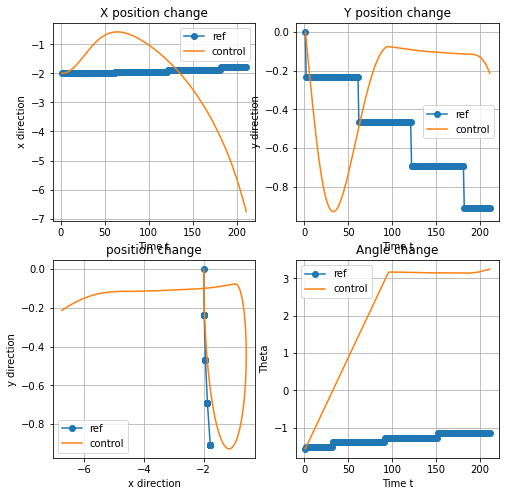

Point 9 ,Step 1 - MSE error in lifted space,state x, input u:
5.136705813626152 [-6.87330343 -0.22643209  3.26138276] [1.18109379 0.11259813]
Point 9 ,Step 2 - MSE error in lifted space,state x, input u:
5.253607739218915 [-6.99309078 -0.24085046  3.26944316] [1.20651978 0.08060407]
Point 9 ,Step 3 - MSE error in lifted space,state x, input u:
5.372936857492557 [-7.11531451 -0.25656253  3.27539119] [1.23229496 0.05948025]
Point 9 ,Step 4 - MSE error in lifted space,state x, input u:
5.49478516727082 [-7.24002609 -0.27334905  3.28107667] [1.25836263 0.05685484]
Point 9 ,Step 5 - MSE error in lifted space,state x, input u:
5.619207332341554 [-7.36726943 -0.29121347  3.28704185] [1.28491269 0.05965179]
Point 9 ,Step 6 - MSE error in lifted space,state x, input u:
5.7462502778957525 [-7.49708836 -0.31022982  3.293188  ] [1.31204325 0.06146146]
Point 9 ,Step 7 - MSE error in lifted space,state x, input u:
5.875965425283908 [-7.62952893 -0.33046242  3.29938375] [1.33977099 0.06195758]
Point 

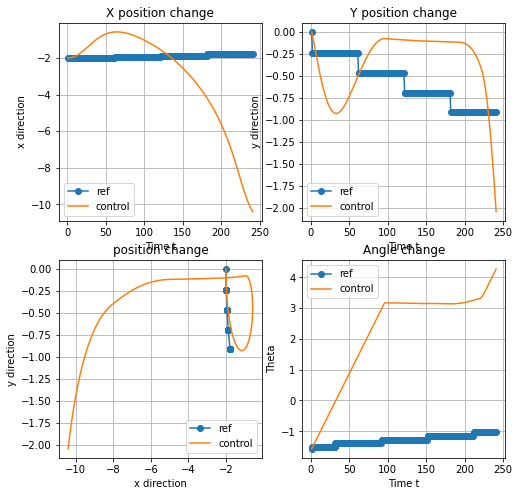

Point 10 ,Step 1 - MSE error in lifted space,state x, input u:
8.868765461842075 [-10.46718299  -2.17898526   4.31736965] [1.5 0.5]
Point 10 ,Step 2 - MSE error in lifted space,state x, input u:
8.943691308034998 [-10.5249069   -2.31743363   4.36736965] [1.5 0.5]
Point 10 ,Step 3 - MSE error in lifted space,state x, input u:
9.013980834465606 [-10.57563913  -2.45859397   4.41736965] [1.5 0.5]
Point 10 ,Step 4 - MSE error in lifted space,state x, input u:
9.079567979585969 [-10.61925288  -2.60211344   4.46736965] [1.5 0.5]
Point 10 ,Step 5 - MSE error in lifted space,state x, input u:
9.140391715147885 [-10.65563914  -2.74763334   4.51736965] [1.5 0.5]
Point 10 ,Step 6 - MSE error in lifted space,state x, input u:
9.196395955889137 [-10.68470697  -2.89478993   4.56736965] [1.5 0.5]
Point 10 ,Step 7 - MSE error in lifted space,state x, input u:
9.247529480867547 [-10.7063837   -3.04321539   4.61736965] [1.5 0.5]
Point 10 ,Step 8 - MSE error in lifted space,state x, input u:
9.29374586516

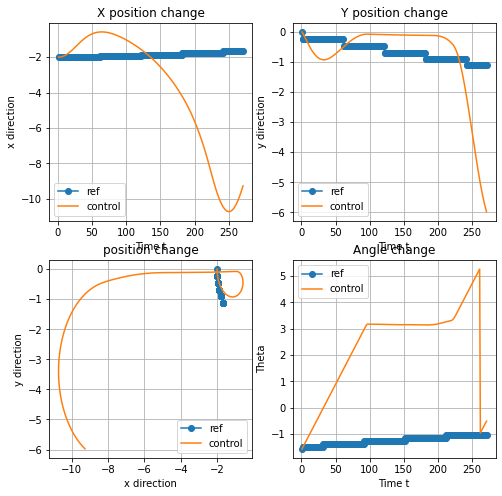

Point 11 ,Step 1 - MSE error in lifted space,state x, input u:
8.965045744739493 [-9.1442148  -6.0510353  -0.46791785] [1.5        0.49999995]
Point 11 ,Step 2 - MSE error in lifted space,state x, input u:
8.891559107074302 [-9.0103384  -6.11868963 -0.41791785] [1.5        0.49999995]
Point 11 ,Step 3 - MSE error in lifted space,state x, input u:
8.81348480236461 [-8.87324801 -6.17956839 -0.36791786] [1.5        0.49999995]
Point 11 ,Step 4 - MSE error in lifted space,state x, input u:
8.730897621540459 [-8.73328627 -6.2335194  -0.31791786] [1.5        0.49999995]
Point 11 ,Step 5 - MSE error in lifted space,state x, input u:
8.643877700451455 [-8.59080302 -6.28040782 -0.26791787] [1.5        0.49999996]
Point 11 ,Step 6 - MSE error in lifted space,state x, input u:
8.552510667590575 [-8.44615439 -6.32011644 -0.21791787] [1.5        0.49999996]
Point 11 ,Step 7 - MSE error in lifted space,state x, input u:
8.456887812451518 [-8.29970193 -6.35254602 -0.16791787] [1.5        0.49999996]


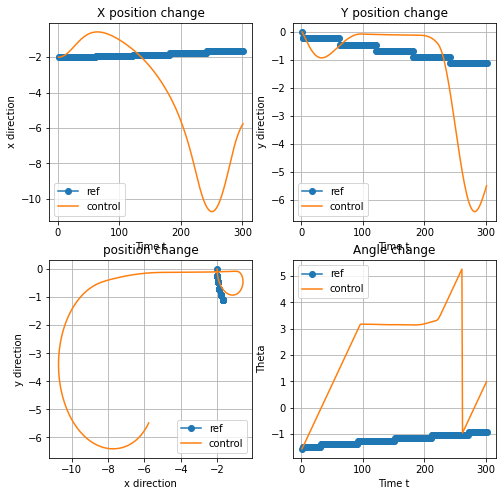

Point 12 ,Step 1 - MSE error in lifted space,state x, input u:
5.8713824912116905 [-5.71519946 -5.40745371  1.03208199] [0.93709268 0.5       ]
Point 12 ,Step 2 - MSE error in lifted space,state x, input u:
5.782157321154712 [-5.66784404 -5.32822209  1.08208199] [0.92304845 0.5       ]
Point 12 ,Step 3 - MSE error in lifted space,state x, input u:
5.695630137783903 [-5.62513866 -5.24790924  1.13208199] [0.90961004 0.5       ]
Point 12 ,Step 4 - MSE error in lifted space,state x, input u:
5.611959369165038 [-5.58703504 -5.16670137  1.18208199] [0.89702868 0.5       ]
Point 12 ,Step 5 - MSE error in lifted space,state x, input u:
5.531300274134771 [-5.55348099 -5.08477287  1.23208199] [0.88533339 0.49999994]
Point 12 ,Step 6 - MSE error in lifted space,state x, input u:
5.453797229811927 [-5.52441875 -5.00227788  1.28208198] [0.87464491 0.49999994]
Point 12 ,Step 7 - MSE error in lifted space,state x, input u:
5.379560089943281 [-5.4997797  -4.9193218   1.33208197] [0.86537824 0.49999991

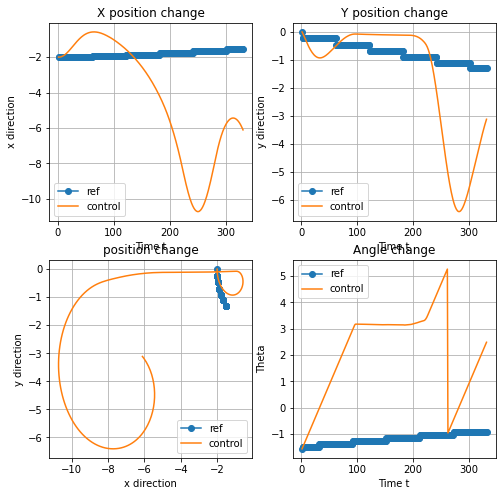

Point 13 ,Step 1 - MSE error in lifted space,state x, input u:
4.98784737098122 [-6.18968656 -3.05395482  2.53208202] [0.99634806 0.5       ]
Point 13 ,Step 2 - MSE error in lifted space,state x, input u:
5.045882482096614 [-6.27274809 -2.99596203  2.58208202] [1.01303411 0.5       ]
Point 13 ,Step 3 - MSE error in lifted space,state x, input u:
5.110372123499056 [-6.36007994 -2.94126889  2.63208202] [1.03044615 0.5       ]
Point 13 ,Step 4 - MSE error in lifted space,state x, input u:
5.181196334263566 [-6.45161025 -2.8901294   2.68208202] [1.04847717 0.5       ]
Point 13 ,Step 5 - MSE error in lifted space,state x, input u:
5.258205006777587 [-6.547249   -2.84280358  2.73208202] [1.06707565 0.5       ]
Point 13 ,Step 6 - MSE error in lifted space,state x, input u:
5.341220105236844 [-6.6468878  -2.7995554   2.78208202] [1.08619964 0.5       ]
Point 13 ,Step 7 - MSE error in lifted space,state x, input u:
5.430037605462155 [-6.75039891 -2.76065135  2.83208202] [1.10580625 0.5       ]


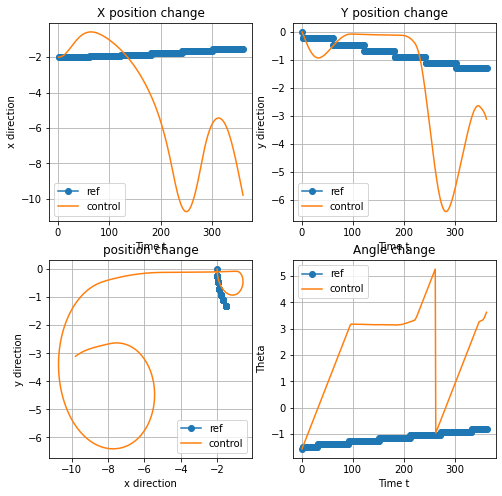

Point 14 ,Step 1 - MSE error in lifted space,state x, input u:
8.739451027492798 [-9.92822702 -3.17814271  3.67330561] [1.5 0.5]
Point 14 ,Step 2 - MSE error in lifted space,state x, input u:
8.881257420551393 [-10.05751799  -3.25419429   3.72330561] [1.5 0.5]
Point 14 ,Step 3 - MSE error in lifted space,state x, input u:
9.020767752510071 [-10.1828464   -3.33661269   3.77330561] [1.5 0.5]
Point 14 ,Step 4 - MSE error in lifted space,state x, input u:
9.157746130616351 [-10.30389897  -3.42519189   3.82330561] [1.5 0.5]
Point 14 ,Step 5 - MSE error in lifted space,state x, input u:
9.29196962719999 [-10.42037314  -3.51971049   3.87330561] [1.5 0.5]
Point 14 ,Step 6 - MSE error in lifted space,state x, input u:
9.423227538957446 [-10.53197779  -3.61993226   3.92330561] [1.5 0.5]
Point 14 ,Step 7 - MSE error in lifted space,state x, input u:
9.551320708277908 [-10.63843396  -3.72560668   3.97330561] [1.5 0.5]
Point 14 ,Step 8 - MSE error in lifted space,state x, input u:
9.676060903475888

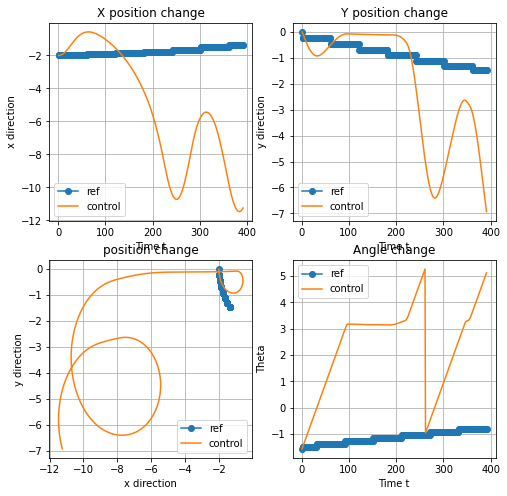

Point 15 ,Step 1 - MSE error in lifted space,state x, input u:
11.31677738782559 [-11.191891    -7.06830575   5.17330569] [1.5        0.49999999]
Point 15 ,Step 2 - MSE error in lifted space,state x, input u:
11.32626796501576 [-11.1251756   -7.20265252   5.22330568] [1.5        0.49999999]
Point 15 ,Step 3 - MSE error in lifted space,state x, input u:
11.330248746075991 [-11.05182904  -7.33349701   5.27330568] [1.5        0.50000001]
Point 15 ,Step 4 - MSE error in lifted space,state x, input u:
11.328715589410626 [-10.97203464  -7.46051219   5.32330569] [1.5        0.50000001]
Point 15 ,Step 5 - MSE error in lifted space,state x, input u:
11.321670089700461 [-10.88599185  -7.58338056   5.37330569] [1.5        0.50000001]
Point 15 ,Step 6 - MSE error in lifted space,state x, input u:
11.309119579610854 [-10.79391573  -7.70179504   5.42330569] [1.5        0.50000001]
Point 15 ,Step 7 - MSE error in lifted space,state x, input u:
11.291077139299421 [-10.69603643  -7.81545965   5.4733056

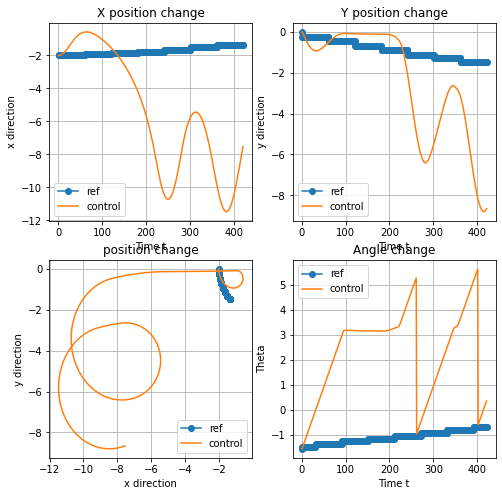

Point 16 ,Step 1 - MSE error in lifted space,state x, input u:
9.357228681739187 [-7.40086084 -8.60398338  0.39012038] [1.5        0.49999998]
Point 16 ,Step 2 - MSE error in lifted space,state x, input u:
9.224512880537004 [-7.2641286  -8.54775968  0.44012038] [1.47840481 0.49999998]
Point 16 ,Step 3 - MSE error in lifted space,state x, input u:
9.09281678808722 [-7.1340492  -8.4865017   0.49012038] [1.43781744 0.49999998]
Point 16 ,Step 4 - MSE error in lifted space,state x, input u:
8.96252666763299 [-7.01080694 -8.42074668  0.54012038] [1.39686713 0.49999998]
Point 16 ,Step 5 - MSE error in lifted space,state x, input u:
8.833865909057774 [-6.89440102 -8.35095048  0.59012037] [1.35727112 0.49999998]
Point 16 ,Step 6 - MSE error in lifted space,state x, input u:
8.707031998169217 [-6.78479166 -8.2775418   0.64012037] [1.31920606 0.49999998]
Point 16 ,Step 7 - MSE error in lifted space,state x, input u:
8.582209537295775 [-6.6819159  -8.20092704  0.69012037] [1.28270194 0.49999998]
P

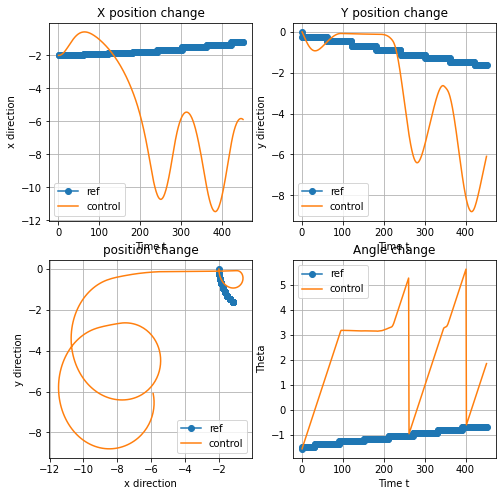

Point 17 ,Step 1 - MSE error in lifted space,state x, input u:
6.453564266278949 [-5.9081434  -6.00565812  1.8901201 ] [0.9183738  0.49999999]
Point 17 ,Step 2 - MSE error in lifted space,state x, input u:
6.4160065375474185 [-5.93694371 -5.91855315  1.94012012] [0.91742749 0.50000015]
Point 17 ,Step 3 - MSE error in lifted space,state x, input u:
6.383769781713186 [-5.9701054  -5.83288295  1.99012012] [0.91864468 0.5       ]
Point 17 ,Step 4 - MSE error in lifted space,state x, input u:
6.357002216549749 [-6.00760078 -5.74876766  2.04012012] [0.92093902 0.5       ]
Point 17 ,Step 5 - MSE error in lifted space,state x, input u:
6.33585224319922 [-6.04939835 -5.66634547  2.09012012] [0.9241458 0.5      ]
Point 17 ,Step 6 - MSE error in lifted space,state x, input u:
6.320460841622099 [-6.09546566 -5.58576091  2.14012013] [0.9282278  0.50000014]
Point 17 ,Step 7 - MSE error in lifted space,state x, input u:
6.310958742187546 [-6.14577051 -5.50716141  2.19012014] [0.93319126 0.50000011]
P

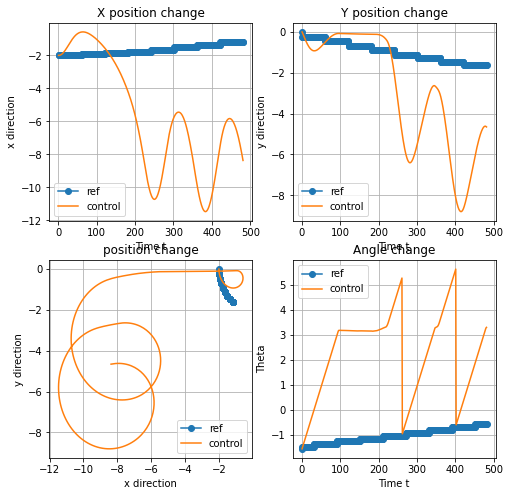

Point 18 ,Step 1 - MSE error in lifted space,state x, input u:
8.078373637499833 [-8.50543768 -4.67524759  3.3122247 ] [1.36293146 0.2085311 ]
Point 18 ,Step 2 - MSE error in lifted space,state x, input u:
8.214896441782725 [-8.64268279 -4.69889595  3.33843657] [1.39267602 0.26211871]
Point 18 ,Step 3 - MSE error in lifted space,state x, input u:
8.355520698137095 [-8.78259681 -4.7267985   3.37008491] [1.42669151 0.31648344]
Point 18 ,Step 4 - MSE error in lifted space,state x, input u:
8.500508020752969 [-8.9251172  -4.75994212  3.40710901] [1.46323476 0.37024096]
Point 18 ,Step 5 - MSE error in lifted space,state x, input u:
8.649814324358703 [-9.06986077 -4.79930325  3.44941956] [1.5        0.42310554]
Point 18 ,Step 6 - MSE error in lifted space,state x, input u:
8.799606792549614 [-9.21280991 -4.84475151  3.4971107 ] [1.5        0.47691135]
Point 18 ,Step 7 - MSE error in lifted space,state x, input u:
8.949605320442798 [-9.35342985 -4.89696292  3.5471107 ] [1.5 0.5]
Point 18 ,Ste

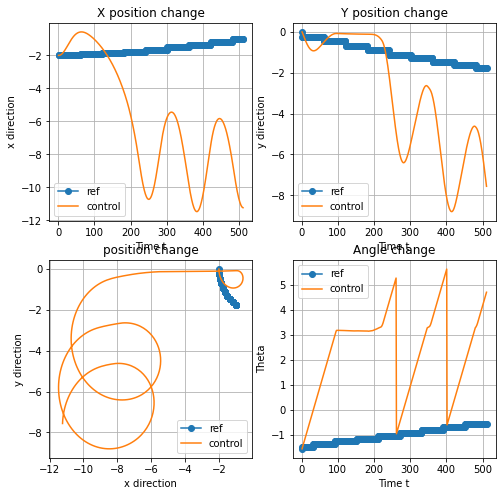

Point 19 ,Step 1 - MSE error in lifted space,state x, input u:
11.870663897588829 [-11.23927982  -7.71183801   4.74711075] [1.5        0.50000001]
Point 19 ,Step 2 - MSE error in lifted space,state x, input u:
11.942246978158797 [-11.2340726   -7.8617476    4.79711075] [1.5        0.50000001]
Point 19 ,Step 3 - MSE error in lifted space,state x, input u:
12.008656315845938 [-11.22137953  -8.01120958   4.84711075] [1.5        0.50000001]
Point 19 ,Step 4 - MSE error in lifted space,state x, input u:
12.069812619212714 [-11.20123234  -8.1598504    4.89711075] [1.5        0.50000001]
Point 19 ,Step 5 - MSE error in lifted space,state x, input u:
12.125643600707734 [-11.17368138  -8.3072985    4.94711075] [1.5        0.50000001]
Point 19 ,Step 6 - MSE error in lifted space,state x, input u:
12.176083864725568 [-11.13879552  -8.45318537   4.99711075] [1.5        0.50000001]
Point 19 ,Step 7 - MSE error in lifted space,state x, input u:
12.221074808937441 [-11.09666196  -8.59714634   5.04711

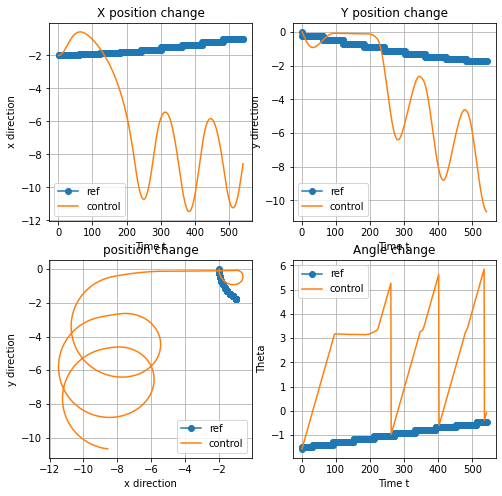

Point 20 ,Step 1 - MSE error in lifted space,state x, input u:
11.687173871759391 [ -8.42223794 -10.67738864  -0.03607455] [1.5 0.5]
Point 20 ,Step 2 - MSE error in lifted space,state x, input u:
11.59364062989904 [ -8.27233553 -10.68279865   0.01392544] [1.5        0.49999992]
Point 20 ,Step 3 - MSE error in lifted space,state x, input u:
11.495487047972544 [ -8.12235007 -10.68070991   0.06392543] [1.5        0.49999994]
Point 20 ,Step 4 - MSE error in lifted space,state x, input u:
11.392842308482535 [ -7.97265645 -10.67112762   0.11392543] [1.5        0.49999997]
Point 20 ,Step 5 - MSE error in lifted space,state x, input u:
11.285844028185227 [ -7.82362883 -10.65407575   0.16392543] [1.5        0.49999999]
Point 20 ,Step 6 - MSE error in lifted space,state x, input u:
11.174638532827306 [ -7.67563968 -10.62959691   0.21392543] [1.5        0.50000001]
Point 20 ,Step 7 - MSE error in lifted space,state x, input u:
11.059381158811025 [ -7.52905892 -10.59775229   0.26392543] [1.5      

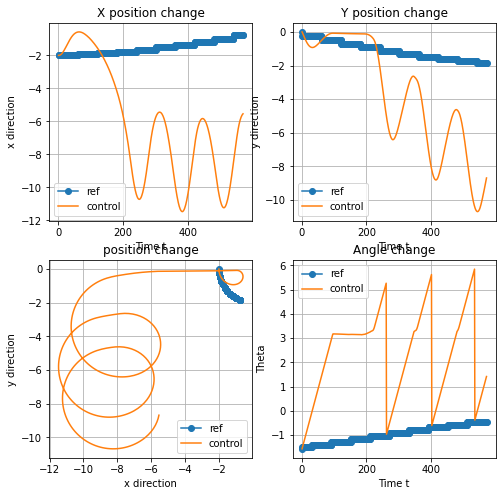

Point 21 ,Step 1 - MSE error in lifted space,state x, input u:
8.249779020654447 [-5.52770943 -8.58414884  1.46392552] [1.00303203 0.49999992]
Point 21 ,Step 2 - MSE error in lifted space,state x, input u:
8.163265908664807 [-5.51712708 -8.48550606  1.51392551] [0.99208789 0.49999991]
Point 21 ,Step 3 - MSE error in lifted space,state x, input u:
8.08045386462861 [-5.51154443 -8.38744814  1.56392551] [0.98216705 0.49999995]
Point 21 ,Step 4 - MSE error in lifted space,state x, input u:
8.001493945430505 [-5.51087571 -8.29012285  1.6139255 ] [0.97327588 0.49999995]
Point 21 ,Step 5 - MSE error in lifted space,state x, input u:
7.926536497812748 [-5.51503816 -8.1936714   1.6639255 ] [0.96541223 0.49999995]
Point 21 ,Step 6 - MSE error in lifted space,state x, input u:
7.855731823680101 [-5.52395233 -8.09823     1.71392549] [0.95856791 0.49999995]
Point 21 ,Step 7 - MSE error in lifted space,state x, input u:
7.789230249354112 [-5.53754222 -8.00393078  1.76392549] [0.95273433 0.49999995]


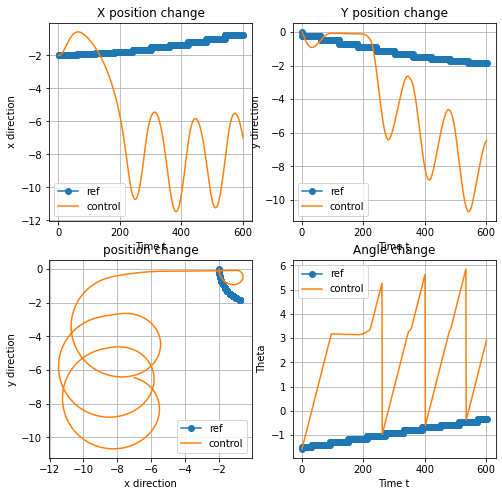

Point 22 ,Step 1 - MSE error in lifted space,state x, input u:
7.965162998233147 [-7.11320153 -6.42765502  2.96392544] [1.1105599 0.5      ]
Point 22 ,Step 2 - MSE error in lifted space,state x, input u:
8.046036501623139 [-7.22446042 -6.40767731  3.01392544] [1.13038263 0.5       ]
Point 22 ,Step 3 - MSE error in lifted space,state x, input u:
8.13302451087217 [-7.33861893 -6.39302331  3.06392544] [1.15095201 0.5       ]
Point 22 ,Step 4 - MSE error in lifted space,state x, input u:
8.226003788146265 [-7.45550041 -6.38392716  3.11392543] [1.172349   0.49999994]
Point 22 ,Step 5 - MSE error in lifted space,state x, input u:
8.324831970756813 [-7.57491171 -6.38062253  3.16392543] [1.19457018 0.49999994]
Point 22 ,Step 6 - MSE error in lifted space,state x, input u:
8.429364332543143 [-7.69666112 -6.38334199  3.21392542] [1.21779776 0.49999994]
Point 22 ,Step 7 - MSE error in lifted space,state x, input u:
8.539492910749757 [-7.82059827 -6.39232237  3.26392542] [1.24262075 0.49999994]
Po

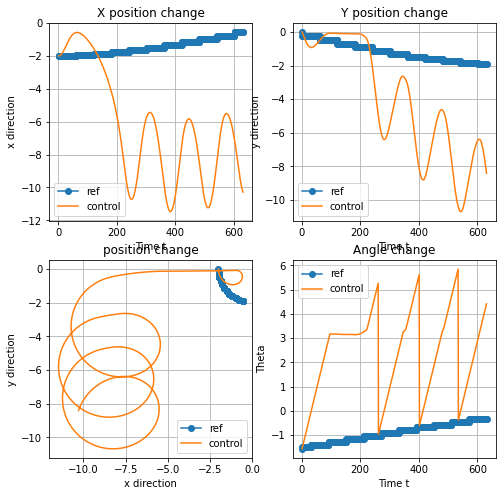

Point 23 ,Step 1 - MSE error in lifted space,state x, input u:
11.817635678016625 [-10.32977795  -8.54859216   4.4639254 ] [1.5        0.49999999]
Point 23 ,Step 2 - MSE error in lifted space,state x, input u:
11.930093033706022 [-10.3666652   -8.69398587   4.5139254 ] [1.5        0.49999999]
Point 23 ,Step 3 - MSE error in lifted space,state x, input u:
12.038336579738397 [-10.3962397   -8.84104147   4.5639254 ] [1.5        0.49999999]
Point 23 ,Step 4 - MSE error in lifted space,state x, input u:
12.142211978966793 [-10.41842752  -8.9893914    4.61392539] [1.5        0.49999999]
Point 23 ,Step 5 - MSE error in lifted space,state x, input u:
12.241574004003294 [-10.4331732   -9.13866485   4.66392539] [1.5 0.5]
Point 23 ,Step 6 - MSE error in lifted space,state x, input u:
12.336286267447145 [-10.4404399   -9.28848873   4.71392539] [1.5 0.5]
Point 23 ,Step 7 - MSE error in lifted space,state x, input u:
12.426220975126158 [-10.44020943  -9.43848856   4.76392539] [1.5 0.5]
Point 23 ,Ste

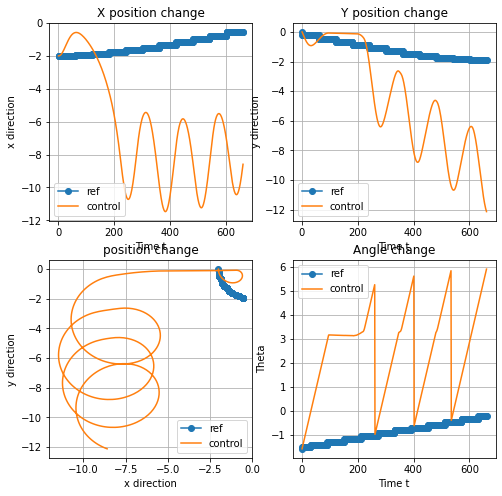

Point 24 ,Step 1 - MSE error in lifted space,state x, input u:
13.056396551833378 [ -8.453559   -12.18315098   5.96392544] [1.5        0.50000004]
Point 24 ,Step 2 - MSE error in lifted space,state x, input u:
13.005166248165853 [ -8.3111388  -12.23023057   6.01392545] [1.5        0.50000004]
Point 24 ,Step 3 - MSE error in lifted space,state x, input u:
12.94844465525089 [ -8.16654359 -12.27013327   6.06392545] [1.5        0.50000005]
Point 24 ,Step 4 - MSE error in lifted space,state x, input u:
12.886302030461131 [ -8.02013479 -12.30275936   6.11392546] [1.5        0.50000005]
Point 24 ,Step 5 - MSE error in lifted space,state x, input u:
12.818816052775277 [ -7.87227833 -12.32802729  -0.11925983] [1.5        0.50000018]
Point 24 ,Step 6 - MSE error in lifted space,state x, input u:
12.746071936211647 [ -7.72334378 -12.34587389  -0.06925981] [1.5        0.50000018]
Point 24 ,Step 7 - MSE error in lifted space,state x, input u:
12.66816256283215 [ -7.57370341 -12.35625455  -0.0192598

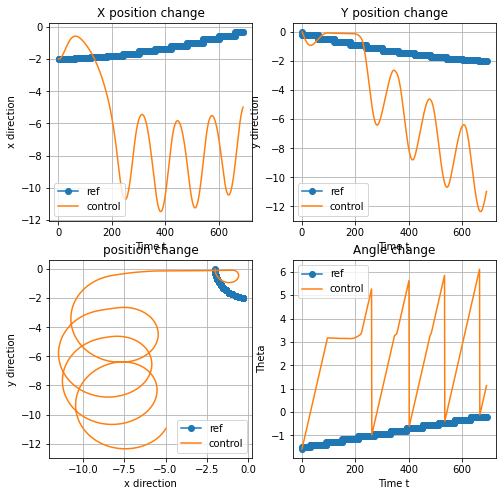

Point 25 ,Step 1 - MSE error in lifted space,state x, input u:
10.036575517889702 [ -4.94560559 -10.87878048   1.18074051] [1.02857955 0.50000009]
Point 25 ,Step 2 - MSE error in lifted space,state x, input u:
9.935855983745947 [ -4.90715173 -10.78524613   1.23074052] [1.01130479 0.50000009]
Point 25 ,Step 3 - MSE error in lifted space,state x, input u:
9.837291068549144 [ -4.87394527 -10.69138943   1.28074053] [0.99557768 0.50000009]
Point 25 ,Step 4 - MSE error in lifted space,state x, input u:
9.741015163116387 [ -4.84588881 -10.59738962   1.33074054] [0.98097544 0.50000009]
Point 25 ,Step 5 - MSE error in lifted space,state x, input u:
9.64716485245632 [ -4.82288733 -10.50342005   1.38074055] [0.96743726 0.50000009]
Point 25 ,Step 6 - MSE error in lifted space,state x, input u:
9.555875076948038 [ -4.80484709 -10.40964492   1.43074056] [0.95494637 0.5000001 ]
Point 25 ,Step 7 - MSE error in lifted space,state x, input u:
9.467279182963944 [ -4.79167611 -10.31621965   1.48074057] [0

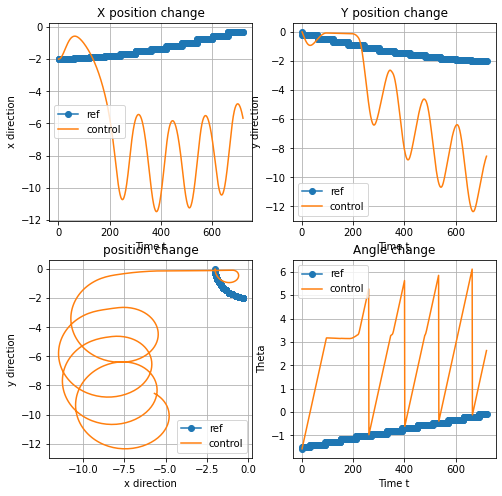

Point 26 ,Step 1 - MSE error in lifted space,state x, input u:
8.634359019208713 [-5.75570793 -8.50397025  2.68074069] [0.96795951 0.50000004]
Point 26 ,Step 2 - MSE error in lifted space,state x, input u:
8.659783367323735 [-5.84357955 -8.46034108  2.73074069] [0.98106714 0.50000004]
Point 26 ,Step 3 - MSE error in lifted space,state x, input u:
8.691380260544953 [-5.93482389 -8.42059099  2.7807407 ] [0.99526876 0.50000004]
Point 26 ,Step 4 - MSE error in lifted space,state x, input u:
8.729207821445376 [-6.02932209 -8.38492966  2.8307407 ] [1.01003168 0.50000003]
Point 26 ,Step 5 - MSE error in lifted space,state x, input u:
8.77325819127939 [-6.12684581 -8.35359849  2.8807407 ] [1.02432992 0.50000003]
Point 26 ,Step 6 - MSE error in lifted space,state x, input u:
8.823539634810887 [-6.22726014 -8.32679449  2.93074071] [1.03930227 0.50000003]
Point 26 ,Step 7 - MSE error in lifted space,state x, input u:
8.88004720580701 [-6.33043077 -8.30471255  2.98074071] [1.05507304 0.50000003]
P

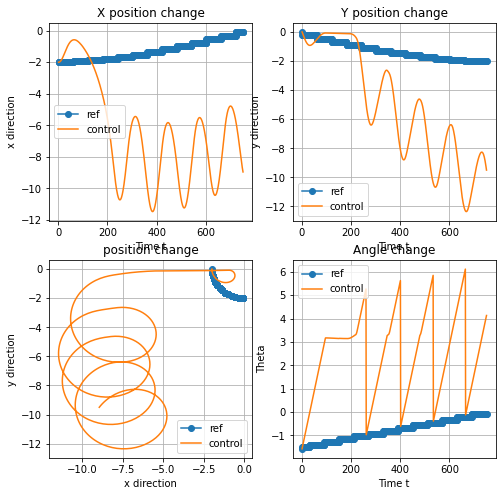

Point 27 ,Step 1 - MSE error in lifted space,state x, input u:
11.769747861795592 [-9.03965737 -9.62898723  4.18074071] [1.5 0.5]
Point 27 ,Step 2 - MSE error in lifted space,state x, input u:
11.911571032444217 [-9.11570059 -9.75828313  4.23074071] [1.5        0.50000001]
Point 27 ,Step 3 - MSE error in lifted space,state x, input u:
12.051018380579649 [-9.18518667 -9.89121801  4.28074071] [1.5        0.50000001]
Point 27 ,Step 4 - MSE error in lifted space,state x, input u:
12.187828818766864 [ -9.24794194 -10.02745962   4.33074072] [1.5        0.50000001]
Point 27 ,Step 5 - MSE error in lifted space,state x, input u:
12.321753843863577 [ -9.30380953 -10.16666742   4.38074072] [1.5        0.50000001]
Point 27 ,Step 6 - MSE error in lifted space,state x, input u:
12.452557127857004 [ -9.35264982 -10.30849347   4.43074072] [1.5        0.49999999]
Point 27 ,Step 7 - MSE error in lifted space,state x, input u:
12.580014121858 [ -9.39434072 -10.45258326   4.48074071] [1.5 0.5]
Point 27 ,S

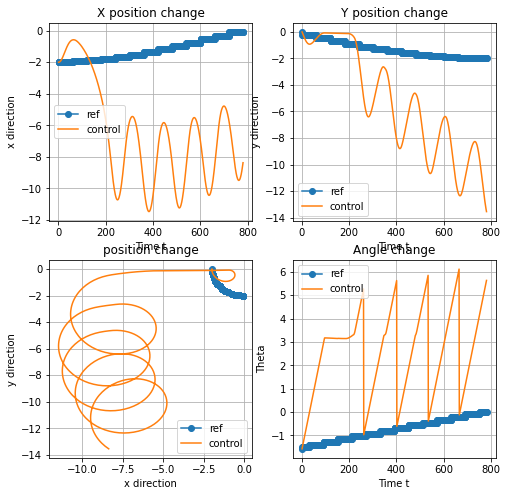

Point 28 ,Step 1 - MSE error in lifted space,state x, input u:
14.36810573867022 [ -8.25371715 -13.64302673   5.68074083] [1.5        0.50000011]
Point 28 ,Step 2 - MSE error in lifted space,state x, input u:
14.36545529172026 [ -8.13012421 -13.72802548   5.73074084] [1.5        0.50000011]
Point 28 ,Step 3 - MSE error in lifted space,state x, input u:
14.356874332767955 [ -8.00243757 -13.80674092   5.78074085] [1.5        0.50000011]
Point 28 ,Step 4 - MSE error in lifted space,state x, input u:
14.342373693240997 [ -7.87097637 -13.87897632   5.83074086] [1.5        0.50000012]
Point 28 ,Step 5 - MSE error in lifted space,state x, input u:
14.321971706530682 [ -7.73606919 -13.94455112   5.88074087] [1.5        0.50000013]
Point 28 ,Step 6 - MSE error in lifted space,state x, input u:
14.295694230868767 [ -7.59805324 -14.00330142   5.93074089] [1.5        0.50000013]
Point 28 ,Step 7 - MSE error in lifted space,state x, input u:
14.26357468177221 [ -7.45727349 -14.05508037   5.9807409 

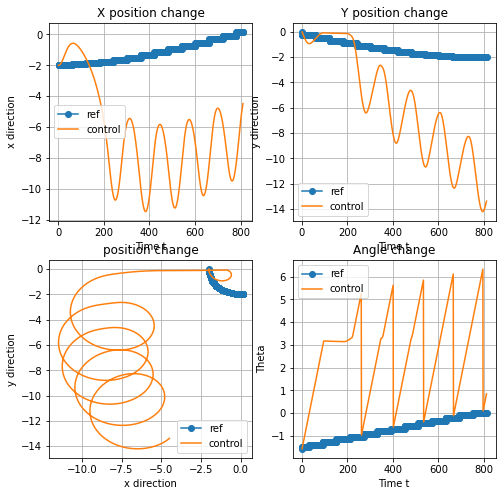

Point 29 ,Step 1 - MSE error in lifted space,state x, input u:
12.19841509344014 [ -4.40930188 -13.3053759    0.89755616] [1.0920188  0.50000034]
Point 29 ,Step 2 - MSE error in lifted space,state x, input u:
12.096469215338663 [ -4.34295016 -13.2221806    0.9475562 ] [1.06414329 0.50000033]
Point 29 ,Step 3 - MSE error in lifted space,state x, input u:
11.995659440097018 [ -4.28232788 -13.13784381   0.99755623] [1.03864118 0.50000033]
Point 29 ,Step 4 - MSE error in lifted space,state x, input u:
11.896129669030689 [ -4.22730465 -13.05260907   1.04755626] [1.01452044 0.50000033]
Point 29 ,Step 5 - MSE error in lifted space,state x, input u:
11.798022604053086 [ -4.17775144 -12.96670925   1.0975563 ] [0.99168035 0.50000033]
Point 29 ,Step 6 - MSE error in lifted space,state x, input u:
11.701472634214815 [ -4.13353695 -12.88036104   1.14755633] [0.97009967 0.50000033]
Point 29 ,Step 7 - MSE error in lifted space,state x, input u:
11.606606586207764 [ -4.09452892 -12.79376587   1.197556

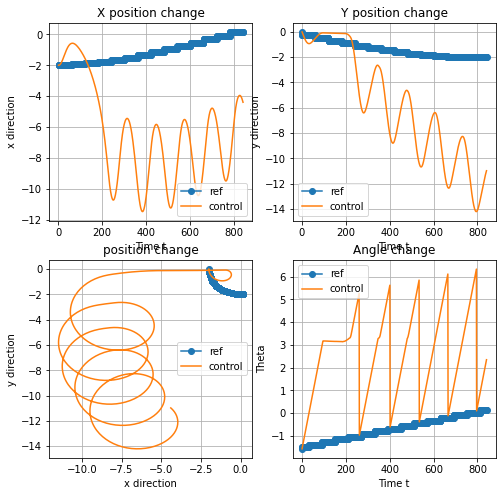

Point 30 ,Step 1 - MSE error in lifted space,state x, input u:
10.184736039713748 [ -4.45558476 -10.9196622    2.39755658] [0.84201877 0.50000005]
Point 30 ,Step 2 - MSE error in lifted space,state x, input u:
10.164208336251262 [ -4.51806853 -10.86214476   2.44755658] [0.84926306 0.50000005]
Point 30 ,Step 3 - MSE error in lifted space,state x, input u:
10.148359215347224 [ -4.5839704  -10.80730491   2.49755659] [0.8573485  0.50000004]
Point 30 ,Step 4 - MSE error in lifted space,state x, input u:
10.137340159550144 [ -4.65324385 -10.75529189   2.54755659] [0.86626584 0.50000004]
Point 30 ,Step 5 - MSE error in lifted space,state x, input u:
10.131300269478022 [ -4.72584118 -10.70625842   2.59755659] [0.87605102 0.50000004]
Point 30 ,Step 6 - MSE error in lifted space,state x, input u:
10.130386026211694 [ -4.80171047 -10.66036287   2.6475566 ] [0.88671024 0.50000004]
Point 30 ,Step 7 - MSE error in lifted space,state x, input u:
10.134740757844224 [ -4.88080361 -10.6177646    2.69755

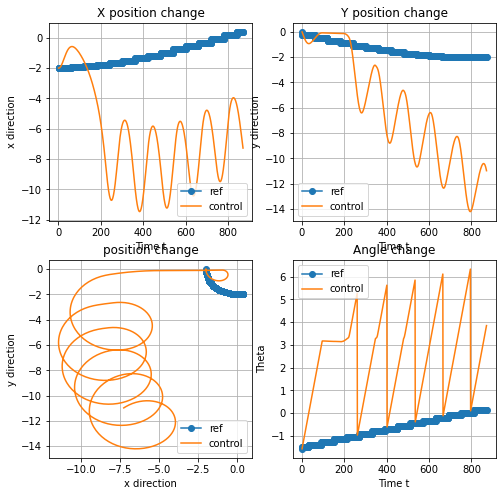

Point 31 ,Step 1 - MSE error in lifted space,state x, input u:
11.974743537173289 [ -7.38481509 -11.06892606   3.89755675] [1.40594728 0.50000004]
Point 31 ,Step 2 - MSE error in lifted space,state x, input u:
12.117330708156945 [ -7.48916595 -11.16730794   3.94755675] [1.43415821 0.50000004]
Point 31 ,Step 3 - MSE error in lifted space,state x, input u:
12.263345443532682 [ -7.59043089 -11.27282617   3.99755676] [1.46248707 0.50000005]
Point 31 ,Step 4 - MSE error in lifted space,state x, input u:
12.41251949668072 [ -7.68821497 -11.38548506   4.04755676] [1.49176918 0.50000004]
Point 31 ,Step 5 - MSE error in lifted space,state x, input u:
12.56237709255067 [ -7.78075404 -11.50353811   4.09755676] [1.5        0.50000004]
Point 31 ,Step 6 - MSE error in lifted space,state x, input u:
12.711732147270107 [ -7.86727726 -11.62606864   4.14755677] [1.5        0.50000004]
Point 31 ,Step 7 - MSE error in lifted space,state x, input u:
12.860235343318207 [ -7.94756837 -11.75277041   4.1975567

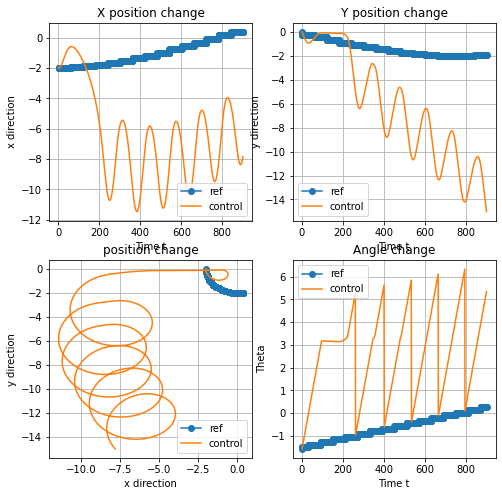

Point 32 ,Step 1 - MSE error in lifted space,state x, input u:
15.653306985707962 [ -7.74383011 -15.134847     5.397557  ] [1.5        0.50000016]
Point 32 ,Step 2 - MSE error in lifted space,state x, input u:
15.701432349513205 [ -7.64890964 -15.25099391   5.44755701] [1.5        0.50000016]
Point 32 ,Step 3 - MSE error in lifted space,state x, input u:
15.743709494982108 [ -7.54830287 -15.36225162   5.49755703] [1.5        0.50000016]
Point 32 ,Step 4 - MSE error in lifted space,state x, input u:
15.78008014111902 [ -7.44226127 -15.46834205   5.54755704] [1.5        0.50000016]
Point 32 ,Step 5 - MSE error in lifted space,state x, input u:
15.810494421808436 [ -7.33104987 -15.56900001   5.59755706] [1.5        0.50000017]
Point 32 ,Step 6 - MSE error in lifted space,state x, input u:
15.834910828642652 [ -7.21494666 -15.66397392   5.64755708] [1.5        0.50000019]
Point 32 ,Step 7 - MSE error in lifted space,state x, input u:
15.853296163622005 [ -7.09424183 -15.7530264    5.697557

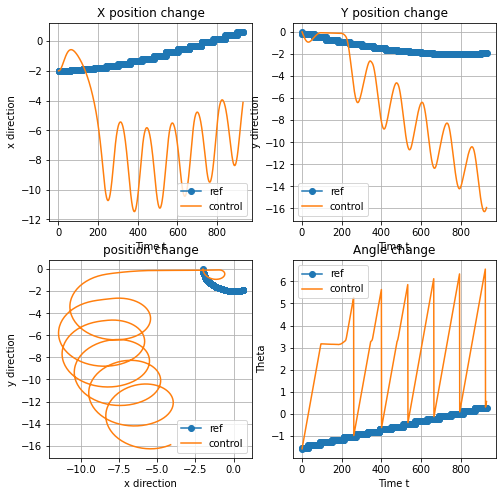

Point 33 ,Step 1 - MSE error in lifted space,state x, input u:
14.70651456844033 [ -4.02463694 -15.85658104   0.61437227] [1.20713226 0.5       ]
Point 33 ,Step 2 - MSE error in lifted space,state x, input u:
14.612119384575118 [ -3.92864136 -15.78886125   0.6643723 ] [1.17478172 0.50000036]
Point 33 ,Step 3 - MSE error in lifted space,state x, input u:
14.517232784095121 [ -3.83860482 -15.71835052   0.71437234] [1.1436058  0.50000035]
Point 33 ,Step 4 - MSE error in lifted space,state x, input u:
14.422082665889343 [ -3.75446865 -15.64539099   0.76437237] [1.11364213 0.50000035]
Point 33 ,Step 5 - MSE error in lifted space,state x, input u:
14.326883993328947 [ -3.67615854 -15.5703066    0.81437241] [1.08490269 0.50000034]
Point 33 ,Step 6 - MSE error in lifted space,state x, input u:
14.23183916531784 [ -3.60358704 -15.49340296   0.86437244] [1.05739268 0.50000034]
Point 33 ,Step 7 - MSE error in lifted space,state x, input u:
14.137138349770916 [ -3.5366557  -15.41496744   0.9143724

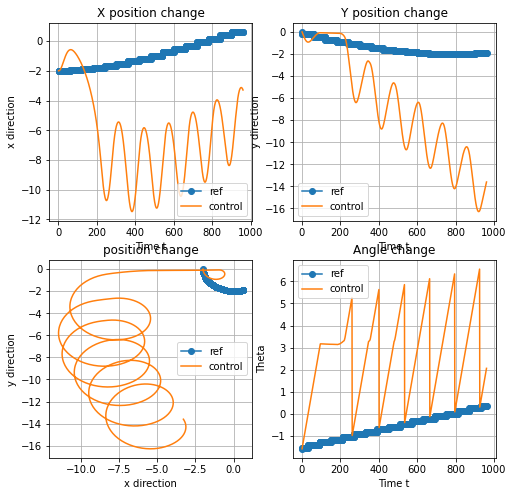

Point 34 ,Step 1 - MSE error in lifted space,state x, input u:
12.439008714515387 [ -3.32656412 -13.53767753   2.11437311] [0.76609548 0.50000024]
Point 34 ,Step 2 - MSE error in lifted space,state x, input u:
12.39047030561511 [ -3.36631714 -13.47189417   2.16437313] [0.76861914 0.50000024]
Point 34 ,Step 3 - MSE error in lifted space,state x, input u:
12.345100649331911 [ -3.40947576 -13.40793163   2.21437316] [0.77161345 0.50000023]
Point 34 ,Step 4 - MSE error in lifted space,state x, input u:
12.303050246178339 [ -3.4559886  -13.34592429   2.26437318] [0.77513569 0.50000022]
Point 34 ,Step 5 - MSE error in lifted space,state x, input u:
12.26446207172499 [ -3.5058106 -13.2859965   2.3143732] [0.77933125 0.50000022]
Point 34 ,Step 6 - MSE error in lifted space,state x, input u:
12.229479862566443 [ -3.55889609 -13.22827419   2.36437322] [0.78421521 0.50000021]
Point 34 ,Step 7 - MSE error in lifted space,state x, input u:
12.198248535713054 [ -3.61519764 -13.17288613   2.41437324] 

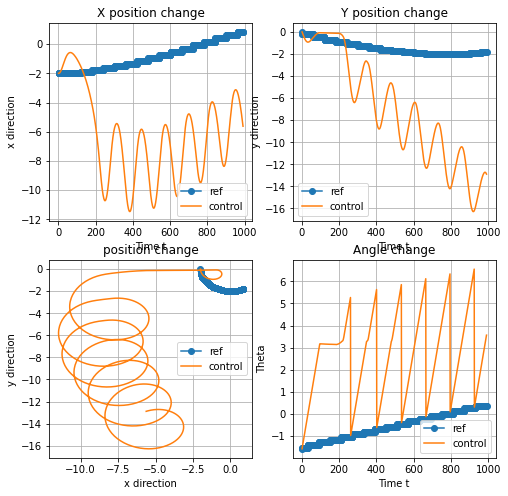

Point 35 ,Step 1 - MSE error in lifted space,state x, input u:
12.916616213356395 [ -5.73033306 -12.93855745   3.61437364] [1.16853254 0.50000009]
Point 35 ,Step 2 - MSE error in lifted space,state x, input u:
13.01773395112016 [ -5.83673258 -12.99297756   3.66437365] [1.19509019 0.50000011]
Point 35 ,Step 3 - MSE error in lifted space,state x, input u:
13.124535158679398 [ -5.94260941 -13.05399018   3.71437366] [1.22198376 0.5000001 ]
Point 35 ,Step 4 - MSE error in lifted space,state x, input u:
13.236850357111438 [ -6.04759107 -13.12169276   3.76437367] [1.24919126 0.5000001 ]
Point 35 ,Step 5 - MSE error in lifted space,state x, input u:
13.354474573820696 [ -6.1512831  -13.19615564   3.81437368] [1.27658756 0.5000001 ]
Point 35 ,Step 6 - MSE error in lifted space,state x, input u:
13.47717053525981 [ -6.25327403 -13.27742108   3.86437369] [1.30407905 0.5000001 ]
Point 35 ,Step 7 - MSE error in lifted space,state x, input u:
13.604669451295413 [ -6.35313772 -13.36550088   3.9143737

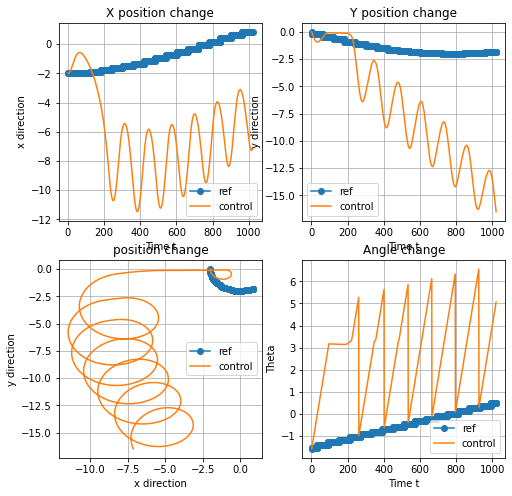

Point 36 ,Step 1 - MSE error in lifted space,state x, input u:
16.995296657602104 [ -7.07296126 -16.6364176    5.11437413] [1.50000003 0.50000048]
Point 36 ,Step 2 - MSE error in lifted space,state x, input u:
17.088945211391085 [ -7.01427435 -16.77446052   5.16437418] [1.50000004 0.50000057]
Point 36 ,Step 3 - MSE error in lifted space,state x, input u:
17.177466785857312 [ -6.94876152 -16.90939779   5.21437418] [1.5 0.5]
Point 36 ,Step 4 - MSE error in lifted space,state x, input u:
17.26072064814732 [ -6.8765865  -17.04089216   5.26437418] [1.5 0.5]
Point 36 ,Step 5 - MSE error in lifted space,state x, input u:
17.33857602265118 [ -6.7979297  -17.16861494   5.31437418] [1.5 0.5]
Point 36 ,Step 6 - MSE error in lifted space,state x, input u:
17.410911975790807 [ -6.71298773 -17.29224689   5.36437418] [1.5 0.5]
Point 36 ,Step 7 - MSE error in lifted space,state x, input u:
17.47761730086705 [ -6.62197289 -17.41147902   5.41437418] [1.5 0.5]
Point 36 ,Step 8 - MSE error in lifted space

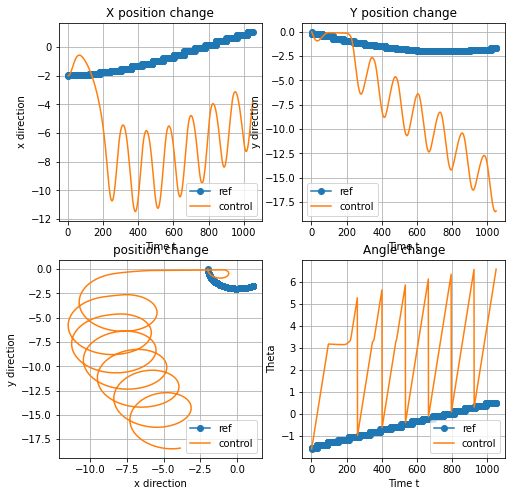

Point 37 ,Step 1 - MSE error in lifted space,state x, input u:
17.378108272271223 [ -3.76969747 -18.40310543   6.61437472] [1.04222971 0.5       ]
Point 37 ,Step 2 - MSE error in lifted space,state x, input u:
17.31991618639033 [ -3.67357097 -18.37005191   6.66437472] [1.01650577 0.5       ]
Point 37 ,Step 3 - MSE error in lifted space,state x, input u:
17.259534596891502 [ -3.58154387 -18.33316814   6.71437472] [0.99143328 0.5       ]
Point 37 ,Step 4 - MSE error in lifted space,state x, input u:
17.197202739070505 [ -3.49368804 -18.29274906   6.76437472] [0.96707536 0.5       ]
Point 37 ,Step 5 - MSE error in lifted space,state x, input u:
17.133151055481903 [ -3.41005472 -18.24908213   6.81437472] [0.94346878 0.5       ]
Point 37 ,Step 6 - MSE error in lifted space,state x, input u:
17.067600803690027 [ -3.33067638 -18.2024461    6.86437472] [0.92064323 0.5       ]
Point 37 ,Step 7 - MSE error in lifted space,state x, input u:
17.00076370405487 [ -3.25556853 -18.15311002   6.9143747

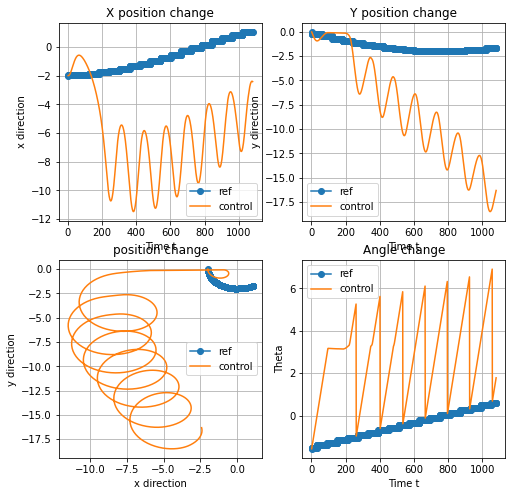

Point 38 ,Step 1 - MSE error in lifted space,state x, input u:
15.13317736970934 [ -2.43454599 -16.25137237   1.83118986] [0.77514046 0.50000014]
Point 38 ,Step 2 - MSE error in lifted space,state x, input u:
15.065811776689605 [ -2.45438323 -16.17692028   1.88118986] [0.77049523 0.5       ]
Point 38 ,Step 3 - MSE error in lifted space,state x, input u:
15.000838541075636 [ -2.47779658 -16.10392723   1.93118986] [0.76656182 0.5       ]
Point 38 ,Step 4 - MSE error in lifted space,state x, input u:
14.938468143579497 [ -2.50467161 -16.03261274   1.98118986] [0.76210389 0.5       ]
Point 38 ,Step 5 - MSE error in lifted space,state x, input u:
14.878798477084569 [ -2.53492942 -15.96307041   2.03118986] [0.75839773 0.5       ]
Point 38 ,Step 6 - MSE error in lifted space,state x, input u:
14.821919244812182 [ -2.56849839 -15.89538271   2.08118986] [0.75554619 0.5       ]
Point 38 ,Step 7 - MSE error in lifted space,state x, input u:
14.767921268730841 [ -2.60531083 -15.82963159   2.131189

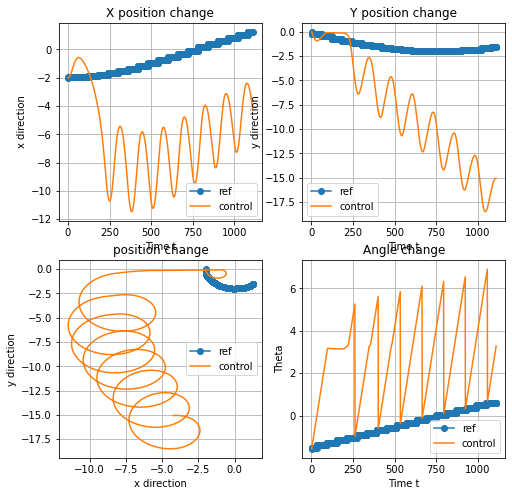

Point 39 ,Step 1 - MSE error in lifted space,state x, input u:
14.626225703524197 [ -4.33895013 -15.09180281   3.33119005] [1.00433639 0.50000015]
Point 39 ,Step 2 - MSE error in lifted space,state x, input u:
14.682769079900474 [ -4.43970441 -15.1111378    3.38119005] [1.02592722 0.50000005]
Point 39 ,Step 3 - MSE error in lifted space,state x, input u:
14.745321621156949 [ -4.54152261 -15.13601097   3.43119007] [1.04812319 0.50000023]
Point 39 ,Step 4 - MSE error in lifted space,state x, input u:
14.813913827298869 [ -4.64415427 -15.16659258   3.4811901 ] [1.07091048 0.5000003 ]
Point 39 ,Step 5 - MSE error in lifted space,state x, input u:
14.8885520460114 [ -4.74732912 -15.2030426    3.53119014] [1.09424186 0.50000039]
Point 39 ,Step 6 - MSE error in lifted space,state x, input u:
14.9691409785978 [ -4.85066026 -15.24546877   3.58119019] [1.11701859 0.50000051]
Point 39 ,Step 7 - MSE error in lifted space,state x, input u:
15.055645568032554 [ -4.95386635 -15.29400545   3.63119025]

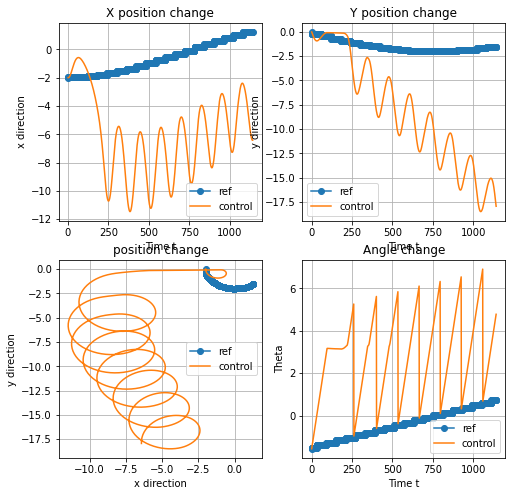

Point 40 ,Step 1 - MSE error in lifted space,state x, input u:
18.433707882719773 [ -6.41320723 -18.10352361   4.83119032] [1.5 0.5]
Point 40 ,Step 2 - MSE error in lifted space,state x, input u:
18.561176467865746 [ -6.39542892 -18.25246633   4.88119032] [1.5 0.5]
Point 40 ,Step 3 - MSE error in lifted space,state x, input u:
18.684909482425276 [ -6.37022879 -18.40033436   4.93119032] [1.5 0.5]
Point 40 ,Step 4 - MSE error in lifted space,state x, input u:
18.80467438603582 [ -6.33766984 -18.5467581    4.98119032] [1.5 0.5]
Point 40 ,Step 5 - MSE error in lifted space,state x, input u:
18.920249960394194 [ -6.29783344 -18.69137159   5.03119032] [1.5 0.5]
Point 40 ,Step 6 - MSE error in lifted space,state x, input u:
19.031426216511395 [ -6.25081916 -18.83381336   5.08119032] [1.5 0.5]
Point 40 ,Step 7 - MSE error in lifted space,state x, input u:
19.138004299213495 [ -6.19674451 -18.97372739   5.13119035] [1.50000003 0.50000034]
Point 40 ,Step 8 - MSE error in lifted space,state x, in

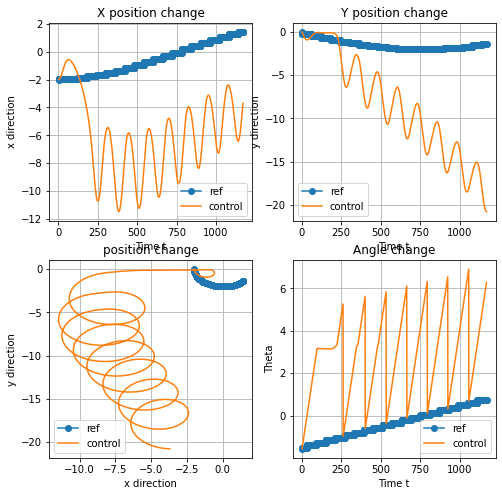

Point 41 ,Step 1 - MSE error in lifted space,state x, input u:
19.996744397704244 [ -3.58853096 -20.77505894   6.33119116] [1.15272017 0.5       ]
Point 41 ,Step 2 - MSE error in lifted space,state x, input u:
19.963684437949752 [ -3.47612764 -20.76965877   6.38119116] [1.1253297 0.5      ]
Point 41 ,Step 3 - MSE error in lifted space,state x, input u:
19.92676014346012 [ -3.36683104 -20.75891264   6.43119116] [1.09823611 0.5       ]
Point 41 ,Step 4 - MSE error in lifted space,state x, input u:
19.886238735197075 [ -3.260849   -20.74311113   6.48119114] [1.07153532 0.49999971]
Point 41 ,Step 5 - MSE error in lifted space,state x, input u:
19.842385108796222 [ -3.1583617  -20.72254861   6.53119112] [1.04529735 0.49999983]
Point 41 ,Step 6 - MSE error in lifted space,state x, input u:
19.795460421271688 [ -3.05952282 -20.69752075   6.58119111] [1.01958409 0.4999999 ]
Point 41 ,Step 7 - MSE error in lifted space,state x, input u:
19.74572107811263 [ -2.96446139 -20.66832239   6.6311911 ]

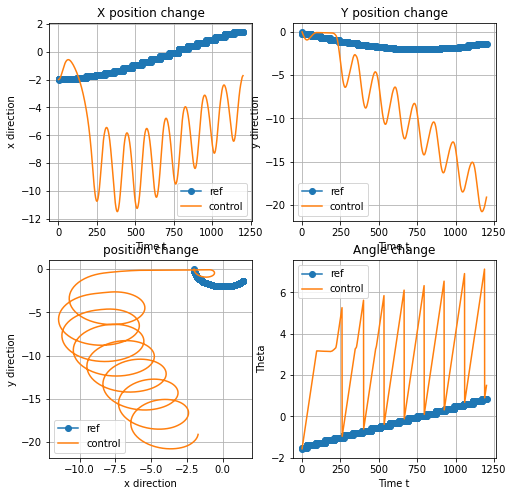

Point 42 ,Step 1 - MSE error in lifted space,state x, input u:
18.088324072080507 [ -1.717814   -19.02508134   1.54800582] [0.84410486 0.50000035]
Point 42 ,Step 2 - MSE error in lifted space,state x, input u:
18.00601910636254 [ -1.71591401 -18.94172786   1.59800586] [0.83375134 0.50000035]
Point 42 ,Step 3 - MSE error in lifted space,state x, input u:
17.925431137788383 [ -1.71815634 -18.85933827   1.64800589] [0.82420097 0.50000036]
Point 42 ,Step 4 - MSE error in lifted space,state x, input u:
17.846768684112938 [ -1.72443871 -18.77813229   1.69800593] [0.81448633 0.50000037]
Point 42 ,Step 5 - MSE error in lifted space,state x, input u:
17.77011978894871 [ -1.73466149 -18.69820451   1.74800597] [0.80578879 0.50000038]
Point 42 ,Step 6 - MSE error in lifted space,state x, input u:
17.695569104281887 [ -1.74873092 -18.61964305   1.79800601] [0.79811343 0.50000039]
Point 42 ,Step 7 - MSE error in lifted space,state x, input u:
17.62320486680695 [ -1.76655798 -18.54253707   1.84800605

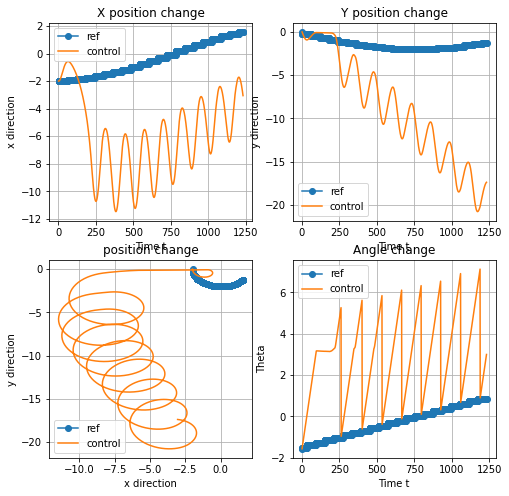

Point 43 ,Step 1 - MSE error in lifted space,state x, input u:
16.807089813726964 [ -3.1417869  -17.37111567   3.04800663] [0.88961456 0.5       ]
Point 43 ,Step 2 - MSE error in lifted space,state x, input u:
16.824507161362817 [ -3.23208018 -17.36264073   3.09800663] [0.90690142 0.5       ]
Point 43 ,Step 3 - MSE error in lifted space,state x, input u:
16.847261963801337 [ -3.32448719 -17.35861052   3.14800668] [0.92494856 0.50000048]
Point 43 ,Step 4 - MSE error in lifted space,state x, input u:
16.875503009888586 [ -3.41886108 -17.35921585   3.19800673] [0.94375826 0.50000054]
Point 43 ,Step 5 - MSE error in lifted space,state x, input u:
16.909369120050872 [ -3.51503896 -17.3646474    3.24800679] [0.96331136 0.50000059]
Point 43 ,Step 6 - MSE error in lifted space,state x, input u:
16.94898699962605 [ -3.61284085 -17.37509436   3.29800686] [0.9835826  0.50000064]
Point 43 ,Step 7 - MSE error in lifted space,state x, input u:
16.99446901575076 [ -3.71206869 -17.39074283   3.3480068

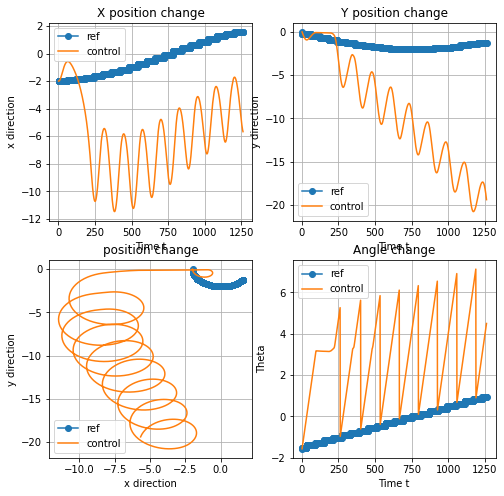

Point 44 ,Step 1 - MSE error in lifted space,state x, input u:
19.923937915860193 [ -5.70146077 -19.54103693   4.54800729] [1.5000001  0.50000052]
Point 44 ,Step 2 - MSE error in lifted space,state x, input u:
20.07046167727804 [ -5.72600713 -19.6890149    4.59800736] [1.5000001 0.5000006]
Point 44 ,Step 3 - MSE error in lifted space,state x, input u:
20.215267356862896 [ -5.74312699 -19.83803474   4.64800742] [1.5000001  0.50000063]
Point 44 ,Step 4 - MSE error in lifted space,state x, input u:
20.358033504739943 [ -5.75277755 -19.98772399   4.69800748] [1.50000011 0.50000064]
Point 44 ,Step 5 - MSE error in lifted space,state x, input u:
20.49844958272294 [ -5.7549347  -20.13770849   4.74800755] [1.50000011 0.50000066]
Point 44 ,Step 6 - MSE error in lifted space,state x, input u:
20.63621613418143 [ -5.74959305 -20.28761336   4.79800761] [1.50000011 0.50000067]
Point 44 ,Step 7 - MSE error in lifted space,state x, input u:
20.771044912638995 [ -5.73676594 -20.43706391   4.84800768] 

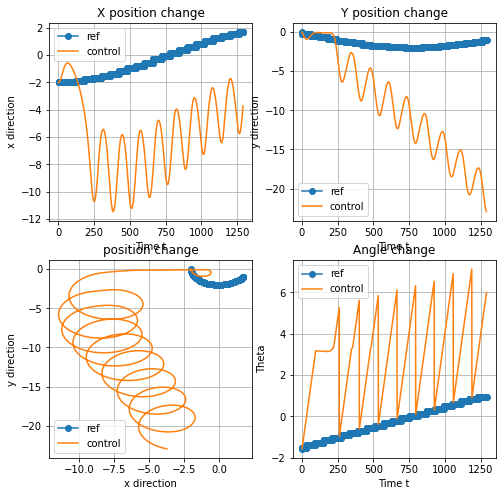

Point 45 ,Step 1 - MSE error in lifted space,state x, input u:
22.55972701797679 [ -3.60988253 -22.96964825   6.04800817] [1.29663858 0.49999986]
Point 45 ,Step 2 - MSE error in lifted space,state x, input u:
22.559746105810127 [ -3.4864424  -22.99922587   6.09800816] [1.26934244 0.49999993]
Point 45 ,Step 3 - MSE error in lifted space,state x, input u:
22.554248268781688 [ -3.36438248 -23.02209052   6.14800816] [1.24182992 0.49999996]
Point 45 ,Step 4 - MSE error in lifted space,state x, input u:
22.543473458446478 [ -3.24406749 -23.03845415   6.19800815] [1.21422676 0.49999997]
Point 45 ,Step 5 - MSE error in lifted space,state x, input u:
22.52767141571317 [ -3.12583444 -23.04854933   6.24800815] [1.18663246 0.49999998]
Point 45 ,Step 6 - MSE error in lifted space,state x, input u:
22.50709941639821 [ -3.0099922  -23.05262601   6.29800815] [1.15913948 0.49999998]
Point 45 ,Step 7 - MSE error in lifted space,state x, input u:
22.482020225019934 [ -2.89682168 -23.05094838   6.34800815

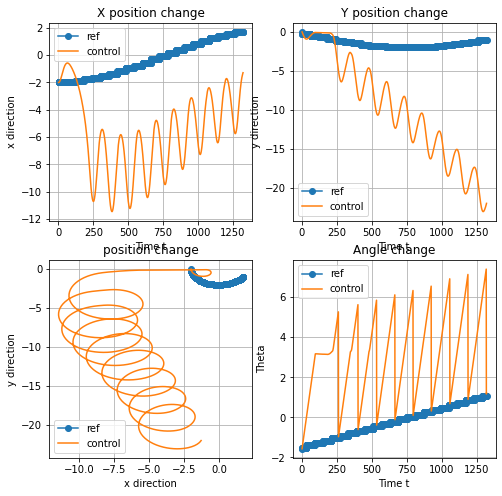

Point 46 ,Step 1 - MSE error in lifted space,state x, input u:
21.28655890438694 [ -1.25310952 -21.90142162   1.26482264] [0.98703261 0.5       ]
Point 46 ,Step 2 - MSE error in lifted space,state x, input u:
21.190798304881 [ -1.22388336 -21.80890265   1.31482264] [0.97025394 0.5       ]
Point 46 ,Step 3 - MSE error in lifted space,state x, input u:
21.09597604913088 [ -1.19972346 -21.71658887   1.36482264] [0.9542293 0.5      ]
Point 46 ,Step 4 - MSE error in lifted space,state x, input u:
21.00223382084639 [ -1.18051358 -21.62464772   1.41482264] [0.93926533 0.5       ]
Point 46 ,Step 5 - MSE error in lifted space,state x, input u:
20.90983134166205 [ -1.16615841 -21.53335944   1.46482264] [0.92410077 0.5       ]
Point 46 ,Step 6 - MSE error in lifted space,state x, input u:
20.81893216104674 [ -1.15653684 -21.44290752   1.51482264] [0.9096221 0.5      ]
Point 46 ,Step 7 - MSE error in lifted space,state x, input u:
20.72965497377616 [ -1.15152309 -21.35342784   1.56482264] [0.89620

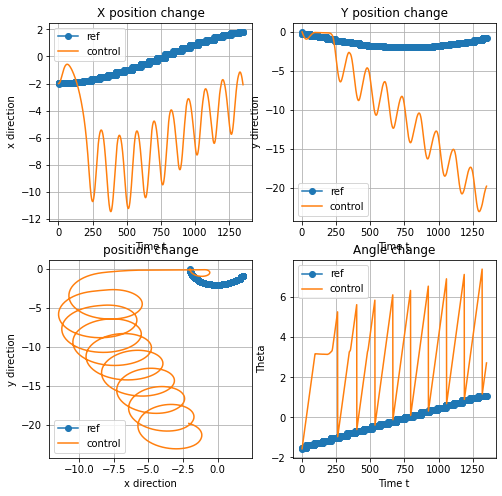

Point 47 ,Step 1 - MSE error in lifted space,state x, input u:
19.338787092267772 [ -2.16573232 -19.76170093   2.76482304] [0.86986052 0.50000049]
Point 47 ,Step 2 - MSE error in lifted space,state x, input u:
19.324144402753785 [ -2.24757851 -19.72931671   2.8148231 ] [0.88020086 0.50000051]
Point 47 ,Step 3 - MSE error in lifted space,state x, input u:
19.314129251196377 [ -2.33199781 -19.70070537   2.86482315] [0.89136003 0.50000053]
Point 47 ,Step 4 - MSE error in lifted space,state x, input u:
19.30889857704463 [ -2.41884363 -19.67603595   2.91482321] [0.90281652 0.50000056]
Point 47 ,Step 5 - MSE error in lifted space,state x, input u:
19.308599715294626 [ -2.50796871 -19.65547138   2.96482327] [0.91466835 0.5000006 ]
Point 47 ,Step 6 - MSE error in lifted space,state x, input u:
19.313372922447783 [ -2.59925018 -19.63916542   3.01482333] [0.92726428 0.50000063]
Point 47 ,Step 7 - MSE error in lifted space,state x, input u:
19.323354558853282 [ -2.69255748 -19.62727314   3.064823

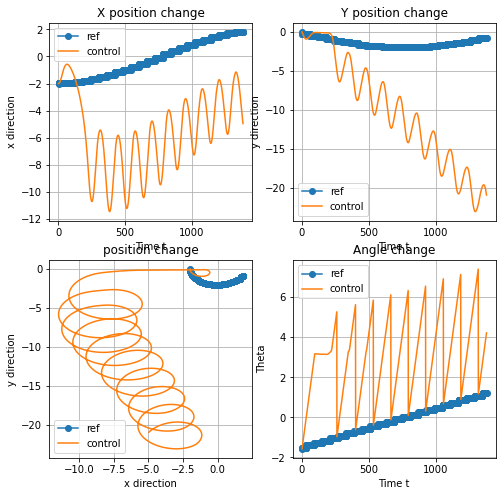

Point 48 ,Step 1 - MSE error in lifted space,state x, input u:
21.581472629732545 [ -5.03296344 -21.05488001   4.26482318] [1.4992225 0.5      ]
Point 48 ,Step 2 - MSE error in lifted space,state x, input u:
21.730393887903592 [ -5.0978793  -21.19010549   4.31482318] [1.5 0.5]
Point 48 ,Step 3 - MSE error in lifted space,state x, input u:
21.880033331663086 [ -5.15595557 -21.32840642   4.36482318] [1.5 0.5]
Point 48 ,Step 4 - MSE error in lifted space,state x, input u:
22.03000612528383 [ -5.2070471  -21.46943711   4.41482318] [1.5 0.5]
Point 48 ,Step 5 - MSE error in lifted space,state x, input u:
22.179934457316218 [ -5.25102617 -21.61284506   4.46482318] [1.5 0.5]
Point 48 ,Step 6 - MSE error in lifted space,state x, input u:
22.329448250962624 [ -5.28778288 -21.75827183   4.51482318] [1.5 0.5]
Point 48 ,Step 7 - MSE error in lifted space,state x, input u:
22.478185790090908 [ -5.31722534 -21.90535392   4.56482318] [1.5 0.5]
Point 48 ,Step 8 - MSE error in lifted space,state x, inpu

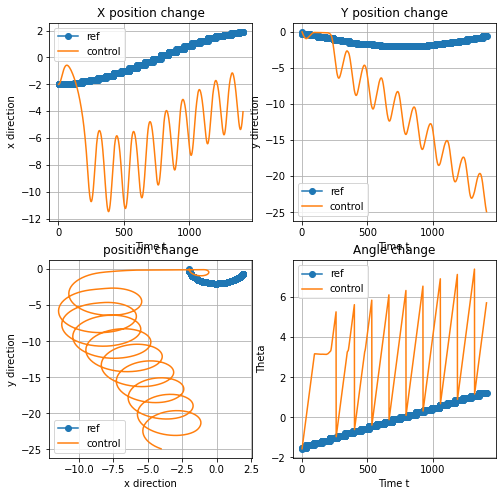

Point 49 ,Step 1 - MSE error in lifted space,state x, input u:
25.054492892943863 [ -3.91346856 -24.98823351   5.76482321] [1.49072746 0.50000001]
Point 49 ,Step 2 - MSE error in lifted space,state x, input u:
25.096010480259466 [ -3.78603338 -25.06092114   5.81482321] [1.46707936 0.50000001]
Point 49 ,Step 3 - MSE error in lifted space,state x, input u:
25.13062317165623 [ -3.65741816 -25.12598849   5.86482321] [1.44137549 0.5       ]
Point 49 ,Step 4 - MSE error in lifted space,state x, input u:
25.158461114545805 [ -3.52813733 -25.18346797   5.91482321] [1.41482946 0.5       ]
Point 49 ,Step 5 - MSE error in lifted space,state x, input u:
25.17968317460281 [ -3.39867691 -25.23343711   5.96482321] [1.38769286 0.5       ]
Point 49 ,Step 6 - MSE error in lifted space,state x, input u:
25.19447130611438 [ -3.26949861 -25.27601074   6.01482321] [1.3601304 0.5      ]
Point 49 ,Step 7 - MSE error in lifted space,state x, input u:
25.20302645535248 [ -3.14104815 -25.31133405   6.06482321] [

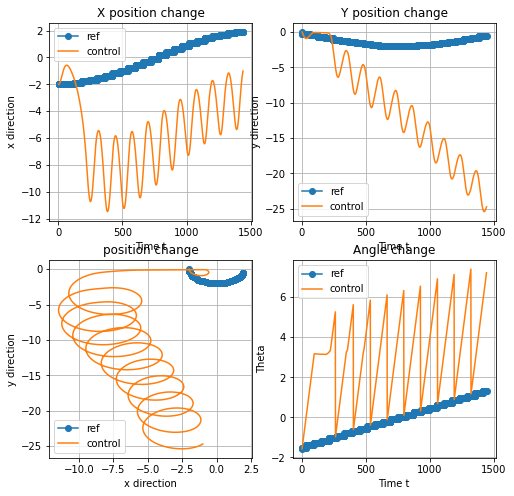

Point 50 ,Step 1 - MSE error in lifted space,state x, input u:
24.429300641487533 [ -0.96697446 -24.64331145   7.26482321] [0.76086272 0.5       ]
Point 50 ,Step 2 - MSE error in lifted space,state x, input u:
24.36276967875919 [ -0.92551635 -24.58127974   7.31482321] [0.74610374 0.5       ]
Point 50 ,Step 3 - MSE error in lifted space,state x, input u:
24.295954137285257 [ -0.8879305  -24.51845723   7.36482321] [0.73207673 0.5       ]
Point 50 ,Step 4 - MSE error in lifted space,state x, input u:
24.228986383937386 [ -0.8541513  -24.45499919   7.41482321] [0.71888509 0.5       ]
Point 50 ,Step 5 - MSE error in lifted space,state x, input u:
24.161990052883677 [ -0.8241111  -24.39105023   7.46482321] [0.70653258 0.5       ]
Point 50 ,Step 6 - MSE error in lifted space,state x, input u:
24.095081377312383 [ -0.79774161 -24.32674562   7.51482321] [0.69501316 0.5       ]
Point 50 ,Step 7 - MSE error in lifted space,state x, input u:
24.028369842871115 [ -0.77497475 -24.26221192   7.564823

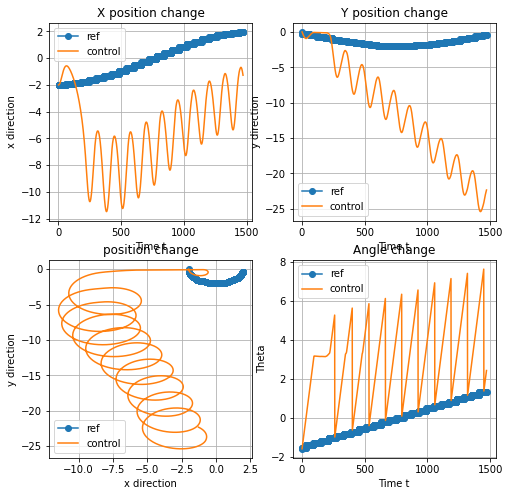

Point 51 ,Step 1 - MSE error in lifted space,state x, input u:
22.135460695966863 [ -1.34555041 -22.27719897   2.48163333] [0.90333399 0.49999787]
Point 51 ,Step 2 - MSE error in lifted space,state x, input u:
22.091215845657704 [ -1.41738326 -22.22145382   2.53163312] [0.90925679 0.49999796]
Point 51 ,Step 3 - MSE error in lifted space,state x, input u:
22.050993846427136 [ -1.49247493 -22.16897536   2.58163293] [0.91611941 0.49999804]
Point 51 ,Step 4 - MSE error in lifted space,state x, input u:
22.014951147664142 [ -1.5707572  -22.11990072   2.63163274] [0.92392826 0.49999812]
Point 51 ,Step 5 - MSE error in lifted space,state x, input u:
21.98324862220472 [ -1.6521581  -22.0743727    2.68163256] [0.93267936 0.4999982 ]
Point 51 ,Step 6 - MSE error in lifted space,state x, input u:
21.956061613892274 [ -1.73656823 -22.032556     2.73163239] [0.94200354 0.49999827]
Point 51 ,Step 7 - MSE error in lifted space,state x, input u:
21.933558220049374 [ -1.82388904 -21.99460778   2.781632

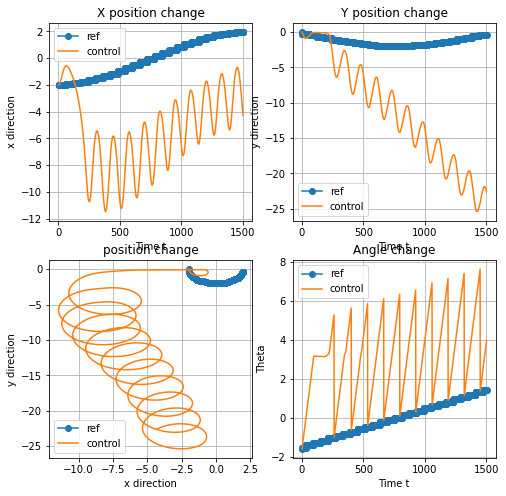

Point 52 ,Step 1 - MSE error in lifted space,state x, input u:
23.410530730876317 [ -4.39294757 -22.679395     3.98163137] [1.46097214 0.5       ]
Point 52 ,Step 2 - MSE error in lifted space,state x, input u:
23.54441208258793 [ -4.49233058 -22.79027854   4.03163137] [1.48903127 0.5       ]
Point 52 ,Step 3 - MSE error in lifted space,state x, input u:
23.68254657358885 [ -4.58673787 -22.90684297   4.08163129] [1.50000009 0.49999924]
Point 52 ,Step 4 - MSE error in lifted space,state x, input u:
23.82354959505165 [ -4.6752014  -23.02798011   4.13163122] [1.50000011 0.49999922]
Point 52 ,Step 5 - MSE error in lifted space,state x, input u:
23.967021235412616 [ -4.75750005 -23.15338719   4.18163114] [1.50000013 0.49999921]
Point 52 ,Step 6 - MSE error in lifted space,state x, input u:
24.112562045882907 [ -4.83342811 -23.28275075   4.23163114] [1.5 0.5]
Point 52 ,Step 7 - MSE error in lifted space,state x, input u:
24.25977432734876 [ -4.9027958  -23.41574745   4.28163114] [1.5 0.5]
Poi

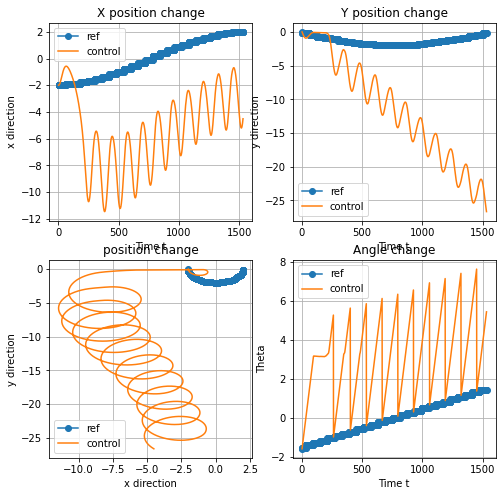

Point 53 ,Step 1 - MSE error in lifted space,state x, input u:
27.372862342813328 [ -4.41576631 -26.76876909   5.48163116] [1.5 0.5]
Point 53 ,Step 2 - MSE error in lifted space,state x, input u:
27.453492381309562 [ -4.31142767 -26.87653478   5.53163117] [1.49999991 0.50000013]
Point 53 ,Step 3 - MSE error in lifted space,state x, input u:
27.528308134819103 [ -4.20183338 -26.97895104   5.58163118] [1.49999995 0.50000007]
Point 53 ,Step 4 - MSE error in lifted space,state x, input u:
27.597170610304047 [ -4.08725737 -27.07576188   5.63163118] [1.49999997 0.50000004]
Point 53 ,Step 5 - MSE error in lifted space,state x, input u:
27.659952756300633 [ -3.96798603 -27.16672531   5.68163119] [1.49999998 0.50000003]
Point 53 ,Step 6 - MSE error in lifted space,state x, input u:
27.716539466874664 [ -3.84431746 -27.25161398   5.73163119] [1.49999999 0.50000003]
Point 53 ,Step 7 - MSE error in lifted space,state x, input u:
27.766827583051523 [ -3.71656079 -27.33021571   5.78163119] [1.5 0.5]

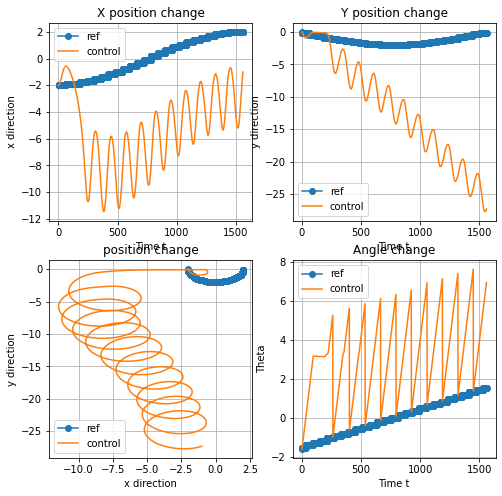

Point 54 ,Step 1 - MSE error in lifted space,state x, input u:
27.51415787989094 [ -0.9398132  -27.27829754   6.98163119] [0.92573654 0.5       ]
Point 54 ,Step 2 - MSE error in lifted space,state x, input u:
27.448987064452623 [ -0.87052619 -27.22012173   7.0316312 ] [0.90471624 0.5000001 ]
Point 54 ,Step 3 - MSE error in lifted space,state x, input u:
27.3824133172925 [ -0.80571394 -27.15993074   7.08163121] [0.88451024 0.50000008]
Point 54 ,Step 4 - MSE error in lifted space,state x, input u:
27.314636811752102 [ -0.7453382  -27.09795855   7.13163122] [0.86520412 0.50000007]
Point 54 ,Step 5 - MSE error in lifted space,state x, input u:
27.245846582786776 [ -0.68935136 -27.03442629   7.18163122] [0.84681018 0.50000007]
Point 54 ,Step 6 - MSE error in lifted space,state x, input u:
27.176151509165372 [ -0.63764667 -26.96947775   7.23163123] [0.83016181 0.50000007]
Point 54 ,Step 7 - MSE error in lifted space,state x, input u:
27.10572360444742 [ -0.59017507 -26.90331186   7.28163124]

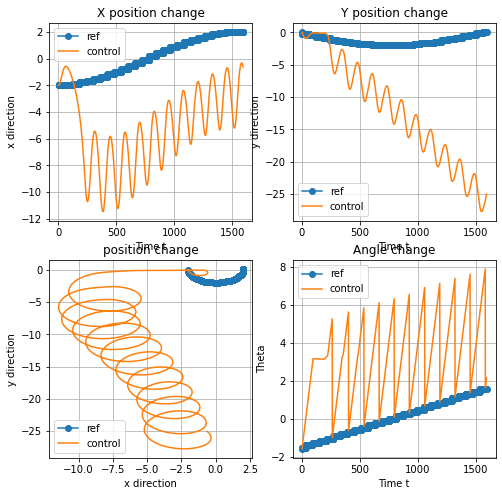

Point 55 ,Step 1 - MSE error in lifted space,state x, input u:
25.162732301117295 [ -0.67918316 -24.94133917   2.19844146] [0.98530443 0.49999608]
Point 55 ,Step 2 - MSE error in lifted space,state x, input u:
25.089603955657623 [ -0.73710243 -24.86150714   2.24844107] [0.98629578 0.49999614]
Point 55 ,Step 3 - MSE error in lifted space,state x, input u:
25.019918193632208 [ -0.79906921 -24.78450809   2.29844069] [0.98836915 0.49999622]
Point 55 ,Step 4 - MSE error in lifted space,state x, input u:
24.953823616532166 [ -0.86501707 -24.71046629   2.34844032] [0.99152954 0.4999963 ]
Point 55 ,Step 5 - MSE error in lifted space,state x, input u:
24.89147443484097 [ -0.93488072 -24.63951069   2.39843996] [0.99577236 0.4999964 ]
Point 55 ,Step 6 - MSE error in lifted space,state x, input u:
24.833030786385095 [ -1.00859508 -24.57177549   2.44843961] [1.00109272 0.4999965 ]
Point 55 ,Step 7 - MSE error in lifted space,state x, input u:
24.778658891797242 [ -1.08609446 -24.50740057   2.498439

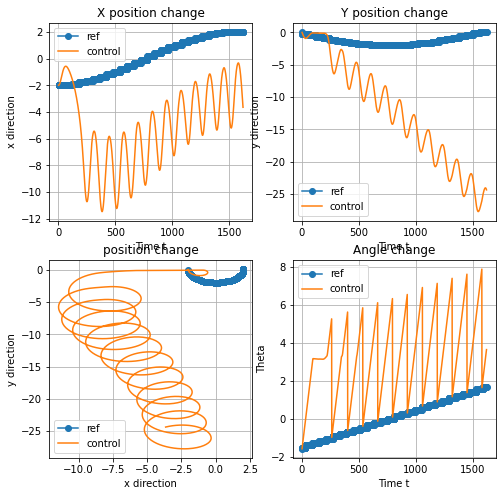

Point 56 ,Step 1 - MSE error in lifted space,state x, input u:
25.400708746141834 [ -3.77795819 -24.42768771   3.69843691] [1.4417523 0.5      ]
Point 56 ,Step 2 - MSE error in lifted space,state x, input u:
25.504805985069407 [ -3.90268804 -24.50533978   3.74843691] [1.46926444 0.5       ]
Point 56 ,Step 3 - MSE error in lifted space,state x, input u:
25.616638654241427 [ -4.02590581 -24.59088148   3.79843691] [1.5 0.5]
Point 56 ,Step 4 - MSE error in lifted space,state x, input u:
25.733683502458266 [ -4.14469428 -24.6824746    3.84843691] [1.5 0.5]
Point 56 ,Step 5 - MSE error in lifted space,state x, input u:
25.855579242573835 [ -4.25875655 -24.7798902    3.89843681] [1.50000006 0.49999898]
Point 56 ,Step 6 - MSE error in lifted space,state x, input u:
25.981955111392015 [ -4.36780753 -24.88288479   3.94843671] [1.50000007 0.49999897]
Point 56 ,Step 7 - MSE error in lifted space,state x, input u:
26.11243253473653 [ -4.47157466 -24.99120093   3.9984366 ] [1.50000008 0.49999896]
Po

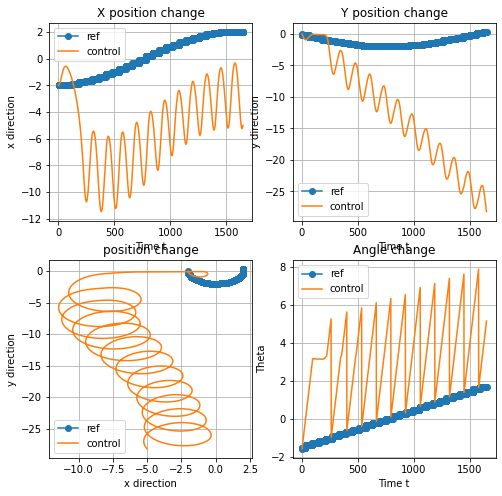

Point 57 ,Step 1 - MSE error in lifted space,state x, input u:
29.48233744948588 [ -4.940862   -28.34675186   5.19843616] [1.5 0.5]
Point 57 ,Step 2 - MSE error in lifted space,state x, input u:
29.594992991976625 [ -4.87079182 -28.4793798    5.24843616] [1.5 0.5]
Point 57 ,Step 3 - MSE error in lifted space,state x, input u:
29.702916153822937 [ -4.79418058 -28.60833994   5.29843616] [1.5 0.5]
Point 57 ,Step 4 - MSE error in lifted space,state x, input u:
29.805890004898576 [ -4.71121976 -28.73330994   5.34843619] [1.49999992 0.50000027]
Point 57 ,Step 5 - MSE error in lifted space,state x, input u:
29.90370958361324 [ -4.62211672 -28.85397745   5.39843621] [1.49999995 0.50000018]
Point 57 ,Step 6 - MSE error in lifted space,state x, input u:
29.996181970295975 [ -4.52709418 -28.97004086   5.44843622] [1.49999997 0.50000012]
Point 57 ,Step 7 - MSE error in lifted space,state x, input u:
30.08312636602501 [ -4.42638963 -29.08121007   5.49843623] [1.49999998 0.50000008]
Point 57 ,Step 8

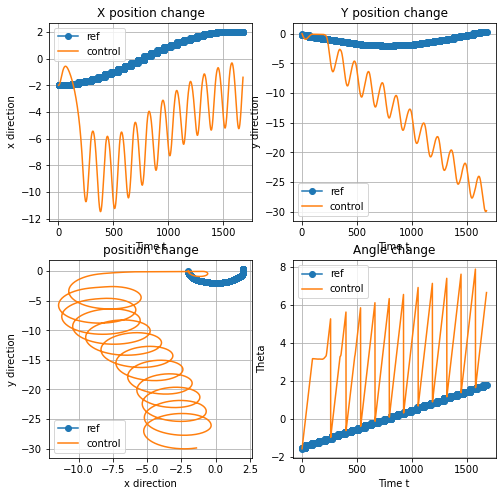

Point 58 ,Step 1 - MSE error in lifted space,state x, input u:
30.537876556518658 [ -1.29375225 -29.82489997   6.69843625] [1.18039066 0.5       ]
Point 58 ,Step 2 - MSE error in lifted space,state x, input u:
30.480623489040806 [ -1.18817292 -29.77835127   6.74843625] [1.15385339 0.5       ]
Point 58 ,Step 3 - MSE error in lifted space,state x, input u:
30.4201375293552 [ -1.08736953 -29.72774738   6.79843625] [1.12792186 0.5       ]
Point 58 ,Step 4 - MSE error in lifted space,state x, input u:
30.356699075512505 [ -0.99141332 -29.67340998   6.84843625] [1.10273058 0.5       ]
Point 58 ,Step 5 - MSE error in lifted space,state x, input u:
30.290577804683547 [ -0.9003511  -29.61565024   6.89843625] [1.07835587 0.5       ]
Point 58 ,Step 6 - MSE error in lifted space,state x, input u:
30.22203915483223 [ -0.81421728 -29.55477399   6.94843625] [1.05474894 0.5       ]
Point 58 ,Step 7 - MSE error in lifted space,state x, input u:
30.151339789119728 [ -0.73302889 -29.49107737   6.99843625

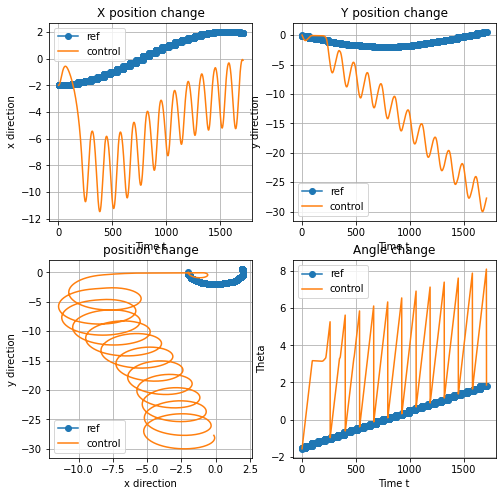

Point 59 ,Step 1 - MSE error in lifted space,state x, input u:
28.237547661187577 [ -0.16441574 -27.61726494   1.91525012] [1.09954651 0.49999589]
Point 59 ,Step 2 - MSE error in lifted space,state x, input u:
28.137374290419704 [ -0.2014508  -27.51403304   1.96524971] [1.09674161 0.49999589]
Point 59 ,Step 3 - MSE error in lifted space,state x, input u:
28.03999067790138 [ -0.24344814 -27.41314346   2.0152493 ] [1.09281667 0.49999589]
Point 59 ,Step 4 - MSE error in lifted space,state x, input u:
27.94555849114775 [ -0.29031108 -27.31473983   2.06524889] [1.08992708 0.49999588]
Point 59 ,Step 5 - MSE error in lifted space,state x, input u:
27.854225084042383 [ -0.34195414 -27.21894865   2.11524847] [1.08825344 0.49999587]
Point 59 ,Step 6 - MSE error in lifted space,state x, input u:
27.766140324987354 [ -0.39829685 -27.12589674   2.16524806] [1.08780324 0.49999585]
Point 59 ,Step 7 - MSE error in lifted space,state x, input u:
27.681458675686486 [ -0.4592627  -27.03571357   2.2152476

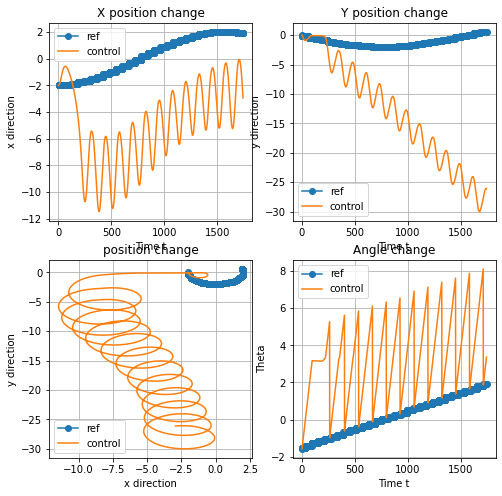

Point 60 ,Step 1 - MSE error in lifted space,state x, input u:
27.379569285151078 [ -3.08166152 -26.16680028   3.41524052] [1.44828333 0.49999837]
Point 60 ,Step 2 - MSE error in lifted space,state x, input u:
27.444711155656076 [ -3.22376946 -26.20668847   3.46524036] [1.4759991  0.49999844]
Point 60 ,Step 3 - MSE error in lifted space,state x, input u:
27.518184715454428 [ -3.36598171 -26.25439252   3.51524021] [1.50000005 0.49999849]
Point 60 ,Step 4 - MSE error in lifted space,state x, input u:
27.59869501149762 [ -3.50563204 -26.30914458   3.56524007] [1.50000005 0.49999854]
Point 60 ,Step 5 - MSE error in lifted space,state x, input u:
27.685980351996722 [ -3.64237138 -26.37080781   3.61523992] [1.50000005 0.49999857]
Point 60 ,Step 6 - MSE error in lifted space,state x, input u:
27.779759788962405 [ -3.77585797 -26.43922807   3.66523979] [1.50000005 0.4999986 ]
Point 60 ,Step 7 - MSE error in lifted space,state x, input u:
27.87973462791871 [ -3.90575816 -26.51423435   3.7152396

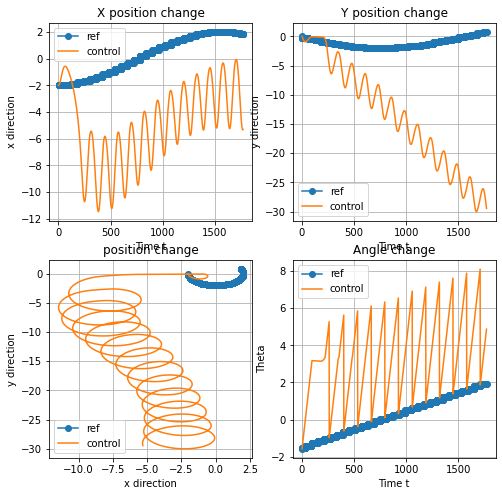

Point 61 ,Step 1 - MSE error in lifted space,state x, input u:
31.198769158315084 [ -5.29398544 -29.60499175   4.91523811] [1.5 0.5]
Point 61 ,Step 2 - MSE error in lifted space,state x, input u:
31.334938343356296 [ -5.26376631 -29.75191624   4.96523813] [1.5        0.50000022]
Point 61 ,Step 3 - MSE error in lifted space,state x, input u:
31.46793972729798 [ -5.22624178 -29.89714678   5.01523813] [1.5 0.5]
Point 61 ,Step 4 - MSE error in lifted space,state x, input u:
31.597482943245556 [ -5.18150564 -30.04032037   5.06523813] [1.5 0.5]
Point 61 ,Step 5 - MSE error in lifted space,state x, input u:
31.723288511690914 [ -5.12966972 -30.18107916   5.11523813] [1.5 0.5]
Point 61 ,Step 6 - MSE error in lifted space,state x, input u:
31.845088106445587 [ -5.07086357 -30.31907132   5.16523813] [1.5 0.5]
Point 61 ,Step 7 - MSE error in lifted space,state x, input u:
31.962624789097163 [ -5.00523418 -30.45395195   5.21523813] [1.5 0.5]
Point 61 ,Step 8 - MSE error in lifted space,state x, in

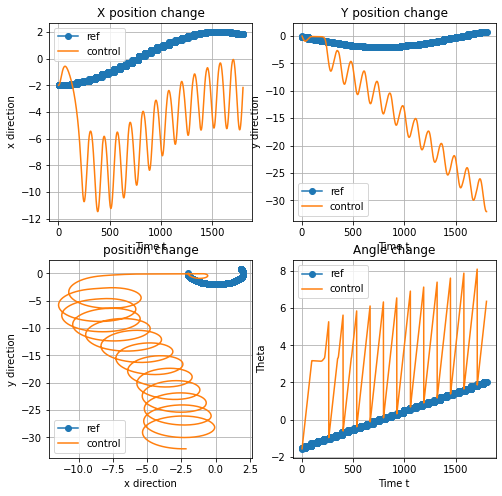

Point 62 ,Step 1 - MSE error in lifted space,state x, input u:
33.24860508730257 [ -2.0210519  -32.05738561   6.41523826] [1.49365414 0.5       ]
Point 62 ,Step 2 - MSE error in lifted space,state x, input u:
33.21332930061512 [ -1.87597307 -32.03811538   6.46523826] [1.46353029 0.5       ]
Point 62 ,Step 3 - MSE error in lifted space,state x, input u:
33.17249826406184 [ -1.73517749 -32.01219615   6.51523826] [1.43161453 0.5       ]
Point 62 ,Step 4 - MSE error in lifted space,state x, input u:
33.12645135788106 [ -1.5989374  -31.98000127   6.56523826] [1.399924 0.5     ]
Point 62 ,Step 5 - MSE error in lifted space,state x, input u:
33.075524064660854 [ -1.46747463 -31.9419062    6.61523826] [1.36871086 0.5       ]
Point 62 ,Step 6 - MSE error in lifted space,state x, input u:
33.020049605829726 [ -1.34097755 -31.89828744   6.66523826] [1.33806234 0.5       ]
Point 62 ,Step 7 - MSE error in lifted space,state x, input u:
32.96035756499459 [ -1.21960391 -31.8495201    6.71523826] [1.3

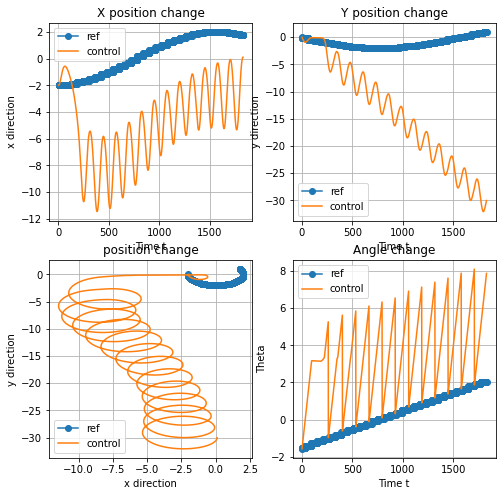

Point 63 ,Step 1 - MSE error in lifted space,state x, input u:
30.965927916196538 [  0.10364138 -29.9451549    7.91523826] [0.86017719 0.5       ]
Point 63 ,Step 2 - MSE error in lifted space,state x, input u:
30.881119921071424 [  0.09841539 -29.85994859   7.96523826] [0.85366426 0.5       ]
Point 63 ,Step 3 - MSE error in lifted space,state x, input u:
30.79746318937894 [  0.0889996  -29.77566678   8.01523826] [0.84806133 0.5       ]
Point 63 ,Step 4 - MSE error in lifted space,state x, input u:
30.715073717166604 [  0.0754585  -29.6924235    8.06523826] [0.84337451 0.5       ]
Point 63 ,Step 5 - MSE error in lifted space,state x, input u:
30.634066611539815 [  0.05785304 -29.61033014   8.11523826] [0.83959933 0.5       ]
Point 63 ,Step 6 - MSE error in lifted space,state x, input u:
30.55455691781089 [  0.03624072 -29.5294964    8.16523826] [0.83673091 0.5       ]
Point 63 ,Step 7 - MSE error in lifted space,state x, input u:
30.47666034017391 [ 1.06756225e-02 -2.94500310e+01  8.215

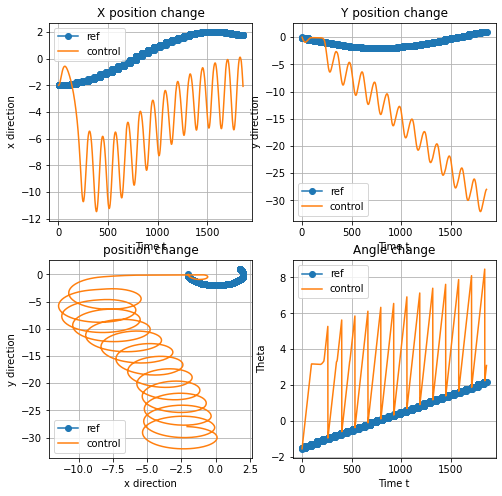

Point 64 ,Step 1 - MSE error in lifted space,state x, input u:
29.404835681276516 [ -2.22448759 -27.97712044   3.13204517] [1.42677351 0.49999676]
Point 64 ,Step 2 - MSE error in lifted space,state x, input u:
29.422781377456296 [ -2.369631   -27.97573464   3.18204487] [1.45150027 0.49999698]
Point 64 ,Step 3 - MSE error in lifted space,state x, input u:
29.44906587670883 [ -2.51724386 -27.98170917   3.23204459] [1.47733718 0.49999719]
Point 64 ,Step 4 - MSE error in lifted space,state x, input u:
29.48381953398738 [ -2.66663068 -27.99525847   3.28204433] [1.50000011 0.49999736]
Point 64 ,Step 5 - MSE error in lifted space,state x, input u:
29.526529541773787 [ -2.81515362 -28.01625702   3.33204408] [1.5000001  0.49999752]
Point 64 ,Step 6 - MSE error in lifted space,state x, input u:
29.577054942899593 [ -2.96244146 -28.04465235   3.38204384] [1.5000001  0.49999766]
Point 64 ,Step 7 - MSE error in lifted space,state x, input u:
29.63522983570588 [ -3.10812606 -28.08037348   3.43204362

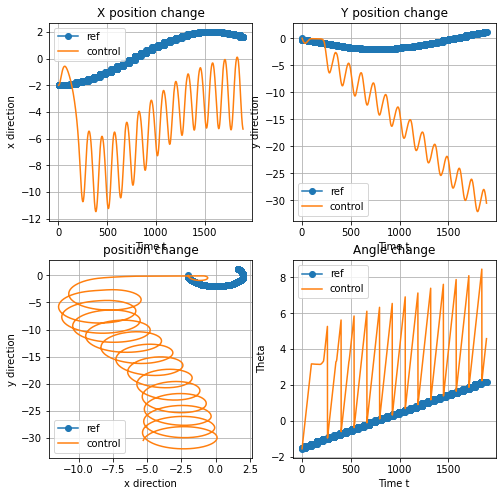

Point 65 ,Step 1 - MSE error in lifted space,state x, input u:
32.57966761822469 [ -5.3046965  -30.66010987   4.63204045] [1.5 0.5]
Point 65 ,Step 2 - MSE error in lifted space,state x, input u:
32.72833365066786 [ -5.31673582 -30.80962594   4.68204045] [1.5 0.5]
Point 65 ,Step 3 - MSE error in lifted space,state x, input u:
32.87583599287655 [ -5.3212874  -30.95955686   4.73204045] [1.5 0.5]
Point 65 ,Step 4 - MSE error in lifted space,state x, input u:
33.02182401496093 [ -5.31833986 -31.1095279    4.78204045] [1.5 0.5]
Point 65 ,Step 5 - MSE error in lifted space,state x, input u:
33.16595521043413 [ -5.30790059 -31.2591642    4.83204045] [1.5 0.5]
Point 65 ,Step 6 - MSE error in lifted space,state x, input u:
33.30789574749097 [ -5.28999566 -31.40809174   4.88204045] [1.5 0.5]
Point 65 ,Step 7 - MSE error in lifted space,state x, input u:
33.44732097147989 [ -5.26466984 -31.55593829   4.93204045] [1.5 0.5]
Point 65 ,Step 8 - MSE error in lifted space,state x, input u:
33.5839158615

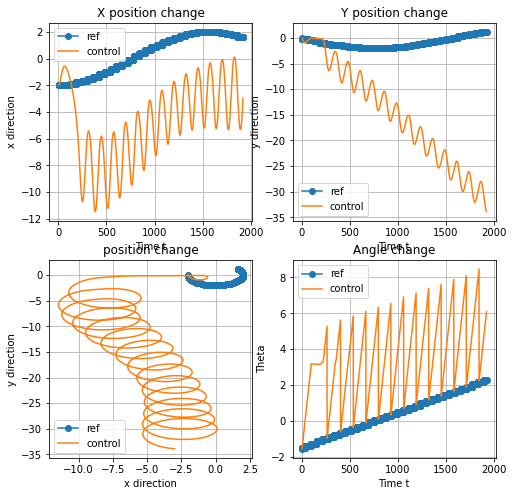

Point 66 ,Step 1 - MSE error in lifted space,state x, input u:
35.54999006579364 [ -2.8467786  -33.92949123   6.13204055] [1.5 0.5]
Point 66 ,Step 2 - MSE error in lifted space,state x, input u:
35.554723719507294 [ -2.69848869 -33.95207672   6.18204055] [1.5 0.5]
Point 66 ,Step 3 - MSE error in lifted space,state x, input u:
35.552590884611604 [ -2.54925531 -33.96722258   6.23204055] [1.5 0.5]
Point 66 ,Step 4 - MSE error in lifted space,state x, input u:
35.54359565749738 [ -2.39945145 -33.97489095   6.28204055] [1.5 0.5]
Point 66 ,Step 5 - MSE error in lifted space,state x, input u:
35.52775532198156 [ -2.24945155 -33.97506266   6.33204055] [1.5 0.5]
Point 66 ,Step 6 - MSE error in lifted space,state x, input u:
35.505100343079484 [ -2.09963052 -33.96773729   6.38204055] [1.5 0.5]
Point 66 ,Step 7 - MSE error in lifted space,state x, input u:
35.475674355899976 [ -1.95036286 -33.95293314   6.43204055] [1.5 0.5]
Point 66 ,Step 8 - MSE error in lifted space,state x, input u:
35.439534

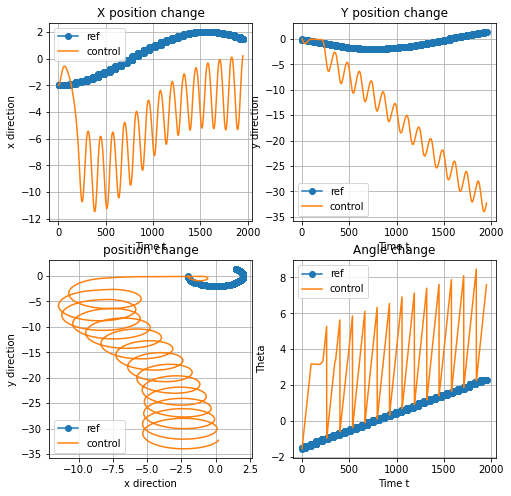

Point 67 ,Step 1 - MSE error in lifted space,state x, input u:
33.58479428053882 [  0.23367556 -32.20447916   7.63204055] [0.99214831 0.5       ]
Point 67 ,Step 2 - MSE error in lifted space,state x, input u:
33.488505236930614 [  0.25524073 -32.10891361   7.68204055] [0.97968515 0.5       ]
Point 67 ,Step 3 - MSE error in lifted space,state x, input u:
33.3925691276616 [  0.27180768 -32.01351256   7.73204055] [0.96828834 0.5       ]
Point 67 ,Step 4 - MSE error in lifted space,state x, input u:
33.29712870583986 [  0.28346025 -31.91842768   7.78204055] [0.95796234 0.5       ]
Point 67 ,Step 5 - MSE error in lifted space,state x, input u:
33.202321479742004 [  0.29027941 -31.82380303   7.83204055] [0.94870038 0.5       ]
Point 67 ,Step 6 - MSE error in lifted space,state x, input u:
33.10828066515585 [  0.29234279 -31.72977619   7.88204055] [0.94049482 0.5       ]
Point 67 ,Step 7 - MSE error in lifted space,state x, input u:
33.01513605616705 [  0.28972429 -31.63647911   7.93204055] [

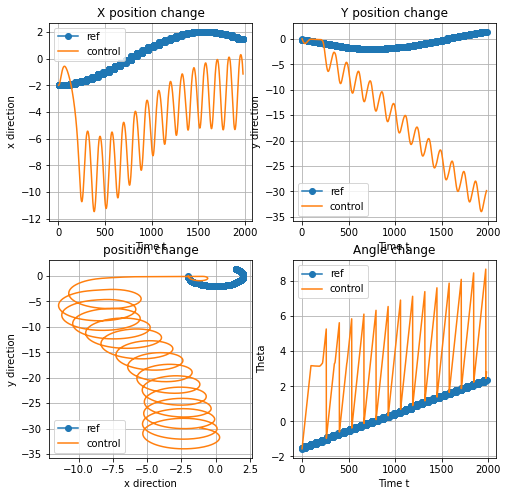

Point 68 ,Step 1 - MSE error in lifted space,state x, input u:
31.432444966091413 [ -1.28603729 -29.80516317   2.84885153] [1.3923331  0.49999497]
Point 68 ,Step 2 - MSE error in lifted space,state x, input u:
31.403250118957974 [ -1.42126399 -29.76440578   2.89885105] [1.41235355 0.49999517]
Point 68 ,Step 3 - MSE error in lifted space,state x, input u:
31.38129993470937 [ -1.560385   -29.72995601   2.94885058] [1.43322856 0.49999536]
Point 68 ,Step 4 - MSE error in lifted space,state x, input u:
31.36688739500336 [ -1.7032256  -29.70207855   2.99885013] [1.45535521 0.49999553]
Point 68 ,Step 5 - MSE error in lifted space,state x, input u:
31.36030455259293 [ -1.84959686 -29.68104208   3.0488497 ] [1.47875218 0.4999957 ]
Point 68 ,Step 6 - MSE error in lifted space,state x, input u:
31.36183681900649 [ -1.99895225 -29.66715057   3.09884929] [1.50000018 0.49999584]
Point 68 ,Step 7 - MSE error in lifted space,state x, input u:
31.371578822645205 [ -2.14881526 -29.66074102   3.14884889]

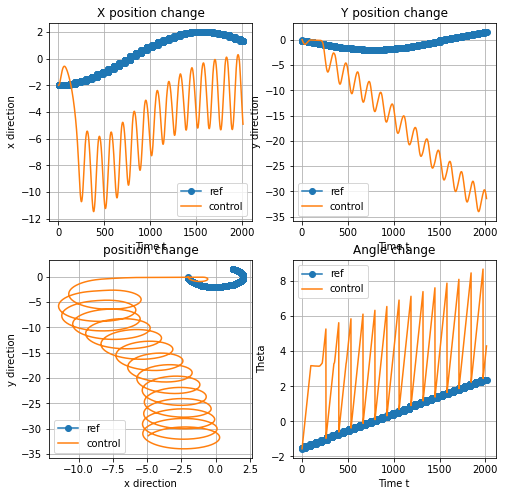

Point 69 ,Step 1 - MSE error in lifted space,state x, input u:
33.63576066851829 [ -4.978736   -31.52394153   4.34884319] [1.5 0.5]
Point 69 ,Step 2 - MSE error in lifted space,state x, input u:
33.783458652562054 [ -5.03207458 -31.6641378    4.39884319] [1.5 0.5]
Point 69 ,Step 3 - MSE error in lifted space,state x, input u:
33.932292847082365 [ -5.0783396  -31.80682469   4.44884319] [1.5 0.5]
Point 69 ,Step 4 - MSE error in lifted space,state x, input u:
34.08187880593608 [ -5.11741543 -31.95164554   4.49884319] [1.5 0.5]
Point 69 ,Step 5 - MSE error in lifted space,state x, input u:
34.23183524385072 [ -5.1492044  -32.09823838   4.54884319] [1.5 0.5]
Point 69 ,Step 6 - MSE error in lifted space,state x, input u:
34.38178495440439 [ -5.17362706 -32.24623681   4.59884319] [1.5 0.5]
Point 69 ,Step 7 - MSE error in lifted space,state x, input u:
34.5313556682287 [ -5.19062235 -32.3952709    4.64884319] [1.5 0.5]
Point 69 ,Step 8 - MSE error in lifted space,state x, input u:
34.680180852

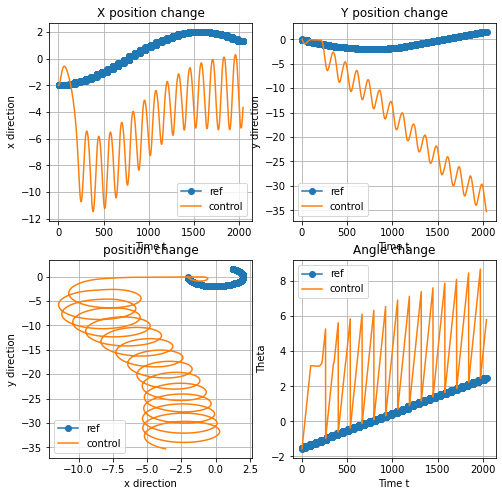

Point 70 ,Step 1 - MSE error in lifted space,state x, input u:
37.302972527841064 [ -3.53227797 -35.34990212   5.84884322] [1.5 0.5]
Point 70 ,Step 2 - MSE error in lifted space,state x, input u:
37.348938849789505 [ -3.39620591 -35.41302417   5.89884322] [1.5 0.5]
Point 70 ,Step 3 - MSE error in lifted space,state x, input u:
37.38826902762726 [ -3.25714911 -35.46926657   5.94884322] [1.5 0.5]
Point 70 ,Step 4 - MSE error in lifted space,state x, input u:
37.4208858180194 [ -3.11545515 -35.51848873   5.99884322] [1.5 0.5]
Point 70 ,Step 5 - MSE error in lifted space,state x, input u:
37.44672533024475 [ -2.97147818 -35.56056763   6.04884322] [1.5 0.5]
Point 70 ,Step 6 - MSE error in lifted space,state x, input u:
37.465737056595906 [ -2.82557809 -35.5953981    6.09884322] [1.5 0.5]
Point 70 ,Step 7 - MSE error in lifted space,state x, input u:
37.47788389589841 [ -2.67811953 -35.62289307   6.14884322] [1.5 0.5]
Point 70 ,Step 8 - MSE error in lifted space,state x, input u:
37.48314217

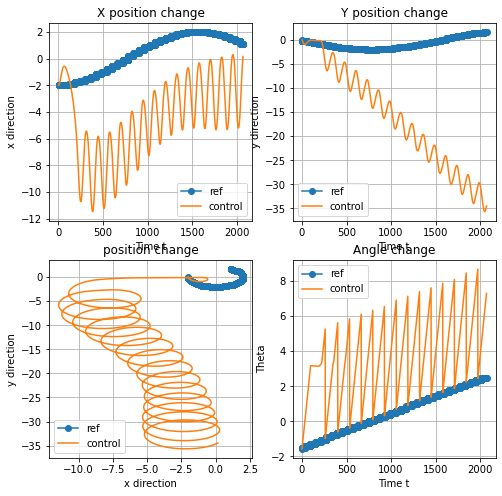

Point 71 ,Step 1 - MSE error in lifted space,state x, input u:
36.035718609327525 [  0.21343968 -34.36159615   7.34884322] [1.1479738 0.5      ]
Point 71 ,Step 2 - MSE error in lifted space,state x, input u:
35.935744464425525 [  0.26801076 -34.26291306   7.39884322] [1.12766818 0.5       ]
Point 71 ,Step 3 - MSE error in lifted space,state x, input u:
35.83507235712334 [  0.316749   -34.16332702   7.44884322] [1.1087288 0.5      ]
Point 71 ,Step 4 - MSE error in lifted space,state x, input u:
35.73385598955702 [  0.35976856 -34.06301638   7.49884322] [1.09146261 0.5       ]
Point 71 ,Step 5 - MSE error in lifted space,state x, input u:
35.6322819318194 [  0.39716172 -33.96218885   7.54884322] [1.07538091 0.5       ]
Point 71 ,Step 6 - MSE error in lifted space,state x, input u:
35.53053291264267 [  0.42901943 -33.86104535   7.59884322] [1.0604207 0.5      ]
Point 71 ,Step 7 - MSE error in lifted space,state x, input u:
35.42878369434122 [  0.45543274 -33.75977611   7.64884322] [1.0465

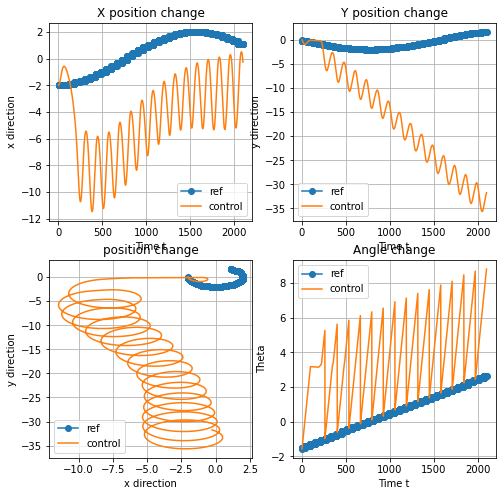

Point 72 ,Step 1 - MSE error in lifted space,state x, input u:
33.48308686030317 [ -0.35185269 -31.67736418   8.84884322] [1.03084314 0.5       ]
Point 72 ,Step 2 - MSE error in lifted space,state x, input u:
33.42974611946611 [ -0.43930844 -31.62057273   8.89884322] [1.04277402 0.5       ]
Point 72 ,Step 3 - MSE error in lifted space,state x, input u:
33.36680219559889 [ -0.55633468 -31.55264262   2.66565791] [1.35313119 0.5       ]
Point 72 ,Step 4 - MSE error in lifted space,state x, input u:
33.30863385838908 [ -0.68032665 -31.48873038   2.71565791] [1.39494742 0.5       ]
Point 72 ,Step 5 - MSE error in lifted space,state x, input u:
33.256651317387174 [ -0.8091583  -31.43027819   2.76565791] [1.41471741 0.5       ]
Point 72 ,Step 6 - MSE error in lifted space,state x, input u:
33.211243013461875 [ -0.94253094 -31.37763514   2.81565791] [1.43386017 0.5       ]
Point 72 ,Step 7 - MSE error in lifted space,state x, input u:
33.1727240641953 [ -1.08029762 -31.33107153   2.86565791] [

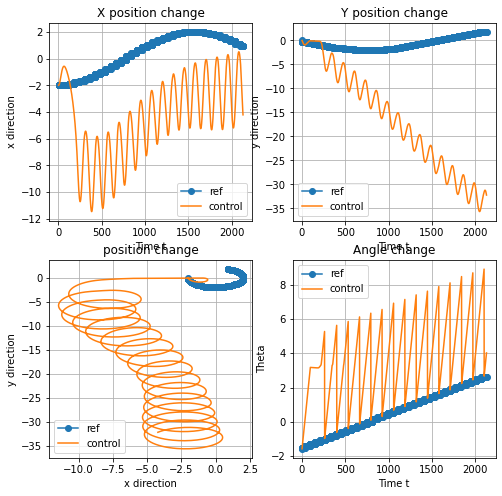

Point 73 ,Step 1 - MSE error in lifted space,state x, input u:
34.50965604022692 [ -4.31567567 -32.33000494   4.06565087] [1.50000016 0.49999705]
Point 73 ,Step 2 - MSE error in lifted space,state x, input u:
34.64173982564381 [ -4.40606365 -32.44971299   4.11565057] [1.50000016 0.49999706]
Point 73 ,Step 3 - MSE error in lifted space,state x, input u:
34.77733701554753 [ -4.4903558  -32.57378893   4.16565028] [1.50000017 0.49999706]
Point 73 ,Step 4 - MSE error in lifted space,state x, input u:
34.916069765297784 [ -4.56834142 -32.70192264   4.21564998] [1.50000017 0.49999706]
Point 73 ,Step 5 - MSE error in lifted space,state x, input u:
35.05755616612208 [ -4.6398256  -32.83379384   4.26565002] [1.5        0.50000036]
Point 73 ,Step 6 - MSE error in lifted space,state x, input u:
35.20141156318892 [ -4.70462963 -32.96907295   4.31565004] [1.5        0.50000024]
Point 73 ,Step 7 - MSE error in lifted space,state x, input u:
35.34724968529223 [ -4.76259152 -33.10742185   4.36565004] [

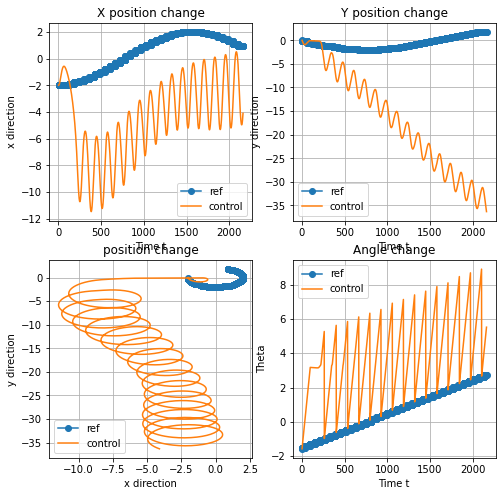

Point 74 ,Step 1 - MSE error in lifted space,state x, input u:
38.5701038053896 [ -3.9958941  -36.40774408   5.5656501 ] [1.5 0.5]
Point 74 ,Step 2 - MSE error in lifted space,state x, input u:
38.65446469314325 [ -3.88287979 -36.50637353   5.6156501 ] [1.5 0.5]
Point 74 ,Step 3 - MSE error in lifted space,state x, input u:
38.73293817162604 [ -3.76507731 -36.59923135   5.6656501 ] [1.5 0.5]
Point 74 ,Step 4 - MSE error in lifted space,state x, input u:
38.805364379878746 [ -3.64278109 -36.68608545   5.7156501 ] [1.5 0.5]
Point 74 ,Step 5 - MSE error in lifted space,state x, input u:
38.87159656959702 [ -3.51629682 -36.76671875   5.7656501 ] [1.5 0.5]
Point 74 ,Step 6 - MSE error in lifted space,state x, input u:
38.93150120328483 [ -3.38594063 -36.84092969   5.8156501 ] [1.5 0.5]
Point 74 ,Step 7 - MSE error in lifted space,state x, input u:
38.98495804002995 [ -3.25203835 -36.9085328    5.8656501 ] [1.5 0.5]
Point 74 ,Step 8 - MSE error in lifted space,state x, input u:
39.0318602098

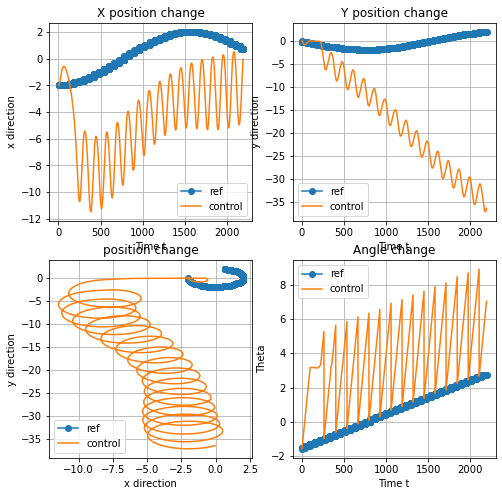

Point 75 ,Step 1 - MSE error in lifted space,state x, input u:
38.293005777650635 [  0.05010386 -36.41123883   7.0656501 ] [1.32998308 0.5       ]
Point 75 ,Step 2 - MSE error in lifted space,state x, input u:
38.199762829682726 [  0.14245919 -36.31942374   7.1156501 ] [1.30228707 0.5       ]
Point 75 ,Step 3 - MSE error in lifted space,state x, input u:
38.10425571363507 [  0.22834331 -36.22504918   7.1656501 ] [1.27603459 0.5       ]
Point 75 ,Step 4 - MSE error in lifted space,state x, input u:
38.006762579576176 [  0.30781126 -36.12843572   7.2156501 ] [1.25097221 0.5       ]
Point 75 ,Step 5 - MSE error in lifted space,state x, input u:
37.90755041314635 [  0.38092802 -36.02988946   7.2656501 ] [1.22708702 0.5       ]
Point 75 ,Step 6 - MSE error in lifted space,state x, input u:
37.80687364831504 [  0.44776821 -35.92970059   7.3156501 ] [1.20438453 0.5       ]
Point 75 ,Step 7 - MSE error in lifted space,state x, input u:
37.70497373681383 [  0.50841475 -35.82814298   7.3656501 ]

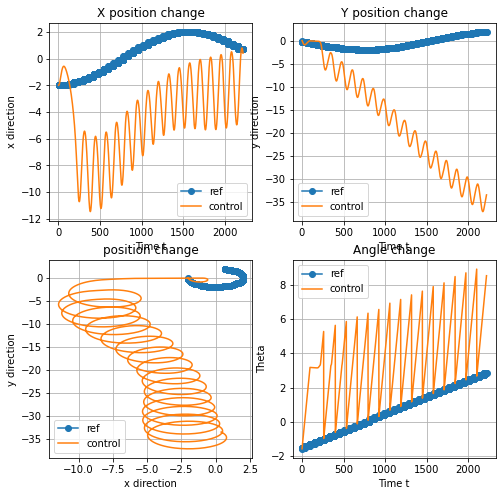

Point 76 ,Step 1 - MSE error in lifted space,state x, input u:
35.42498792739554 [  0.33890375 -33.48001688   8.5656501 ] [1.0179139 0.5      ]
Point 76 ,Step 2 - MSE error in lifted space,state x, input u:
35.34765687044164 [  0.2719466  -33.40237946   8.6156501 ] [1.02522334 0.5       ]
Point 76 ,Step 3 - MSE error in lifted space,state x, input u:
35.273355682218266 [  0.200645   -33.32761101   8.6656501 ] [1.03316219 0.5       ]
Point 76 ,Step 4 - MSE error in lifted space,state x, input u:
35.202307129623954 [  0.1250718 -33.2559077   8.7156501] [1.04176163 0.5       ]
Point 76 ,Step 5 - MSE error in lifted space,state x, input u:
35.13471293830088 [  0.04527776 -33.18744335   8.7656501 ] [1.05140168 0.5       ]
Point 76 ,Step 6 - MSE error in lifted space,state x, input u:
35.0707805578362 [ -0.03868542 -33.12239637   8.8156501 ] [1.06211708 0.5       ]
Point 76 ,Step 7 - MSE error in lifted space,state x, input u:
35.01072550394596 [ -0.12676205 -33.06095222   8.8656501 ] [1.073

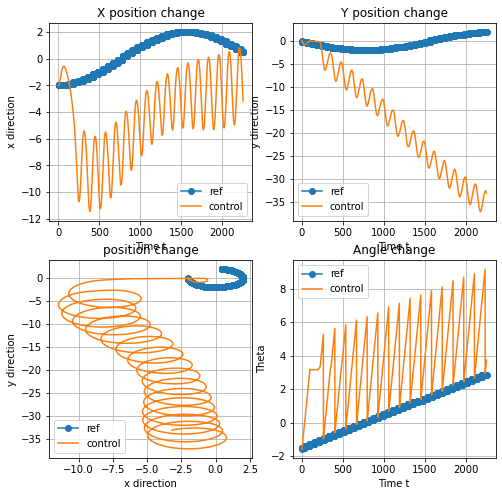

Point 77 ,Step 1 - MSE error in lifted space,state x, input u:
35.35784465058327 [ -3.30954128 -33.21085345   3.78246099] [1.50000021 0.4999957 ]
Point 77 ,Step 2 - MSE error in lifted space,state x, input u:
35.46002793013666 [ -3.42977783 -33.30053722   3.83246057] [1.5000002  0.49999581]
Point 77 ,Step 3 - MSE error in lifted space,state x, input u:
35.56788687427902 [ -3.54538183 -33.39611818   3.88246016] [1.5000002  0.49999591]
Point 77 ,Step 4 - MSE error in lifted space,state x, input u:
35.68110169142587 [ -3.65606435 -33.49735744   3.93245976] [1.5000002  0.49999599]
Point 77 ,Step 5 - MSE error in lifted space,state x, input u:
35.799339978973556 [ -3.76154872 -33.60400195   3.98245937] [1.5000002  0.49999607]
Point 77 ,Step 6 - MSE error in lifted space,state x, input u:
35.92225810310253 [ -3.86157131 -33.71578516   4.03245898] [1.5000002  0.49999613]
Point 77 ,Step 7 - MSE error in lifted space,state x, input u:
36.04950256052822 [ -3.9558821  -33.83242767   4.08245898] [

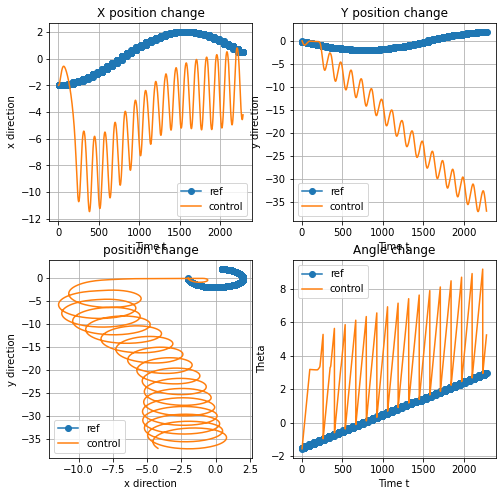

Point 78 ,Step 1 - MSE error in lifted space,state x, input u:
39.445256173269314 [ -4.14190253 -37.21552509   5.28245906] [1.5 0.5]
Point 78 ,Step 2 - MSE error in lifted space,state x, input u:
39.56188570293375 [ -4.06094887 -37.34180457   5.33245906] [1.5 0.5]
Point 78 ,Step 3 - MSE error in lifted space,state x, input u:
39.67390015443392 [ -3.97378504 -37.46388023   5.38245912] [1.5        0.50000053]
Point 78 ,Step 4 - MSE error in lifted space,state x, input u:
39.78105967825966 [ -3.8806289  -37.58144694   5.43245912] [1.5 0.5]
Point 78 ,Step 5 - MSE error in lifted space,state x, input u:
39.8831366159957 [ -3.78171329 -37.69421086   5.48245912] [1.5 0.5]
Point 78 ,Step 6 - MSE error in lifted space,state x, input u:
39.979915703022044 [ -3.67728545 -37.80189014   5.53245912] [1.5 0.5]
Point 78 ,Step 7 - MSE error in lifted space,state x, input u:
40.07119427143371 [ -3.5676064  -37.90421563   5.58245912] [1.5 0.5]
Point 78 ,Step 8 - MSE error in lifted space,state x, input u

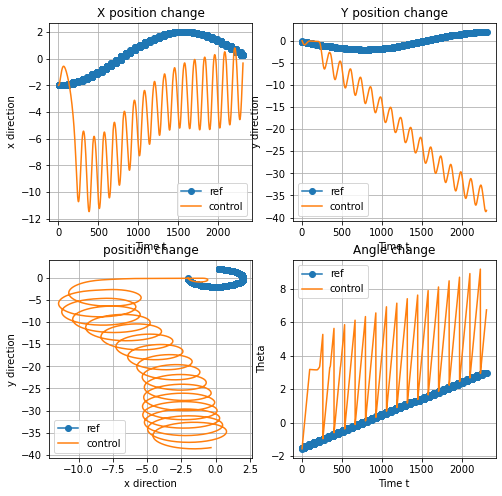

Point 79 ,Step 1 - MSE error in lifted space,state x, input u:
40.31763192620965 [ -0.2061422  -38.32908071   6.78245912] [1.5 0.5]
Point 79 ,Step 2 - MSE error in lifted space,state x, input u:
40.245300223725856 [ -0.07573731 -38.2579631    6.83245912] [1.48536696 0.5       ]
Point 79 ,Step 3 - MSE error in lifted space,state x, input u:
40.16860637422329 [  0.04830621 -38.18203526   6.88245912] [1.45436694 0.5       ]
Point 79 ,Step 4 - MSE error in lifted space,state x, input u:
40.087978524498546 [  0.16579543 -38.10178175   6.93245912] [1.42282616 0.5       ]
Point 79 ,Step 5 - MSE error in lifted space,state x, input u:
40.003766338463045 [  0.27668793 -38.01760778   6.98245912] [1.39220696 0.5       ]
Point 79 ,Step 6 - MSE error in lifted space,state x, input u:
39.916301346493334 [  0.3809745  -37.92989779   7.03245912] [1.36267137 0.5       ]
Point 79 ,Step 7 - MSE error in lifted space,state x, input u:
39.82590230758194 [  0.47866678 -37.83902043   7.08245912] [1.33425919 

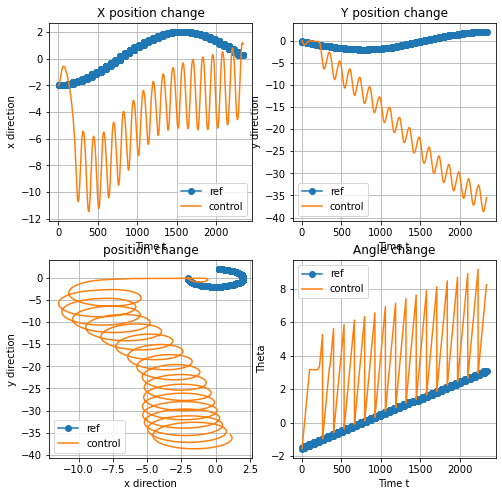

Point 80 ,Step 1 - MSE error in lifted space,state x, input u:
37.431463780779914 [  1.03704222 -35.41709535   8.28245912] [0.99919982 0.5       ]
Point 80 ,Step 2 - MSE error in lifted space,state x, input u:
37.33932386723982 [  0.99545559 -35.32605223   8.33245912] [1.00091445 0.5       ]
Point 80 ,Step 3 - MSE error in lifted space,state x, input u:
37.24902287558427 [  0.94922794 -35.23692618   8.38245912] [1.00401433 0.5       ]
Point 80 ,Step 4 - MSE error in lifted space,state x, input u:
37.160707381185034 [  0.89838428 -35.14984628   8.43245912] [1.00836435 0.5       ]
Point 80 ,Step 5 - MSE error in lifted space,state x, input u:
37.07453230047448 [  0.84294631 -35.06494822   8.48245912] [1.01395507 0.5       ]
Point 80 ,Step 6 - MSE error in lifted space,state x, input u:
36.99066075878448 [  0.78293269 -34.98237418   8.53245912] [1.02078925 0.5       ]
Point 80 ,Step 7 - MSE error in lifted space,state x, input u:
36.909264838371826 [  0.71835983 -34.90227351   8.58245912]

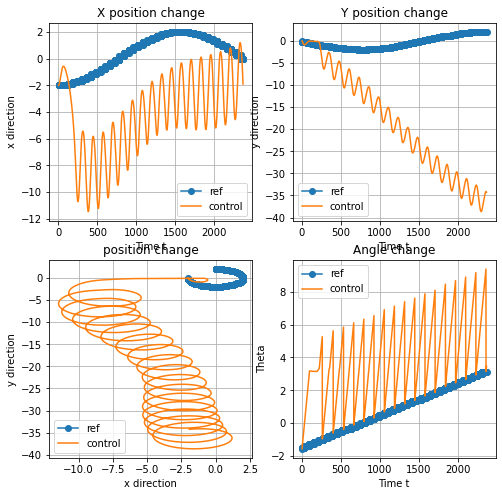

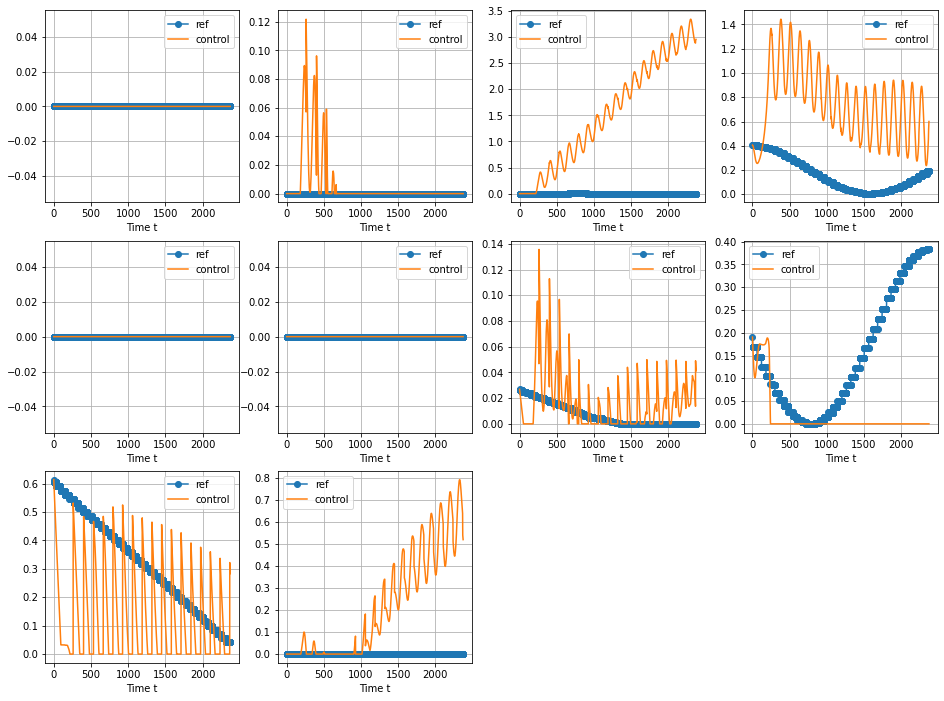

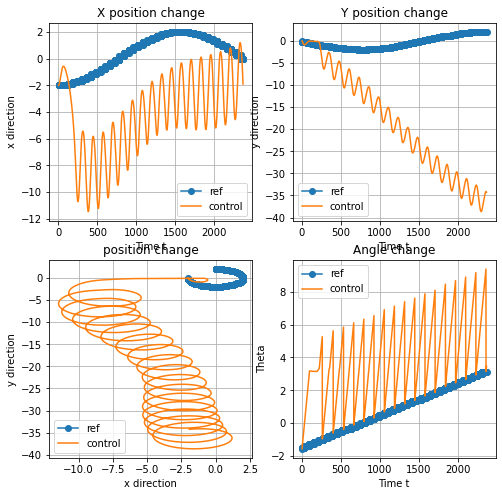

Average time needed per step is 48.403203755273616 ms.
MSE loss: 533.6072623027626
Controled path file: Q-[10. 10. 10. 10. 10. 10. 10. 10. 10. 10.]_R-[0.1 0.1]_rho-0.01_Nc-5
Total time needed is 154051.84040000002 ms.


In [7]:
# get augmented matrices
model_file = 'unmasked_encoder_[3, 32, 64, 8]_decoder_[11, 128, 64, 32, 3]_hyper_[1.0, 3.0, 0.3, 1e-07, 1e-07, 1e-07, 10]_batch_10'
Q = 100*np.diag(np.array([0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]))
R = 0.1*np.diag(np.array([1.,1.]))
rho = 0.01
# Np = 6
Nc = 5
thre = 0.1
ref = np.load(path+".npy",allow_pickle=True).item()
path_ref = ref['path']
x_init = ref['init state']
u_init = np.array([0.,0.])#1.5*10*np.pi/SimLength,-10*np.pi/SimLength])
t1 = time.perf_counter()
file_name = MPC_control_process_closed(model_file,path_ref,u_init,x_init,Q,R,rho,Nc,thre)
t2 = time.perf_counter()
print("Total time needed is "+str(1000*(t2-t1))+" ms.")

In [1]:
control_files = [file_name]
ref_file = 'SimLenth_200_Ts_0.1'
MPC_result_plot(ref_file,control_files,Nc)

NameError: name 'file_name' is not defined

Init state:[0.1        0.         3.14159265]
Target state:[-0.87622743  0.21336671 -0.09914262]
Step 1: [-0.73661508 -0.29631704  0.32786901], [-10.34086965 -30.6216042 ], 0.4010555556094147
Step 2: [-0.88572739  0.02209212  0.03072034], [-4.00289828 -3.1367992 ], 0.15571147372703414
Step 3: [-0.90859154  0.06224659  0.00121687], [-1.49910931 -0.31861735], 0.16137498028010588
Step 4: [-0.88837041  0.06462974 -0.00214399], [-0.56206496 -0.04945194], 0.1710685945285632
Step 5: [-0.89575526  0.06947952 -0.00455963], [-0.20662397 -0.00259079], 0.17544328618908214
Step 6: [-0.89263809  0.06800581 -0.00377966], [-0.07757328 -0.00216315], 0.1770357794751264
Step 7: [-0.89231451  0.06895362 -0.00450008], [-0.02676516  0.00046692], 0.1776877349419027
Step 8: [-0.89357217  0.06874902 -0.0041351 ], [-0.00952973  0.00022789], 0.17782130073908425
Step 9: [-0.89225666  0.06904245 -0.00451445], [-0.0019643   0.00049145], 0.1778999534610738
Step 10: [-0.89328697  0.06900504 -0.00433301], [0.00012103 

Step 320: [-0.89188078  0.0746417  -0.00823843], [0.00155348 0.00047307], 0.16226666110677399
Step 321: [-0.89187794  0.07465851 -0.0082499 ], [0.00155266 0.00047293], 0.1622203713938142
Step 322: [-0.89187511  0.07467531 -0.00826137], [0.00155184 0.00047278], 0.1621741064906493
Step 323: [-0.89187227  0.07469211 -0.00827284], [0.00155101 0.00047263], 0.162127866384186
Step 324: [-0.89186944  0.0747089  -0.00828429], [0.00155019 0.00047249], 0.16208165106133693
Step 325: [-0.89186661  0.07472568 -0.00829575], [0.00154937 0.00047234], 0.16203546050902098
Step 326: [-0.89186379  0.07474246 -0.0083072 ], [0.00154855 0.0004722 ], 0.16198929471416315
Step 327: [-0.89186096  0.07475923 -0.00831864], [0.00154773 0.00047205], 0.16194315366369447
Step 328: [-0.89185813  0.07477599 -0.00833008], [0.00154691 0.0004719 ], 0.16189703734455213
Step 329: [-0.89185531  0.07479275 -0.00834152], [0.00154609 0.00047176], 0.16185094574367948
Step 330: [-0.89185248  0.0748095  -0.00835295], [0.00154527 0.0

Step 674: [-0.89095229  0.08019877 -0.01202982], [0.00128653 0.00042543], 0.14733807431446913
Step 675: [-0.89094987  0.08021341 -0.01203981], [0.00128584 0.00042531], 0.14729979238087823
Step 676: [-0.89094745  0.08022805 -0.01204979], [0.00128515 0.00042518], 0.1472615309855785
Step 677: [-0.89094503  0.08024268 -0.01205977], [0.00128446 0.00042506], 0.14722329011748514
Step 678: [-0.89094261  0.0802573  -0.01206974], [0.00128378 0.00042494], 0.14718506976551848
Step 679: [-0.89094019  0.08027192 -0.01207972], [0.00128309 0.00042481], 0.14714686991860418
Step 680: [-0.89093777  0.08028654 -0.01208968], [0.0012824  0.00042469], 0.14710869056567308
Step 681: [-0.89093536  0.08030115 -0.01209965], [0.00128172 0.00042457], 0.1470705316956613
Step 682: [-0.89093294  0.08031575 -0.01210961], [0.00128103 0.00042444], 0.1470323932975103
Step 683: [-0.89093053  0.08033035 -0.01211956], [0.00128034 0.00042432], 0.14699427536016665
Step 684: [-0.89092812  0.08034494 -0.01212952], [0.00127966 0.

Step 978: [-0.88835181  0.08423627 -0.01590505], [0.00109236 0.00039047], 0.1365966736840026
Step 979: [-0.88834189  0.08424864 -0.01591806], [0.00109177 0.00039037], 0.13656414848644483
Step 980: [-0.88833197  0.08426101 -0.01593108], [0.00109118 0.00039026], 0.1365316406896132
Step 981: [-0.88832205  0.08427338 -0.01594408], [0.00109059 0.00039015], 0.13649915028392454
Step 982: [-0.88831214  0.08428574 -0.01595708], [0.00109    0.00039005], 0.13646667725980036
Step 983: [-0.88830224  0.08429809 -0.01597008], [0.00108941 0.00038994], 0.1364342216076668
Step 984: [-0.88829234  0.08431044 -0.01598307], [0.00108882 0.00038983], 0.13640178331795455
Step 985: [-0.88828244  0.08432279 -0.01599605], [0.00108824 0.00038973], 0.13636936238109895
Step 986: [-0.88827255  0.08433513 -0.01600903], [0.00108765 0.00038962], 0.1363369587875401
Step 987: [-0.88826267  0.08434747 -0.01602201], [0.00108706 0.00038951], 0.1363045725277226
Step 988: [-0.88825279  0.0843598  -0.01603497], [0.00108647 0.00

Step 1271: [-0.88565264  0.08767987 -0.0194937 ], [0.00093138 0.00036123], 0.1277727582983174
Step 1272: [-0.88564411  0.08769103 -0.01950521], [0.00093087 0.00036113], 0.12774494027376562
Step 1273: [-0.88563559  0.08770218 -0.01951672], [0.00093036 0.00036104], 0.12771713703310117
Step 1274: [-0.88562707  0.08771333 -0.01952822], [0.00092985 0.00036095], 0.12768934856802436
Step 1275: [-0.88561855  0.08772447 -0.01953971], [0.00092935 0.00036085], 0.12766157487023955
Step 1276: [-0.88561004  0.08773561 -0.0195512 ], [0.00092884 0.00036076], 0.1276338159314553
Step 1277: [-0.88560154  0.08774675 -0.01956269], [0.00092833 0.00036067], 0.1276060717433843
Step 1278: [-0.88559303  0.08775789 -0.01957417], [0.00092782 0.00036058], 0.12757834229774329
Step 1279: [-0.88558454  0.08776902 -0.01958564], [0.00092731 0.00036048], 0.12755062758625324
Step 1280: [-0.88557604  0.08778014 -0.01959712], [0.0009268  0.00036039], 0.12752292760063916
Step 1281: [-0.88556755  0.08779127 -0.01960858], [0.

Step 1626: [-0.88288732  0.09141132 -0.023296  ], [0.00076568 0.00033078], 0.11876755484753279
Step 1627: [-0.88288023  0.09142121 -0.02330596], [0.00076525 0.0003307 ], 0.11874449309350689
Step 1628: [-0.88287314  0.09143111 -0.02331591], [0.00076483 0.00033062], 0.11872144342481815
Step 1629: [-0.88286606  0.091441   -0.02332585], [0.0007644  0.00033054], 0.11869840583453496
Step 1630: [-0.88285898  0.09145089 -0.02333579], [0.00076398 0.00033046], 0.11867538031572923
Step 1631: [-0.88285191  0.09146077 -0.02334573], [0.00076355 0.00033039], 0.11865236686147648
Step 1632: [-0.88284483  0.09147065 -0.02335566], [0.00076313 0.00033031], 0.11862936546485583
Step 1633: [-0.88283777  0.09148053 -0.02336559], [0.0007627  0.00033023], 0.11860637611894995
Step 1634: [-0.8828307   0.09149041 -0.02337551], [0.00076228 0.00033015], 0.11858339881684511
Step 1635: [-0.88282364  0.09150028 -0.02338543], [0.00076185 0.00033007], 0.11856043355163116
Step 1636: [-0.88281659  0.09151015 -0.02339535], 

Step 1926: [-0.88091844  0.09424162 -0.02611043], [0.00064704 0.00030869], 0.11236133343245724
Step 1927: [-0.88091238  0.09425061 -0.02611926], [0.00064667 0.00030862], 0.11234160190530956
Step 1928: [-0.88090632  0.0942596  -0.02612809], [0.00064631 0.00030855], 0.11232188053857822
Step 1929: [-0.88090027  0.09426858 -0.02613692], [0.00064594 0.00030848], 0.11230216932634463
Step 1930: [-0.88089422  0.09427756 -0.02614574], [0.00064558 0.00030842], 0.11228246826269345
Step 1931: [-0.88088817  0.09428654 -0.02615456], [0.00064521 0.00030835], 0.11226277734171249
Step 1932: [-0.88088213  0.09429552 -0.02616338], [0.00064484 0.00030828], 0.1122430965574927
Step 1933: [-0.88087609  0.09430449 -0.02617219], [0.00064448 0.00030821], 0.11222342590412827
Step 1934: [-0.88087006  0.09431346 -0.026181  ], [0.00064411 0.00030814], 0.11220376537571645
Step 1935: [-0.88086402  0.09432243 -0.02618981], [0.00064375 0.00030807], 0.11218411496635773
Step 1936: [-0.88085799  0.09433139 -0.02619861], [

Step 2252: [-0.87910308  0.09703078 -0.02881633], [0.00053696 0.0002879 ], 0.10643466803368609
Step 2253: [-0.87909798  0.09703892 -0.02882412], [0.00053665 0.00028784], 0.10641795280738515
Step 2254: [-0.87909288  0.09704706 -0.02883191], [0.00053634 0.00028778], 0.10640124597259867
Step 2255: [-0.87908778  0.09705519 -0.02883969], [0.00053603 0.00028772], 0.10638454752437322
Step 2256: [-0.87908269  0.09706333 -0.02884747], [0.00053572 0.00028766], 0.10636785745775827
Step 2257: [-0.8790776   0.09707146 -0.02885525], [0.00053541 0.0002876 ], 0.10635117576780595
Step 2258: [-0.87907251  0.09707959 -0.02886303], [0.0005351  0.00028754], 0.1063345024495712
Step 2259: [-0.87906742  0.09708772 -0.0288708 ], [0.00053479 0.00028749], 0.10631783749811169
Step 2260: [-0.87906234  0.09709584 -0.02887857], [0.00053448 0.00028743], 0.1063011809084878
Step 2261: [-0.87905726  0.09710396 -0.02888634], [0.00053418 0.00028737], 0.10628453267576277
Step 2262: [-0.87905218  0.09711208 -0.02889411], [0

Step 2591: [-0.87751996  0.09965993 -0.03129765], [0.00044022 0.0002693 ], 0.10121853123441785
Step 2592: [-0.8775157   0.09966732 -0.03130452], [0.00043996 0.00026925], 0.10120439401877603
Step 2593: [-0.87751145  0.0996747  -0.03131139], [0.0004397 0.0002692], 0.1011902636654812
Step 2594: [-0.87750719  0.09968209 -0.03131825], [0.00043944 0.00026915], 0.10117614017044502
Step 2595: [-0.87750294  0.09968947 -0.03132512], [0.00043918 0.0002691 ], 0.10116202352958141
Step 2596: [-0.87749869  0.09969685 -0.03133198], [0.00043892 0.00026905], 0.10114791373880672
Step 2597: [-0.87749444  0.09970423 -0.03133883], [0.00043865 0.000269  ], 0.10113381079403962
Step 2598: [-0.87749019  0.0997116  -0.03134569], [0.00043839 0.00026895], 0.10111971469120108
Step 2599: [-0.87748595  0.09971898 -0.03135254], [0.00043813 0.00026889], 0.10110562542621451
Step 2600: [-0.87748171  0.09972635 -0.03135939], [0.00043787 0.00026884], 0.1010915429950056
Step 2601: [-0.87747747  0.09973372 -0.03136624], [0.0

Step 2912: [-0.87626352  0.10193153 -0.03338123], [0.00036274 0.0002541 ], 0.09701159834807697
Step 2913: [-0.87625994  0.10193831 -0.03338736], [0.00036251 0.00025406], 0.0969994663352892
Step 2914: [-0.87625636  0.10194509 -0.03339349], [0.00036229 0.00025401], 0.09698733998729378
Step 2915: [-0.87625278  0.10195187 -0.03339961], [0.00036207 0.00025397], 0.09697521930070133
Step 2916: [-0.8762492   0.10195864 -0.03340574], [0.00036185 0.00025393], 0.0969631042721244
Step 2917: [-0.87624562  0.10196541 -0.03341186], [0.00036163 0.00025388], 0.09695099489817757
Step 2918: [-0.87624204  0.10197218 -0.03341797], [0.00036141 0.00025384], 0.09693889117547748
Step 2919: [-0.87623847  0.10197895 -0.03342409], [0.00036118 0.00025379], 0.09692679310064269
Step 2920: [-0.8762349   0.10198571 -0.0334302 ], [0.00036096 0.00025375], 0.09691470067029379
Step 2921: [-0.87623133  0.10199248 -0.03343631], [0.00036074 0.00025371], 0.09690261388105337
Step 2922: [-0.87622776  0.10199924 -0.03344242], [0

Step 3243: [-0.87517717  0.10408399 -0.03529913], [0.00029502 0.00024051], 0.0932859366038207
Step 3244: [-0.87517418  0.10409023 -0.03530461], [0.00029484 0.00024048], 0.09327550604232124
Step 3245: [-0.87517118  0.10409646 -0.03531008], [0.00029465 0.00024044], 0.09326508012725357
Step 3246: [-0.87516819  0.1041027  -0.03531556], [0.00029446 0.0002404 ], 0.09325465885583789
Step 3247: [-0.8751652   0.10410893 -0.03532103], [0.00029427 0.00024036], 0.09324424222529612
Step 3248: [-0.87516222  0.10411517 -0.03532649], [0.00029408 0.00024032], 0.09323383023285177
Step 3249: [-0.87515923  0.1041214  -0.03533196], [0.0002939  0.00024028], 0.09322342287573014
Step 3250: [-0.87515625  0.10412763 -0.03533742], [0.00029371 0.00024025], 0.09321302015115811
Step 3251: [-0.87515326  0.10413386 -0.03534289], [0.00029352 0.00024021], 0.0932026220563643
Step 3252: [-0.87515028  0.10414009 -0.03534835], [0.00029334 0.00024017], 0.09319222858857902
Step 3253: [-0.8751473   0.10414631 -0.03535381], [0

Step 3577: [-0.87426343  0.10608833 -0.03703209], [0.00023733 0.00022862], 0.09004424084555405
Step 3578: [-0.87426094  0.10609411 -0.03703701], [0.00023717 0.00022859], 0.0900352175047997
Step 3579: [-0.87425846  0.10609988 -0.03704192], [0.00023701 0.00022856], 0.09002619797012551
Step 3580: [-0.87425597  0.10610565 -0.03704683], [0.00023685 0.00022853], 0.09001718223926473
Step 3581: [-0.87425348  0.10611142 -0.03705174], [0.0002367  0.00022849], 0.09000817030995202
Step 3582: [-0.874251    0.10611719 -0.03705665], [0.00023654 0.00022846], 0.08999916217992344
Step 3583: [-0.87424851  0.10612295 -0.03706156], [0.00023638 0.00022843], 0.08999015784691647
Step 3584: [-0.87424603  0.10612872 -0.03706646], [0.00023622 0.00022839], 0.08998115730866993
Step 3585: [-0.87424355  0.10613448 -0.03707137], [0.00023606 0.00022836], 0.08997216056292405
Step 3586: [-0.87424107  0.10614025 -0.03707627], [0.00023591 0.00022833], 0.08996316760742046
Step 3587: [-0.8742386   0.10614601 -0.03708117], [

Step 3902: [-0.87352326  0.10789994 -0.03855202], [0.00018988 0.00021855], 0.08729980956907264
Step 3903: [-0.87352119  0.10790533 -0.03855647], [0.00018974 0.00021852], 0.08729191141329051
Step 3904: [-0.87351911  0.10791071 -0.03856091], [0.00018961 0.00021849], 0.08728401639596248
Step 3905: [-0.87351704  0.10791609 -0.03856536], [0.00018948 0.00021846], 0.0872761245152349
Step 3906: [-0.87351497  0.10792147 -0.03856981], [0.00018934 0.00021843], 0.08726823576925537
Step 3907: [-0.8735129   0.10792685 -0.03857425], [0.00018921 0.0002184 ], 0.08726035015617253
Step 3908: [-0.87351083  0.10793223 -0.03857869], [0.00018907 0.00021838], 0.08725246767413627
Step 3909: [-0.87350876  0.10793761 -0.03858313], [0.00018894 0.00021835], 0.08724458832129758
Step 3910: [-0.87350669  0.10794298 -0.03858757], [0.00018881 0.00021832], 0.08723671209580862
Step 3911: [-0.87350463  0.10794836 -0.03859201], [0.00018867 0.00021829], 0.08722883899582268
Step 3912: [-0.87350256  0.10795373 -0.03859645], [

Step 4232: [-0.87289895  0.109619   -0.03995204], [0.00014913 0.0002096 ], 0.08485332566286746
Step 4233: [-0.87289723  0.10962404 -0.03995609], [0.00014901 0.00020957], 0.08484636909037292
Step 4234: [-0.87289551  0.10962908 -0.03996013], [0.0001489  0.00020955], 0.08483941510327589
Step 4235: [-0.8728938   0.10963413 -0.03996417], [0.00014879 0.00020952], 0.08483246370006764
Step 4236: [-0.87289208  0.10963916 -0.03996822], [0.00014867 0.0002095 ], 0.08482551487924035
Step 4237: [-0.87289037  0.1096442  -0.03997226], [0.00014856 0.00020947], 0.0848185686392872
Step 4238: [-0.87288866  0.10964924 -0.0399763 ], [0.00014845 0.00020945], 0.08481162497870226
Step 4239: [-0.87288695  0.10965428 -0.03998033], [0.00014833 0.00020942], 0.08480468389598052
Step 4240: [-0.87288523  0.10965931 -0.03998437], [0.00014822 0.00020939], 0.08479774538961797
Step 4241: [-0.87288352  0.10966435 -0.03998841], [0.00014811 0.00020937], 0.08479080945811153
Step 4242: [-0.87288182  0.10966938 -0.03999244], [

Step 4557: [-0.87239033  0.11120963 -0.0412101 ], [0.0001152  0.00020185], 0.0827204218937337
Step 4558: [-0.87238891  0.11121439 -0.0412138 ], [0.0001151  0.00020183], 0.08271423122786761
Step 4559: [-0.87238749  0.11121914 -0.04121751], [0.00011501 0.00020181], 0.08270804270353611
Step 4560: [-0.87238607  0.11122389 -0.04122121], [0.00011491 0.00020179], 0.08270185631950792
Step 4561: [-0.87238465  0.11122864 -0.04122491], [0.00011482 0.00020176], 0.08269567207455261
Step 4562: [-0.87238324  0.11123339 -0.04122861], [0.00011472 0.00020174], 0.08268948996744044
Step 4563: [-0.87238182  0.11123813 -0.04123231], [0.00011463 0.00020172], 0.08268330999694246
Step 4564: [-0.87238041  0.11124288 -0.04123601], [0.00011453 0.0002017 ], 0.0826771321618305
Step 4565: [-0.87237899  0.11124763 -0.04123971], [0.00011443 0.00020168], 0.08267095646087716
Step 4566: [-0.87237758  0.11125237 -0.0412434 ], [0.00011434 0.00020165], 0.0826647828928558
Step 4567: [-0.87237617  0.11125712 -0.0412471 ], [0.

Step 4872: [-0.87198276  0.11266731 -0.04233131], [8.73170894e-05 1.95215308e-04], 0.08087021664948013
Step 4873: [-0.87198158  0.11267182 -0.04233473], [8.72355979e-05 1.95195453e-04], 0.08086464345775693
Step 4874: [-0.87198041  0.11267633 -0.04233815], [8.71541486e-05 1.95175606e-04], 0.08085907205538766
Step 4875: [-0.87197924  0.11268084 -0.04234157], [8.70727413e-05 1.95155766e-04], 0.08085350244136089
Step 4876: [-0.87197806  0.11268534 -0.04234499], [8.69913762e-05 1.95135933e-04], 0.08084793461466576
Step 4877: [-0.87197689  0.11268985 -0.04234841], [8.69100531e-05 1.95116108e-04], 0.08084236857429211
Step 4878: [-0.87197572  0.11269435 -0.04235182], [8.68287721e-05 1.95096290e-04], 0.08083680431923038
Step 4879: [-0.87197455  0.11269885 -0.04235524], [8.67475331e-05 1.95076479e-04], 0.08083124184847161
Step 4880: [-0.87197338  0.11270336 -0.04235865], [8.66663362e-05 1.95056676e-04], 0.08082568116100754
Step 4881: [-0.87197222  0.11270786 -0.04236207], [8.65851812e-05 1.95036

Step 5187: [-0.87164671  0.11405299 -0.04336932], [6.36262410e-05 1.89305877e-04], 0.07919817860076178
Step 5188: [-0.87164574  0.11405728 -0.0433725 ], [6.35570294e-05 1.89288164e-04], 0.0791931221281897
Step 5189: [-0.87164478  0.11406158 -0.04337567], [6.34878538e-05 1.89270456e-04], 0.07918806715553281
Step 5190: [-0.87164381  0.11406587 -0.04337885], [6.34187141e-05 1.89252755e-04], 0.0791830136819594
Step 5191: [-0.87164285  0.11407016 -0.04338202], [6.33496103e-05 1.89235060e-04], 0.07917796170663827
Step 5192: [-0.87164189  0.11407445 -0.04338519], [6.32805425e-05 1.89217372e-04], 0.07917291122873865
Step 5193: [-0.87164093  0.11407875 -0.04338836], [6.32115106e-05 1.89199690e-04], 0.07916786224743037
Step 5194: [-0.87163997  0.11408304 -0.04339154], [6.31425145e-05 1.89182014e-04], 0.07916281476188376
Step 5195: [-0.87163901  0.11408733 -0.04339471], [6.30735543e-05 1.89164344e-04], 0.07915776877126962
Step 5196: [-0.87163805  0.11409162 -0.04339788], [6.30046300e-05 1.8914668

Step 5512: [-0.87136376  0.11541675 -0.04436505], [4.29277453e-05 1.83863215e-04], 0.07762930608898506
Step 5513: [-0.87136298  0.11542085 -0.04436801], [4.28693209e-05 1.83847392e-04], 0.07762469606889624
Step 5514: [-0.8713622   0.11542495 -0.04437096], [4.28109272e-05 1.83831573e-04], 0.07762008730370831
Step 5515: [-0.87136142  0.11542905 -0.04437392], [4.27525639e-05 1.83815760e-04], 0.07761547979274044
Step 5516: [-0.87136064  0.11543315 -0.04437687], [4.26942312e-05 1.83799953e-04], 0.0776108735353122
Step 5517: [-0.87135986  0.11543725 -0.04437983], [4.26359290e-05 1.83784151e-04], 0.07760626853074355
Step 5518: [-0.87135908  0.11544135 -0.04438278], [4.25776572e-05 1.83768354e-04], 0.07760166477835491
Step 5519: [-0.8713583   0.11544545 -0.04438573], [4.25194159e-05 1.83752562e-04], 0.07759706227746711
Step 5520: [-0.87135752  0.11544955 -0.04438869], [4.24612051e-05 1.83736776e-04], 0.07759246102740136
Step 5521: [-0.87135675  0.11545364 -0.04439164], [4.24030247e-05 1.837209

Step 5832: [-0.87113893  0.11670227 -0.04528098], [2.57110623e-05 1.79059987e-04], 0.07621463806143827
Step 5833: [-0.8711383   0.1167062  -0.04528375], [2.56616683e-05 1.79045754e-04], 0.07621039700522668
Step 5834: [-0.87113767  0.11671014 -0.04528652], [2.56123004e-05 1.79031526e-04], 0.07620615700595142
Step 5835: [-0.87113705  0.11671407 -0.04528929], [2.55629584e-05 1.79017303e-04], 0.07620191806305233
Step 5836: [-0.87113642  0.11671801 -0.04529206], [2.55136424e-05 1.79003084e-04], 0.07619768017596952
Step 5837: [-0.87113579  0.11672194 -0.04529483], [2.54643524e-05 1.78988870e-04], 0.07619344334414349
Step 5838: [-0.87113517  0.11672588 -0.0452976 ], [2.54150883e-05 1.78974660e-04], 0.07618920756701505
Step 5839: [-0.87113454  0.11672981 -0.04530037], [2.53658502e-05 1.78960455e-04], 0.07618497284402533
Step 5840: [-0.87113392  0.11673374 -0.04530313], [2.53166380e-05 1.78946255e-04], 0.07618073917461585
Step 5841: [-0.87113329  0.11673767 -0.0453059 ], [2.52674517e-05 1.78932

Step 6155: [-0.87095787  0.11794928 -0.04614942], [1.10390415e-05 1.74689982e-04], 0.07489676866985998
Step 6156: [-0.87095738  0.11795307 -0.04615203], [1.09974010e-05 1.74677124e-04], 0.07489284166664886
Step 6157: [-0.87095688  0.11795686 -0.04615464], [1.09557826e-05 1.74664271e-04], 0.0748889155559202
Step 6158: [-0.87095638  0.11796065 -0.04615725], [1.09141863e-05 1.74651421e-04], 0.07488499033721281
Step 6159: [-0.87095589  0.11796443 -0.04615985], [1.08726121e-05 1.74638575e-04], 0.07488106601006572
Step 6160: [-0.87095539  0.11796822 -0.04616246], [1.08310599e-05 1.74625733e-04], 0.07487714257401834
Step 6161: [-0.8709549   0.11797201 -0.04616507], [1.07895298e-05 1.74612895e-04], 0.07487322002861024
Step 6162: [-0.87095441  0.11797579 -0.04616768], [1.07480217e-05 1.74600061e-04], 0.07486929837338135
Step 6163: [-0.87095391  0.11797958 -0.04617028], [1.07065357e-05 1.74587231e-04], 0.07486537760787182
Step 6164: [-0.87095342  0.11798336 -0.04617289], [1.06650717e-05 1.745744

Step 6456: [-0.87082446  0.11907096 -0.04691463], [-5.45174224e-07  1.70989255e-04], 0.07375304994459832
Step 6457: [-0.87082407  0.11907463 -0.04691711], [-5.80640697e-07  1.70977500e-04], 0.07374937193932235
Step 6458: [-0.87082368  0.11907829 -0.04691959], [-6.16088178e-07  1.70965749e-04], 0.07374569469940105
Step 6459: [-0.87082329  0.11908196 -0.04692206], [-6.51516677e-07  1.70954001e-04], 0.07374201822444879
Step 6460: [-0.8708229   0.11908562 -0.04692454], [-6.86926205e-07  1.70942257e-04], 0.07373834251408008
Step 6461: [-0.87082251  0.11908929 -0.04692702], [-7.22316769e-07  1.70930515e-04], 0.07373466756790976
Step 6462: [-0.87082212  0.11909295 -0.04692949], [-7.57688381e-07  1.70918778e-04], 0.07373099338555279
Step 6463: [-0.87082172  0.11909662 -0.04693197], [-7.93041050e-07  1.70907043e-04], 0.07372731996662447
Step 6464: [-0.87082133  0.11910028 -0.04693444], [-8.28374784e-07  1.70895313e-04], 0.07372364731074024
Step 6465: [-0.87082095  0.11910394 -0.04693692], [-8.6

Step 6754: [-0.87072104  0.12014729 -0.0476356 ], [-1.03140321e-05  1.67630227e-04], 0.07268926032757438
Step 6755: [-0.87072074  0.12015085 -0.04763797], [-1.03442423e-05  1.67619418e-04], 0.0726857942801849
Step 6756: [-0.87072043  0.12015441 -0.04764033], [-1.03744362e-05  1.67608613e-04], 0.07268232889269315
Step 6757: [-0.87072013  0.12015797 -0.04764269], [-1.04046137e-05  1.67597811e-04], 0.07267886416477527
Step 6758: [-0.87071983  0.12016153 -0.04764505], [-1.04347749e-05  1.67587011e-04], 0.07267540009610765
Step 6759: [-0.87071952  0.12016509 -0.04764741], [-1.04649198e-05  1.67576215e-04], 0.07267193668636684
Step 6760: [-0.87071922  0.12016864 -0.04764978], [-1.04950484e-05  1.67565421e-04], 0.07266847393522953
Step 6761: [-0.87071892  0.1201722  -0.04765214], [-1.05251607e-05  1.67554631e-04], 0.07266501184237267
Step 6762: [-0.87071862  0.12017576 -0.0476545 ], [-1.05552567e-05  1.67543843e-04], 0.07266155040747338
Step 6763: [-0.87071832  0.12017931 -0.04765686], [-1.05

Step 7056: [-0.87064114  0.12120702 -0.04833357], [-1.87307932e-05  1.64494359e-04], 0.07167109692428468
Step 7057: [-0.87064092  0.12121048 -0.04833583], [-1.87564241e-05  1.64484383e-04], 0.07166781626589562
Step 7058: [-0.87064069  0.12121394 -0.04833809], [-1.87820411e-05  1.64474409e-04], 0.071664536177665
Step 7059: [-0.87064046  0.1212174  -0.04834035], [-1.88076440e-05  1.64464438e-04], 0.07166125665932091
Step 7060: [-0.87064024  0.12122086 -0.04834262], [-1.88332328e-05  1.64454470e-04], 0.07165797771059157
Step 7061: [-0.87064001  0.12122432 -0.04834487], [-1.88588077e-05  1.64444504e-04], 0.07165469933120537
Step 7062: [-0.87063979  0.12122778 -0.04834713], [-1.88843686e-05  1.64434541e-04], 0.07165142152089087
Step 7063: [-0.87063956  0.12123124 -0.04834939], [-1.89099154e-05  1.64424580e-04], 0.07164814427937671
Step 7064: [-0.87063933  0.1212347  -0.04835165], [-1.89354483e-05  1.64414622e-04], 0.0716448676063918
Step 7065: [-0.87063911  0.12123815 -0.04835391], [-1.8960

Step 7375: [-0.87058     0.12229592 -0.04903942], [-2.62317313e-05  1.61435810e-04], 0.0706520921202348
Step 7376: [-0.87057984  0.12229929 -0.04904158], [-2.62532261e-05  1.61426594e-04], 0.07064898034746774
Step 7377: [-0.87057968  0.12230265 -0.04904375], [-2.6274709e-05  1.6141738e-04], 0.07064586906554103
Step 7378: [-0.87057952  0.12230602 -0.04904592], [-2.62961800e-05  1.61408168e-04], 0.07064275827422804
Step 7379: [-0.87057937  0.12230939 -0.04904808], [-2.63176390e-05  1.61398958e-04], 0.07063964797330216
Step 7380: [-0.87057921  0.12231275 -0.04905025], [-2.63390861e-05  1.61389751e-04], 0.07063653816253693
Step 7381: [-0.87057905  0.12231612 -0.04905241], [-2.63605213e-05  1.61380545e-04], 0.07063342884170606
Step 7382: [-0.8705789   0.12231949 -0.04905458], [-2.63819445e-05  1.61371342e-04], 0.07063032001058334
Step 7383: [-0.87057874  0.12232285 -0.04905674], [-2.64033559e-05  1.61362141e-04], 0.0706272116689427
Step 7384: [-0.87057858  0.12232622 -0.0490589 ], [-2.64247

Step 7690: [-0.87053954  0.12334351 -0.04970854], [-3.24417137e-05  1.58636811e-04], 0.06969503818962634
Step 7691: [-0.87053944  0.12334679 -0.04971063], [-3.24597285e-05  1.58628242e-04], 0.06969207045148695
Step 7692: [-0.87053934  0.12335008 -0.04971271], [-3.24777332e-05  1.58619676e-04], 0.06968910313873511
Step 7693: [-0.87053924  0.12335336 -0.04971479], [-3.24957276e-05  1.58611111e-04], 0.06968613625118085
Step 7694: [-0.87053914  0.12335665 -0.04971688], [-3.25137119e-05  1.58602547e-04], 0.06968316978863438
Step 7695: [-0.87053904  0.12335993 -0.04971896], [-3.25316860e-05  1.58593986e-04], 0.06968020375090597
Step 7696: [-0.87053894  0.12336321 -0.04972104], [-3.25496500e-05  1.58585427e-04], 0.069677238137806
Step 7697: [-0.87053884  0.1233665  -0.04972312], [-3.25676037e-05  1.58576870e-04], 0.06967427294914501
Step 7698: [-0.87053875  0.12336978 -0.0497252 ], [-3.25855474e-05  1.58568314e-04], 0.06967130818473356
Step 7699: [-0.87053865  0.12337306 -0.04972729], [-3.260

Step 7982: [-0.87051708  0.12429239 -0.05030694], [-3.72895524e-05  1.56212357e-04], 0.06884578201786475
Step 7983: [-0.87051703  0.12429561 -0.05030895], [-3.73048005e-05  1.56204310e-04], 0.06884293084045857
Step 7984: [-0.87051698  0.12429882 -0.05031097], [-3.73200398e-05  1.56196265e-04], 0.06884008003723142
Step 7985: [-0.87051692  0.12430203 -0.05031299], [-3.73352704e-05  1.56188221e-04], 0.06883722960802177
Step 7986: [-0.87051687  0.12430525 -0.050315  ], [-3.73504922e-05  1.56180180e-04], 0.06883437955266816
Step 7987: [-0.87051681  0.12430846 -0.05031702], [-3.73657052e-05  1.56172139e-04], 0.06883152987100923
Step 7988: [-0.87051676  0.12431168 -0.05031903], [-3.73809094e-05  1.56164101e-04], 0.06882868056288365
Step 7989: [-0.87051671  0.12431489 -0.05032105], [-3.73961049e-05  1.56156064e-04], 0.06882583162813026
Step 7990: [-0.87051665  0.1243181  -0.05032306], [-3.74112916e-05  1.56148029e-04], 0.06882298306658798
Step 7991: [-0.8705166   0.12432132 -0.05032507], [-3.7

Step 8253: [-0.87050734  0.12515555 -0.05084549], [-4.11143209e-05  1.54090377e-04], 0.06808629127392053
Step 8254: [-0.87050732  0.1251587  -0.05084745], [-4.11273425e-05  1.54082756e-04], 0.06808353586930387
Step 8255: [-0.8705073   0.12516186 -0.05084941], [-4.11403565e-05  1.54075137e-04], 0.06808078079817391
Step 8256: [-0.87050728  0.12516501 -0.05085137], [-4.11533628e-05  1.54067519e-04], 0.0680780260603914
Step 8257: [-0.87050727  0.12516817 -0.05085333], [-4.11663614e-05  1.54059903e-04], 0.0680752716558171
Step 8258: [-0.87050725  0.12517132 -0.05085529], [-4.11793524e-05  1.54052288e-04], 0.06807251758431193
Step 8259: [-0.87050723  0.12517448 -0.05085725], [-4.11923358e-05  1.54044675e-04], 0.06806976384573679
Step 8260: [-0.87050721  0.12517763 -0.0508592 ], [-4.12053115e-05  1.54037063e-04], 0.06806701043995274
Step 8261: [-0.8705072   0.12518079 -0.05086116], [-4.12182795e-05  1.54029453e-04], 0.06806425736682087
Step 8262: [-0.87050718  0.12518394 -0.05086312], [-4.123

Step 8523: [-0.87050679  0.12600008 -0.05136756], [-4.43640561e-05  1.52084417e-04], 0.06735400666665227
Step 8524: [-0.8705068   0.12600318 -0.05136947], [-4.43751436e-05  1.52077173e-04], 0.0673513364820154
Step 8525: [-0.87050682  0.12600628 -0.05137137], [-4.43862243e-05  1.52069929e-04], 0.06734866659587281
Step 8526: [-0.87050683  0.12600938 -0.05137328], [-4.43972984e-05  1.52062688e-04], 0.06734599700810416
Step 8527: [-0.87050685  0.12601248 -0.05137519], [-4.44083658e-05  1.52055447e-04], 0.06734332771858917
Step 8528: [-0.87050686  0.12601558 -0.0513771 ], [-4.44194266e-05  1.52048208e-04], 0.06734065872720758
Step 8529: [-0.87050687  0.12601868 -0.05137901], [-4.44304806e-05  1.52040970e-04], 0.06733799003383928
Step 8530: [-0.87050689  0.12602178 -0.05138091], [-4.44415280e-05  1.52033733e-04], 0.06733532163836417
Step 8531: [-0.8705069   0.12602488 -0.05138282], [-4.44525687e-05  1.52026498e-04], 0.06733265354066219
Step 8532: [-0.87050692  0.12602798 -0.05138473], [-4.44

Step 8801: [-0.87051449  0.1268547  -0.05189139], [-4.72006633e-05  1.50118945e-04], 0.06662277721187035
Step 8802: [-0.87051453  0.12685775 -0.05189326], [-4.72100177e-05  1.50112044e-04], 0.06662018559507459
Step 8803: [-0.87051457  0.1268608  -0.05189512], [-4.72193662e-05  1.50105144e-04], 0.06661759424567897
Step 8804: [-0.87051461  0.12686384 -0.05189698], [-4.72287089e-05  1.50098245e-04], 0.06661500316357973
Step 8805: [-0.87051465  0.12686689 -0.05189884], [-4.72380458e-05  1.50091347e-04], 0.06661241234867318
Step 8806: [-0.8705147   0.12686994 -0.0519007 ], [-4.7247377e-05  1.5008445e-04], 0.06660982180085573
Step 8807: [-0.87051474  0.12687299 -0.05190256], [-4.72567023e-05  1.50077555e-04], 0.0666072315200238
Step 8808: [-0.87051478  0.12687603 -0.05190442], [-4.72660219e-05  1.50070660e-04], 0.0666046415060739
Step 8809: [-0.87051482  0.12687908 -0.05190628], [-4.72753356e-05  1.50063767e-04], 0.06660205175890255
Step 8810: [-0.87051486  0.12688213 -0.05190814], [-4.72846

Step 9018: [-0.87052557  0.12751195 -0.05229146], [-4.90993746e-05  1.48647726e-04], 0.06606649376625903
Step 9019: [-0.87052563  0.12751496 -0.05229328], [-4.91075363e-05  1.48641065e-04], 0.06606395783405838
Step 9020: [-0.87052569  0.12751797 -0.05229511], [-4.91156928e-05  1.48634405e-04], 0.06606142214798864
Step 9021: [-0.87052575  0.12752098 -0.05229694], [-4.91238442e-05  1.48627746e-04], 0.06605888670795727
Step 9022: [-0.87052581  0.12752399 -0.05229876], [-4.91319904e-05  1.48621088e-04], 0.0660563515138719
Step 9023: [-0.87052587  0.12752699 -0.05230059], [-4.91401313e-05  1.48614431e-04], 0.0660538165656401
Step 9024: [-0.87052594  0.12753    -0.05230241], [-4.91482671e-05  1.48607776e-04], 0.06605128186316957
Step 9025: [-0.870526    0.12753301 -0.05230424], [-4.91563977e-05  1.48601121e-04], 0.066048747406368
Step 9026: [-0.87052606  0.12753602 -0.05230607], [-4.91645232e-05  1.48594468e-04], 0.06604621319514316
Step 9027: [-0.87052612  0.12753903 -0.05230789], [-4.91726

Step 9200: [-0.8705379   0.12805689 -0.05262146], [-5.05017712e-05  1.47452402e-04], 0.06560891884484794
Step 9201: [-0.87053797  0.12805987 -0.05262326], [-5.05090294e-05  1.47445926e-04], 0.06560642623217208
Step 9202: [-0.87053805  0.12806285 -0.05262506], [-5.05162828e-05  1.47439451e-04], 0.06560393384957143
Step 9203: [-0.87053812  0.12806583 -0.05262686], [-5.05235315e-05  1.47432977e-04], 0.06560144169696189
Step 9204: [-0.8705382   0.12806881 -0.05262866], [-5.05307755e-05  1.47426504e-04], 0.06559894977425945
Step 9205: [-0.87053827  0.12807179 -0.05263046], [-5.05380148e-05  1.47420032e-04], 0.06559645808138016
Step 9206: [-0.87053835  0.12807476 -0.05263226], [-5.05452493e-05  1.47413561e-04], 0.06559396661824012
Step 9207: [-0.87053842  0.12807774 -0.05263406], [-5.05524791e-05  1.47407091e-04], 0.06559147538475539
Step 9208: [-0.8705385   0.12808072 -0.05263586], [-5.05597042e-05  1.47400622e-04], 0.06558898438084217
Step 9209: [-0.87053857  0.1280837  -0.05263766], [-5.0

Step 9374: [-0.87055201  0.12857275 -0.05293253], [-5.16954409e-05  1.46339967e-04], 0.06517859615758578
Step 9375: [-0.8705521   0.1285757  -0.05293431], [-5.17019102e-05  1.46333656e-04], 0.06517614234989084
Step 9376: [-0.87055219  0.12857865 -0.05293608], [-5.17083751e-05  1.46327345e-04], 0.0651736887582859
Step 9377: [-0.87055227  0.1285816  -0.05293786], [-5.17148358e-05  1.46321035e-04], 0.06517123538269415
Step 9378: [-0.87055236  0.12858455 -0.05293964], [-5.17212920e-05  1.46314726e-04], 0.06516878222303887
Step 9379: [-0.87055245  0.1285875  -0.05294141], [-5.17277440e-05  1.46308418e-04], 0.06516632927924339
Step 9380: [-0.87055254  0.12859045 -0.05294319], [-5.17341916e-05  1.46302110e-04], 0.06516387655123101
Step 9381: [-0.87055262  0.1285934  -0.05294496], [-5.17406349e-05  1.46295804e-04], 0.06516142403892518
Step 9382: [-0.87055271  0.12859635 -0.05294674], [-5.17470739e-05  1.46289498e-04], 0.06515897174224927
Step 9383: [-0.8705528   0.1285993  -0.05294851], [-5.17

Step 9595: [-0.87057289  0.12922103 -0.05332175], [-5.30235915e-05  1.44966496e-04], 0.06464142532627802
Step 9596: [-0.87057299  0.12922395 -0.0533235 ], [-5.30291546e-05  1.44960376e-04], 0.06463901747677257
Step 9597: [-0.87057309  0.12922686 -0.05332525], [-5.30347138e-05  1.44954257e-04], 0.06463660982732103
Step 9598: [-0.87057319  0.12922978 -0.05332699], [-5.30402692e-05  1.44948139e-04], 0.0646342023778549
Step 9599: [-0.87057329  0.1292327  -0.05332874], [-5.30458207e-05  1.44942022e-04], 0.06463179512830572
Step 9600: [-0.87057339  0.12923561 -0.05333049], [-5.30513684e-05  1.44935905e-04], 0.06462938807860509
Step 9601: [-0.87057349  0.12923853 -0.05333223], [-5.30569122e-05  1.44929789e-04], 0.06462698122868464
Step 9602: [-0.8705736   0.12924144 -0.05333398], [-5.30624521e-05  1.44923674e-04], 0.064624574578476
Step 9603: [-0.8705737   0.12924436 -0.05333573], [-5.30679882e-05  1.44917560e-04], 0.06462216812791087
Step 9604: [-0.8705738   0.12924727 -0.05333747], [-5.3073

Step 9775: [-0.87059208  0.12974355 -0.05363419], [-5.39644231e-05  1.43877959e-04], 0.0642111712832192
Step 9776: [-0.87059219  0.12974644 -0.05363591], [-5.39693202e-05  1.43871983e-04], 0.0642087983729902
Step 9777: [-0.8705923   0.12974933 -0.05363764], [-5.39742137e-05  1.43866008e-04], 0.0642064256510372
Step 9778: [-0.87059241  0.12975222 -0.05363936], [-5.39791037e-05  1.43860034e-04], 0.0642040531172977
Step 9779: [-0.87059252  0.12975511 -0.05364109], [-5.39839902e-05  1.43854060e-04], 0.06420168077170935
Step 9780: [-0.87059264  0.129758   -0.05364281], [-5.39888732e-05  1.43848087e-04], 0.06419930861420971
Step 9781: [-0.87059275  0.12976088 -0.05364453], [-5.39937526e-05  1.43842115e-04], 0.06419693664473644
Step 9782: [-0.87059286  0.12976377 -0.05364626], [-5.39986286e-05  1.43836144e-04], 0.06419456486322724
Step 9783: [-0.87059297  0.12976666 -0.05364798], [-5.40035009e-05  1.43830173e-04], 0.0641921932696198
Step 9784: [-0.87059309  0.12976955 -0.05364971], [-5.400836

Step 9947: [-0.87061207  0.13023842 -0.05392911], [-5.47562601e-05  1.42861174e-04], 0.06380574857242234
Step 9948: [-0.87061219  0.13024128 -0.05393081], [-5.47605756e-05  1.42855326e-04], 0.06380340715327207
Step 9949: [-0.87061231  0.13024415 -0.05393252], [-5.47648878e-05  1.42849479e-04], 0.06380106591211146
Step 9950: [-0.87061243  0.13024701 -0.05393422], [-5.47691968e-05  1.42843632e-04], 0.06379872484888327
Step 9951: [-0.87061255  0.13024987 -0.05393593], [-5.47735026e-05  1.42837786e-04], 0.06379638396353032
Step 9952: [-0.87061267  0.13025274 -0.05393763], [-5.47778052e-05  1.42831941e-04], 0.06379404325599544
Step 9953: [-0.87061279  0.1302556  -0.05393933], [-5.47821045e-05  1.42826097e-04], 0.06379170272622153
Step 9954: [-0.87061291  0.13025847 -0.05394104], [-5.47864006e-05  1.42820254e-04], 0.06378936237415149
Step 9955: [-0.87061303  0.13026133 -0.05394274], [-5.47906935e-05  1.42814411e-04], 0.06378702219972825
Step 9956: [-0.87061315  0.13026419 -0.05394445], [-5.4

Step 10237: [-0.87064899  0.13106339 -0.0544188 ], [-5.58786805e-05  1.41194315e-04], 0.06313397363346086
Step 10238: [-0.87064913  0.13106621 -0.05442048], [-5.58821244e-05  1.41188664e-04], 0.06313168154608191
Step 10239: [-0.87064926  0.13106904 -0.05442215], [-5.58855656e-05  1.41183014e-04], 0.06312938962125536
Step 10240: [-0.87064939  0.13107186 -0.05442382], [-5.58890040e-05  1.41177365e-04], 0.06312709785893178
Step 10241: [-0.87064953  0.13107469 -0.05442549], [-5.58924396e-05  1.41171716e-04], 0.06312480625906175
Step 10242: [-0.87064966  0.13107751 -0.05442717], [-5.58958724e-05  1.41166068e-04], 0.06312251482159591
Step 10243: [-0.8706498   0.13108034 -0.05442884], [-5.58993025e-05  1.41160420e-04], 0.06312022354648489
Step 10244: [-0.87064993  0.13108316 -0.05443051], [-5.59027298e-05  1.41154773e-04], 0.06311793243367934
Step 10245: [-0.87065006  0.13108598 -0.05443218], [-5.59061542e-05  1.41149127e-04], 0.06311564148313002
Step 10246: [-0.8706502   0.13108881 -0.054433

Step 10465: [-0.87068052  0.13170405 -0.05479755], [-5.65945207e-05  1.39922078e-04], 0.06261549053299485
Step 10466: [-0.87068066  0.13170684 -0.0547992 ], [-5.65973651e-05  1.39916567e-04], 0.06261323427529304
Step 10467: [-0.8706808   0.13170964 -0.05480085], [-5.66002071e-05  1.39911057e-04], 0.06261097816948949
Step 10468: [-0.87068094  0.13171243 -0.0548025 ], [-5.66030465e-05  1.39905548e-04], 0.06260872221554009
Step 10469: [-0.87068109  0.13171523 -0.05480415], [-5.66058836e-05  1.39900039e-04], 0.0626064664134007
Step 10470: [-0.87068123  0.13171802 -0.0548058 ], [-5.66087181e-05  1.39894531e-04], 0.06260421076302732
Step 10471: [-0.87068137  0.13172082 -0.05480745], [-5.66115502e-05  1.39889023e-04], 0.06260195526437584
Step 10472: [-0.87068151  0.13172361 -0.0548091 ], [-5.66143798e-05  1.39883516e-04], 0.06259969991740227
Step 10473: [-0.87068166  0.1317264  -0.05481075], [-5.66172069e-05  1.39878009e-04], 0.0625974447220626
Step 10474: [-0.8706818  0.1317292 -0.0548124], 

Step 10761: [-0.87072422  0.13252584 -0.05528161], [-5.73335854e-05  1.38315698e-04], 0.06195408803448053
Step 10762: [-0.87072437  0.1325286  -0.05528324], [-5.73357496e-05  1.38310353e-04], 0.06195187490276556
Step 10763: [-0.87072453  0.13253135 -0.05528486], [-5.73379118e-05  1.38305007e-04], 0.061949661910798814
Step 10764: [-0.87072468  0.13253411 -0.05528648], [-5.73400718e-05  1.38299663e-04], 0.061947449058542145
Step 10765: [-0.87072483  0.13253687 -0.0552881 ], [-5.73422297e-05  1.38294319e-04], 0.061945236345957465
Step 10766: [-0.87072498  0.13253962 -0.05528972], [-5.73443855e-05  1.38288975e-04], 0.061943023773006686
Step 10767: [-0.87072514  0.13254238 -0.05529134], [-5.73465392e-05  1.38283632e-04], 0.06194081133965174
Step 10768: [-0.87072529  0.13254514 -0.05529296], [-5.73486907e-05  1.38278289e-04], 0.0619385990458546
Step 10769: [-0.87072544  0.1325479  -0.05529458], [-5.73508402e-05  1.38272947e-04], 0.06193638689157723
Step 10770: [-0.87072559  0.13255065 -0.055

Step 11037: [-0.87076738  0.13328239 -0.05572567], [-5.78539426e-05  1.36859633e-04], 0.06134843929655682
Step 11038: [-0.87076754  0.13328511 -0.05572726], [-5.78555601e-05  1.36854425e-04], 0.0613462633512099
Step 11039: [-0.8707677   0.13328783 -0.05572886], [-5.78571757e-05  1.36849219e-04], 0.0613440875357662
Step 11040: [-0.87076786  0.13329056 -0.05573046], [-5.78587895e-05  1.36844012e-04], 0.061341911850192415
Step 11041: [-0.87076802  0.13329328 -0.05573205], [-5.78604015e-05  1.36838806e-04], 0.061339736294455216
Step 11042: [-0.87076818  0.13329601 -0.05573365], [-5.78620117e-05  1.36833601e-04], 0.061337560868521324
Step 11043: [-0.87076834  0.13329873 -0.05573524], [-5.78636200e-05  1.36828396e-04], 0.06133538557235747
Step 11044: [-0.87076851  0.13330146 -0.05573684], [-5.78652264e-05  1.36823192e-04], 0.06133321040593038
Step 11045: [-0.87076867  0.13330418 -0.05573844], [-5.78668310e-05  1.36817988e-04], 0.06133103536920684
Step 11046: [-0.87076883  0.1333069  -0.05574

Step 11290: [-0.87080866  0.13396801 -0.05612691], [-5.82069298e-05  1.35556991e-04], 0.060801979926820085
Step 11291: [-0.87080883  0.1339707  -0.05612849], [-5.82081105e-05  1.35551900e-04], 0.06079983582641949
Step 11292: [-0.870809    0.1339734  -0.05613006], [-5.82092897e-05  1.35546809e-04], 0.060797691847984156
Step 11293: [-0.87080916  0.13397609 -0.05613164], [-5.82104673e-05  1.35541718e-04], 0.06079554799148458
Step 11294: [-0.87080933  0.13397879 -0.05613321], [-5.82116432e-05  1.35536628e-04], 0.06079340425689129
Step 11295: [-0.87080949  0.13398148 -0.05613479], [-5.82128176e-05  1.35531538e-04], 0.0607912606441748
Step 11296: [-0.87080966  0.13398418 -0.05613636], [-5.82139903e-05  1.35526449e-04], 0.06078911715330565
Step 11297: [-0.87080983  0.13398687 -0.05613794], [-5.82151614e-05  1.35521360e-04], 0.06078697378425442
Step 11298: [-0.87080999  0.13398957 -0.05613951], [-5.82163310e-05  1.35516271e-04], 0.06078483053699166
Step 11299: [-0.87081016  0.13399226 -0.05614

Step 11521: [-0.87084757  0.13458765 -0.05648869], [-5.84384760e-05  1.34392175e-04], 0.06030987451652351
Step 11522: [-0.87084774  0.13459032 -0.05649024], [-5.84393055e-05  1.34387181e-04], 0.06030775783423956
Step 11523: [-0.87084791  0.13459299 -0.0564918 ], [-5.84401336e-05  1.34382187e-04], 0.060305641267466986
Step 11524: [-0.87084808  0.13459566 -0.05649336], [-5.84409602e-05  1.34377194e-04], 0.060303524816179344
Step 11525: [-0.87084825  0.13459833 -0.05649491], [-5.84417854e-05  1.34372201e-04], 0.060301408480350205
Step 11526: [-0.87084842  0.134601   -0.05649647], [-5.84426092e-05  1.34367208e-04], 0.06029929225995318
Step 11527: [-0.87084859  0.13460367 -0.05649803], [-5.84434316e-05  1.34362216e-04], 0.06029717615496186
Step 11528: [-0.87084876  0.13460634 -0.05649958], [-5.84442525e-05  1.34357224e-04], 0.060295060165349884
Step 11529: [-0.87084893  0.13460901 -0.05650114], [-5.84450720e-05  1.34352233e-04], 0.06029294429109088
Step 11530: [-0.87084911  0.13461167 -0.05

Step 11779: [-0.87089218  0.13527278 -0.05688783], [-5.86071359e-05  1.33116726e-04], 0.059767527467228236
Step 11780: [-0.87089235  0.13527542 -0.05688937], [-5.86076204e-05  1.33111832e-04], 0.05976543974495447
Step 11781: [-0.87089253  0.13527806 -0.0568909 ], [-5.86081035e-05  1.33106938e-04], 0.05976335213177049
Step 11782: [-0.8708927   0.13528071 -0.05689244], [-5.86085855e-05  1.33102045e-04], 0.05976126462765286
Step 11783: [-0.87089288  0.13528335 -0.05689398], [-5.86090661e-05  1.33097152e-04], 0.05975917723257819
Step 11784: [-0.87089305  0.13528599 -0.05689551], [-5.86095456e-05  1.33092260e-04], 0.059757089946523095
Step 11785: [-0.87089323  0.13528863 -0.05689705], [-5.86100237e-05  1.33087368e-04], 0.05975500276946422
Step 11786: [-0.8708934   0.13529127 -0.05689859], [-5.86105007e-05  1.33082476e-04], 0.05975291570137819
Step 11787: [-0.87089358  0.13529391 -0.05690013], [-5.86109764e-05  1.33077584e-04], 0.05975082874224164
Step 11788: [-0.87089375  0.13529655 -0.0569

Step 11914: [-0.87091594  0.13562843 -0.0570947 ], [-5.86615027e-05  1.32459371e-04], 0.05948666243334606
Step 11915: [-0.87091612  0.13563106 -0.05709622], [-5.86618244e-05  1.32454527e-04], 0.05948458923077232
Step 11916: [-0.8709163   0.13563369 -0.05709775], [-5.86621450e-05  1.32449682e-04], 0.05948251613422484
Step 11917: [-0.87091647  0.13563631 -0.05709928], [-5.86624644e-05  1.32444838e-04], 0.05948044314368166
Step 11918: [-0.87091665  0.13563894 -0.05710081], [-5.86627827e-05  1.32439995e-04], 0.05947837025912078
Step 11919: [-0.87091683  0.13564157 -0.05710233], [-5.86630998e-05  1.32435152e-04], 0.059476297480520274
Step 11920: [-0.870917    0.13564419 -0.05710386], [-5.86634158e-05  1.32430309e-04], 0.05947422480785817
Step 11921: [-0.87091718  0.13564682 -0.05710539], [-5.86637305e-05  1.32425466e-04], 0.05947215224111252
Step 11922: [-0.87091736  0.13564945 -0.05710691], [-5.86640442e-05  1.32420624e-04], 0.059470079780261406
Step 11923: [-0.87091753  0.13565207 -0.0571

Step 12053: [-0.87094067  0.13599262 -0.05730631], [-5.86953455e-05  1.31789353e-04], 0.05919949469490578
Step 12054: [-0.87094085  0.13599523 -0.05730783], [-5.86955115e-05  1.31784557e-04], 0.059197436023530246
Step 12055: [-0.87094103  0.13599785 -0.05730935], [-5.86956764e-05  1.31779761e-04], 0.059195377455220806
Step 12056: [-0.87094121  0.13600046 -0.05731087], [-5.86958403e-05  1.31774966e-04], 0.059193318989956833
Step 12057: [-0.87094139  0.13600307 -0.05731238], [-5.86960030e-05  1.31770171e-04], 0.05919126062771773
Step 12058: [-0.87094157  0.13600568 -0.0573139 ], [-5.86961647e-05  1.31765376e-04], 0.059189202368482886
Step 12059: [-0.87094175  0.1360083  -0.05731542], [-5.86963253e-05  1.31760582e-04], 0.05918714421223173
Step 12060: [-0.87094192  0.13601091 -0.05731693], [-5.86964849e-05  1.31755788e-04], 0.05918508615894366
Step 12061: [-0.8709421   0.13601352 -0.05731845], [-5.86966433e-05  1.31750995e-04], 0.05918302820859813
Step 12062: [-0.87094228  0.13601613 -0.05

Step 12210: [-0.8709689   0.13640157 -0.05754369], [-5.87085470e-05  1.31040528e-04], 0.05887753261951924
Step 12211: [-0.87096908  0.13640416 -0.0575452 ], [-5.87085504e-05  1.31035785e-04], 0.05887548988293461
Step 12212: [-0.87096926  0.13640676 -0.0575467 ], [-5.87085528e-05  1.31031042e-04], 0.05887344724629238
Step 12213: [-0.87096944  0.13640936 -0.05754821], [-5.87085542e-05  1.31026299e-04], 0.05887140470957337
Step 12214: [-0.87096962  0.13641195 -0.05754972], [-5.87085546e-05  1.31021557e-04], 0.0588693622727584
Step 12215: [-0.8709698   0.13641455 -0.05755122], [-5.87085541e-05  1.31016815e-04], 0.05886731993582831
Step 12216: [-0.87096998  0.13641714 -0.05755273], [-5.87085525e-05  1.31012073e-04], 0.058865277698763936
Step 12217: [-0.87097016  0.13641974 -0.05755424], [-5.87085500e-05  1.31007332e-04], 0.05886323556154613
Step 12218: [-0.87097034  0.13642234 -0.05755574], [-5.87085465e-05  1.31002591e-04], 0.05886119352415574
Step 12219: [-0.87097052  0.13642493 -0.057557

Step 12359: [-0.87099593  0.13678735 -0.0577674 ], [-5.86983934e-05  1.30337335e-04], 0.05857425663748176
Step 12360: [-0.87099612  0.13678993 -0.0577689 ], [-5.86982547e-05  1.30332640e-04], 0.05857222858540528
Step 12361: [-0.8709963   0.13679252 -0.0577704 ], [-5.86981150e-05  1.30327944e-04], 0.05857020063050647
Step 12362: [-0.87099648  0.1367951  -0.05777189], [-5.86979744e-05  1.30323249e-04], 0.0585681727727674
Step 12363: [-0.87099666  0.13679768 -0.05777339], [-5.86978329e-05  1.30318555e-04], 0.05856614501217017
Step 12364: [-0.87099685  0.13680026 -0.05777489], [-5.86976905e-05  1.30313861e-04], 0.05856411734869684
Step 12365: [-0.87099703  0.13680284 -0.05777638], [-5.86975472e-05  1.30309167e-04], 0.0585620897823295
Step 12366: [-0.87099721  0.13680542 -0.05777788], [-5.86974029e-05  1.30304473e-04], 0.058560062313050255
Step 12367: [-0.87099739  0.136808   -0.05777937], [-5.86972578e-05  1.30299780e-04], 0.058558034940841226
Step 12368: [-0.87099757  0.13681058 -0.057780

Step 12509: [-0.87102337  0.13717348 -0.05799111], [-5.86676075e-05  1.29636461e-04], 0.05827112506224686
Step 12510: [-0.87102356  0.13717605 -0.0579926 ], [-5.86673367e-05  1.29631812e-04], 0.058269111390812374
Step 12511: [-0.87102374  0.13717862 -0.05799408], [-5.86670650e-05  1.29627163e-04], 0.058267097813954
Step 12512: [-0.87102392  0.13718118 -0.05799557], [-5.86667925e-05  1.29622514e-04], 0.05826508433165495
Step 12513: [-0.87102411  0.13718375 -0.05799706], [-5.86665192e-05  1.29617865e-04], 0.058263070943898494
Step 12514: [-0.87102429  0.13718631 -0.05799854], [-5.86662450e-05  1.29613217e-04], 0.05826105765066788
Step 12515: [-0.87102447  0.13718888 -0.05800003], [-5.86659699e-05  1.29608569e-04], 0.05825904445194635
Step 12516: [-0.87102466  0.13719145 -0.05800151], [-5.86656940e-05  1.29603921e-04], 0.058257031347717196
Step 12517: [-0.87102484  0.13719401 -0.058003  ], [-5.86654173e-05  1.29599274e-04], 0.05825501833796367
Step 12518: [-0.87102502  0.13719658 -0.05800

Step 12647: [-0.87104879  0.13752676 -0.05819562], [-5.86224386e-05  1.28997646e-04], 0.05799412535562684
Step 12648: [-0.87104897  0.13752931 -0.05819709], [-5.86220553e-05  1.28993038e-04], 0.05799212458039235
Step 12649: [-0.87104916  0.13753186 -0.05819857], [-5.86216713e-05  1.28988429e-04], 0.05799012389748993
Step 12650: [-0.87104934  0.13753442 -0.05820005], [-5.86212866e-05  1.28983821e-04], 0.0579881233069038
Step 12651: [-0.87104953  0.13753697 -0.05820152], [-5.86209010e-05  1.28979213e-04], 0.057986122808618215
Step 12652: [-0.87104971  0.13753952 -0.058203  ], [-5.86205146e-05  1.28974606e-04], 0.05798412240261742
Step 12653: [-0.87104989  0.13754207 -0.05820448], [-5.86201275e-05  1.28969999e-04], 0.057982122088885674
Step 12654: [-0.87105008  0.13754463 -0.05820596], [-5.86197396e-05  1.28965392e-04], 0.05798012186740723
Step 12655: [-0.87105026  0.13754718 -0.05820743], [-5.86193509e-05  1.28960785e-04], 0.05797812173816639
Step 12656: [-0.87105045  0.13754973 -0.05820

Step 12804: [-0.87107787  0.13792642 -0.05842679], [-5.85529361e-05  1.28277583e-04], 0.057681124535735616
Step 12805: [-0.87107806  0.13792895 -0.05842826], [-5.85524348e-05  1.28273019e-04], 0.05767913806792273
Step 12806: [-0.87107824  0.13793149 -0.05842972], [-5.85519329e-05  1.28268455e-04], 0.05767715169005028
Step 12807: [-0.87107843  0.13793403 -0.05843119], [-5.85514302e-05  1.28263892e-04], 0.057675165402103545
Step 12808: [-0.87107862  0.13793657 -0.05843266], [-5.85509268e-05  1.28259328e-04], 0.05767317920406782
Step 12809: [-0.8710788   0.1379391  -0.05843413], [-5.85504227e-05  1.28254765e-04], 0.057671193095928434
Step 12810: [-0.87107899  0.13794164 -0.05843559], [-5.85499179e-05  1.28250203e-04], 0.05766920707767067
Step 12811: [-0.87107917  0.13794418 -0.05843706], [-5.85494123e-05  1.28245640e-04], 0.05766722114927984
Step 12812: [-0.87107936  0.13794672 -0.05843853], [-5.85489061e-05  1.28241078e-04], 0.057665235310741296
Step 12813: [-0.87107955  0.13794925 -0.05

Step 12962: [-0.87110731  0.13832623 -0.05865787], [-5.84650625e-05  1.27559858e-04], 0.05736836882372306
Step 12963: [-0.87110749  0.13832875 -0.05865933], [-5.84644523e-05  1.27555337e-04], 0.05736639638812576
Step 12964: [-0.87110768  0.13833127 -0.05866079], [-5.84638414e-05  1.27550817e-04], 0.05736442404022256
Step 12965: [-0.87110787  0.1383338  -0.05866224], [-5.84632299e-05  1.27546296e-04], 0.05736245177999975
Step 12966: [-0.87110805  0.13833632 -0.0586637 ], [-5.84626177e-05  1.27541776e-04], 0.05736047960744359
Step 12967: [-0.87110824  0.13833884 -0.05866516], [-5.84620049e-05  1.27537256e-04], 0.05735850752254034
Step 12968: [-0.87110843  0.13834136 -0.05866661], [-5.84613914e-05  1.27532736e-04], 0.05735653552527632
Step 12969: [-0.87110861  0.13834389 -0.05866807], [-5.84607772e-05  1.27528217e-04], 0.05735456361563782
Step 12970: [-0.8711088   0.13834641 -0.05866953], [-5.84601624e-05  1.27523698e-04], 0.05735259179361112
Step 12971: [-0.87110899  0.13834893 -0.058670

Step 13120: [-0.87113687  0.13872368 -0.05888742], [-5.83606947e-05  1.26848807e-04], 0.05705780295958443
Step 13121: [-0.87113706  0.13872618 -0.05888886], [-5.83599846e-05  1.26844328e-04], 0.05705584421310736
Step 13122: [-0.87113725  0.13872869 -0.05889031], [-5.83592739e-05  1.26839848e-04], 0.057053885552226694
Step 13123: [-0.87113744  0.1387312  -0.05889176], [-5.83585626e-05  1.26835369e-04], 0.057051926976929596
Step 13124: [-0.87113762  0.13873371 -0.05889321], [-5.83578507e-05  1.26830890e-04], 0.05704996848720325
Step 13125: [-0.87113781  0.13873621 -0.05889466], [-5.83571382e-05  1.26826412e-04], 0.05704801008303483
Step 13126: [-0.871138    0.13873872 -0.0588961 ], [-5.83564251e-05  1.26821933e-04], 0.05704605176441154
Step 13127: [-0.87113819  0.13874123 -0.05889755], [-5.83557114e-05  1.26817455e-04], 0.057044093531320554
Step 13128: [-0.87113837  0.13874374 -0.058899  ], [-5.83549971e-05  1.26812977e-04], 0.05704213538374909
Step 13129: [-0.87113856  0.13874624 -0.058

Step 13264: [-0.87116392  0.13908387 -0.05909531], [-5.82523764e-05  1.26206359e-04], 0.05677661860860965
Step 13265: [-0.87116411  0.13908637 -0.05909675], [-5.82515826e-05  1.26201915e-04], 0.05677467205856192
Step 13266: [-0.8711643   0.13908886 -0.05909819], [-5.82507882e-05  1.26197472e-04], 0.056772725592318475
Step 13267: [-0.87116449  0.13909136 -0.05909963], [-5.82499933e-05  1.26193030e-04], 0.05677077920986727
Step 13268: [-0.87116467  0.13909385 -0.05910107], [-5.82491978e-05  1.26188587e-04], 0.05676883291119625
Step 13269: [-0.87116486  0.13909634 -0.05910251], [-5.82484018e-05  1.26184145e-04], 0.056766886696293345
Step 13270: [-0.87116505  0.13909884 -0.05910395], [-5.82476052e-05  1.26179703e-04], 0.05676494056514651
Step 13271: [-0.87116524  0.13910133 -0.05910539], [-5.82468081e-05  1.26175261e-04], 0.0567629945177437
Step 13272: [-0.87116543  0.13910383 -0.05910683], [-5.82460104e-05  1.26170820e-04], 0.05676104855407287
Step 13273: [-0.87116562  0.13910632 -0.05910

Step 13415: [-0.87119237  0.13945952 -0.059312  ], [-5.81263647e-05  1.25538212e-04], 0.0564836319529265
Step 13416: [-0.87119256  0.139462   -0.05931343], [-5.81254901e-05  1.25533806e-04], 0.05648169792349781
Step 13417: [-0.87119275  0.13946448 -0.05931486], [-5.81246149e-05  1.25529399e-04], 0.056479763976107815
Step 13418: [-0.87119293  0.13946696 -0.05931629], [-5.81237393e-05  1.25524994e-04], 0.05647783011074518
Step 13419: [-0.87119312  0.13946944 -0.05931772], [-5.81228631e-05  1.25520588e-04], 0.05647589632739859
Step 13420: [-0.87119331  0.13947192 -0.05931915], [-5.81219864e-05  1.25516183e-04], 0.05647396262605674
Step 13421: [-0.8711935   0.1394744  -0.05932058], [-5.81211093e-05  1.25511777e-04], 0.0564720290067083
Step 13422: [-0.87119369  0.13947688 -0.05932201], [-5.81202316e-05  1.25507372e-04], 0.05647009546934197
Step 13423: [-0.87119388  0.13947936 -0.05932344], [-5.81193533e-05  1.25502968e-04], 0.05646816201394648
Step 13424: [-0.87119407  0.13948184 -0.0593248

Step 13567: [-0.87122107  0.13983555 -0.05952878], [-5.79877003e-05  1.24871168e-04], 0.05619059455751674
Step 13568: [-0.87122126  0.13983802 -0.0595302 ], [-5.79867510e-05  1.24866797e-04], 0.05618867287067496
Step 13569: [-0.87122145  0.13984049 -0.05953162], [-5.79858012e-05  1.24862427e-04], 0.0561867512642035
Step 13570: [-0.87122164  0.13984295 -0.05953305], [-5.79848509e-05  1.24858057e-04], 0.05618482973809172
Step 13571: [-0.87122183  0.13984542 -0.05953447], [-5.79839002e-05  1.24853687e-04], 0.056182908292329
Step 13572: [-0.87122202  0.13984789 -0.05953589], [-5.79829490e-05  1.24849318e-04], 0.05618098692690471
Step 13573: [-0.87122221  0.13985035 -0.05953731], [-5.79819973e-05  1.24844948e-04], 0.056179065641808246
Step 13574: [-0.8712224   0.13985282 -0.05953873], [-5.79810451e-05  1.24840579e-04], 0.056177144437028974
Step 13575: [-0.87122259  0.13985528 -0.05954015], [-5.79800925e-05  1.24836210e-04], 0.05617522331255632
Step 13576: [-0.87122277  0.13985775 -0.0595415

Step 13709: [-0.87124794  0.14018496 -0.05973011], [-5.78483097e-05  1.24252857e-04], 0.05591851471608848
Step 13710: [-0.87124813  0.14018741 -0.05973152], [-5.78472962e-05  1.24248519e-04], 0.055916604337400776
Step 13711: [-0.87124832  0.14018987 -0.05973294], [-5.78462822e-05  1.24244181e-04], 0.05591469403761638
Step 13712: [-0.87124851  0.14019232 -0.05973435], [-5.78452679e-05  1.24239843e-04], 0.055912783816725306
Step 13713: [-0.87124869  0.14019478 -0.05973576], [-5.78442530e-05  1.24235506e-04], 0.055910873674717476
Step 13714: [-0.87124888  0.14019723 -0.05973718], [-5.78432378e-05  1.24231169e-04], 0.0559089636115829
Step 13715: [-0.87124907  0.14019968 -0.05973859], [-5.78422221e-05  1.24226832e-04], 0.05590705362731156
Step 13716: [-0.87124926  0.14020214 -0.05974001], [-5.78412060e-05  1.24222495e-04], 0.05590514372189343
Step 13717: [-0.87124945  0.14020459 -0.05974142], [-5.78401895e-05  1.24218159e-04], 0.05590323389531849
Step 13718: [-0.87124964  0.14020704 -0.0597

Step 13858: [-0.87127616  0.14054965 -0.05994015], [-5.76926473e-05  1.23608944e-04], 0.05563473293872946
Step 13859: [-0.87127635  0.1405521  -0.05994155], [-5.76915719e-05  1.23604639e-04], 0.05563283420818339
Step 13860: [-0.87127654  0.14055454 -0.05994296], [-5.76904960e-05  1.23600335e-04], 0.055630935555089675
Step 13861: [-0.87127673  0.14055698 -0.05994436], [-5.76894198e-05  1.23596030e-04], 0.05562903697943888
Step 13862: [-0.87127692  0.14055942 -0.05994577], [-5.76883432e-05  1.23591726e-04], 0.05562713848122157
Step 13863: [-0.87127711  0.14056186 -0.05994718], [-5.76872661e-05  1.23587421e-04], 0.055625240060428266
Step 13864: [-0.8712773   0.1405643  -0.05994858], [-5.76861887e-05  1.23583118e-04], 0.055623341717049565
Step 13865: [-0.87127749  0.14056674 -0.05994999], [-5.76851109e-05  1.23578814e-04], 0.055621443451076044
Step 13866: [-0.87127768  0.14056918 -0.05995139], [-5.76840326e-05  1.23574510e-04], 0.05561954526249826
Step 13867: [-0.87127787  0.14057162 -0.05

Step 14007: [-0.87130441  0.14091239 -0.06014896], [-5.75281405e-05  1.22969880e-04], 0.05535267104660309
Step 14008: [-0.8713046   0.14091481 -0.06015036], [-5.75270082e-05  1.22965607e-04], 0.05535078375430179
Step 14009: [-0.87130479  0.14091724 -0.06015175], [-5.75258756e-05  1.22961334e-04], 0.05534889653808593
Step 14010: [-0.87130498  0.14091967 -0.06015315], [-5.75247426e-05  1.22957061e-04], 0.0553470093979466
Step 14011: [-0.87130517  0.1409221  -0.06015455], [-5.75236093e-05  1.22952789e-04], 0.055345122333874924
Step 14012: [-0.87130536  0.14092452 -0.06015595], [-5.75224755e-05  1.22948517e-04], 0.055343235345861976
Step 14013: [-0.87130555  0.14092695 -0.06015734], [-5.75213415e-05  1.22944245e-04], 0.05534134843389887
Step 14014: [-0.87130574  0.14092938 -0.06015874], [-5.75202070e-05  1.22939973e-04], 0.05533946159797672
Step 14015: [-0.87130593  0.14093181 -0.06016014], [-5.75190722e-05  1.22935702e-04], 0.055337574838086635
Step 14016: [-0.87130612  0.14093423 -0.0601

Step 14147: [-0.87133097  0.14125144 -0.06034406], [-5.73661700e-05  1.22373707e-04], 0.055089186503579
Step 14148: [-0.87133116  0.14125385 -0.06034545], [-5.73649887e-05  1.22369463e-04], 0.0550873097781478
Step 14149: [-0.87133135  0.14125627 -0.06034684], [-5.73638071e-05  1.22365219e-04], 0.05508543312758886
Step 14150: [-0.87133154  0.14125868 -0.06034823], [-5.73626251e-05  1.22360976e-04], 0.05508355655189374
Step 14151: [-0.87133173  0.1412611  -0.06034962], [-5.73614429e-05  1.22356733e-04], 0.05508168005105402
Step 14152: [-0.87133192  0.14126351 -0.06035101], [-5.73602602e-05  1.22352490e-04], 0.055079803625061305
Step 14153: [-0.87133211  0.14126593 -0.0603524 ], [-5.73590773e-05  1.22348247e-04], 0.05507792727390713
Step 14154: [-0.8713323   0.14126835 -0.06035379], [-5.73578940e-05  1.22344005e-04], 0.05507605099758311
Step 14155: [-0.87133249  0.14127076 -0.06035517], [-5.73567103e-05  1.22339763e-04], 0.055074174796080816
Step 14156: [-0.87133268  0.14127318 -0.0603565

Step 14296: [-0.87135923  0.14161042 -0.06055054], [-5.71865624e-05  1.21743649e-04], 0.05481037546535717
Step 14297: [-0.87135942  0.14161282 -0.06055193], [-5.71853332e-05  1.21739435e-04], 0.05480850980468778
Step 14298: [-0.87135961  0.14161522 -0.06055331], [-5.71841037e-05  1.21735222e-04], 0.05480664421766991
Step 14299: [-0.8713598   0.14161763 -0.06055469], [-5.71828739e-05  1.21731009e-04], 0.05480477870429558
Step 14300: [-0.87135999  0.14162003 -0.06055607], [-5.71816439e-05  1.21726796e-04], 0.054802913264556864
Step 14301: [-0.87136018  0.14162243 -0.06055745], [-5.71804135e-05  1.21722584e-04], 0.0548010478984458
Step 14302: [-0.87136037  0.14162483 -0.06055883], [-5.71791828e-05  1.21718371e-04], 0.05479918260595442
Step 14303: [-0.87136056  0.14162724 -0.06056022], [-5.71779518e-05  1.21714159e-04], 0.054797317387074794
Step 14304: [-0.87136075  0.14162964 -0.0605616 ], [-5.71767204e-05  1.21709947e-04], 0.054795452241798964
Step 14305: [-0.87136094  0.14163204 -0.0605

Step 14434: [-0.8713854   0.14194119 -0.06074074], [-5.70141120e-05  1.21164084e-04], 0.054553607153301764
Step 14435: [-0.87138559  0.14194359 -0.06074211], [-5.70128422e-05  1.21159898e-04], 0.054551751582583366
Step 14436: [-0.87138578  0.14194598 -0.06074349], [-5.70115721e-05  1.21155712e-04], 0.054549896084446194
Step 14437: [-0.87138597  0.14194837 -0.06074486], [-5.70103016e-05  1.21151526e-04], 0.054548040658882704
Step 14438: [-0.87138616  0.14195076 -0.06074624], [-5.70090310e-05  1.21147341e-04], 0.05454618530588534
Step 14439: [-0.87138635  0.14195315 -0.06074761], [-5.70077600e-05  1.21143155e-04], 0.05454433002544655
Step 14440: [-0.87138654  0.14195554 -0.06074898], [-5.70064887e-05  1.21138970e-04], 0.05454247481755878
Step 14441: [-0.87138673  0.14195793 -0.06075036], [-5.70052172e-05  1.21134785e-04], 0.0545406196822145
Step 14442: [-0.87138692  0.14196032 -0.06075173], [-5.70039454e-05  1.21130601e-04], 0.05453876461940617
Step 14443: [-0.87138711  0.14196271 -0.060

Step 14535: [-0.87140455  0.14218226 -0.06087931], [-5.68844602e-05  1.20742278e-04], 0.05436655979855709
Step 14536: [-0.87140474  0.14218464 -0.06088068], [-5.68831627e-05  1.20738112e-04], 0.05436471152086256
Step 14537: [-0.87140493  0.14218702 -0.06088205], [-5.68818649e-05  1.20733946e-04], 0.05436286331500039
Step 14538: [-0.87140512  0.1421894  -0.06088342], [-5.68805669e-05  1.20729780e-04], 0.05436101518096333
Step 14539: [-0.87140531  0.14219178 -0.06088478], [-5.68792686e-05  1.20725614e-04], 0.05435916711874412
Step 14540: [-0.8714055   0.14219417 -0.06088615], [-5.68779700e-05  1.20721448e-04], 0.05435731912833544
Step 14541: [-0.87140569  0.14219655 -0.06088752], [-5.68766712e-05  1.20717283e-04], 0.05435547120973008
Step 14542: [-0.87140588  0.14219893 -0.06088889], [-5.68753721e-05  1.20713117e-04], 0.05435362336292076
Step 14543: [-0.87140607  0.14220131 -0.06089026], [-5.68740727e-05  1.20708952e-04], 0.05435177558790019
Step 14544: [-0.87140625  0.14220369 -0.060891

Step 14637: [-0.87142387  0.14242483 -0.06101871], [-5.67507747e-05  1.20318290e-04], 0.05417840424464126
Step 14638: [-0.87142406  0.1424272  -0.06102008], [-5.67494509e-05  1.20314143e-04], 0.054176563256836695
Step 14639: [-0.87142425  0.14242958 -0.06102144], [-5.67481269e-05  1.20309996e-04], 0.054174722340136185
Step 14640: [-0.87142444  0.14243195 -0.06102281], [-5.67468026e-05  1.20305849e-04], 0.05417288149453272
Step 14641: [-0.87142463  0.14243432 -0.06102417], [-5.67454781e-05  1.20301703e-04], 0.05417104072001933
Step 14642: [-0.87142482  0.1424367  -0.06102553], [-5.67441534e-05  1.20297557e-04], 0.05416920001658898
Step 14643: [-0.87142501  0.14243907 -0.0610269 ], [-5.67428284e-05  1.20293411e-04], 0.05416735938423469
Step 14644: [-0.8714252   0.14244144 -0.06102826], [-5.67415031e-05  1.20289265e-04], 0.05416551882294946
Step 14645: [-0.87142539  0.14244382 -0.06102962], [-5.67401776e-05  1.20285119e-04], 0.054163678332726305
Step 14646: [-0.87142558  0.14244619 -0.061

Step 14739: [-0.87144318  0.14266652 -0.06115759], [-5.66144946e-05  1.19896270e-04], 0.05399098855348733
Step 14740: [-0.87144337  0.14266889 -0.06115894], [-5.66131462e-05  1.19892142e-04], 0.053989154782644856
Step 14741: [-0.87144356  0.14267125 -0.0611603 ], [-5.66117976e-05  1.19888014e-04], 0.05398732108220483
Step 14742: [-0.87144375  0.14267362 -0.06116166], [-5.66104488e-05  1.19883887e-04], 0.05398548745216053
Step 14743: [-0.87144394  0.14267598 -0.06116302], [-5.66090997e-05  1.19879760e-04], 0.05398365389250518
Step 14744: [-0.87144413  0.14267835 -0.06116438], [-5.66077504e-05  1.19875633e-04], 0.05398182040323204
Step 14745: [-0.87144432  0.14268071 -0.06116574], [-5.66064008e-05  1.19871506e-04], 0.05397998698433436
Step 14746: [-0.87144451  0.14268308 -0.0611671 ], [-5.66050511e-05  1.19867379e-04], 0.05397815363580542
Step 14747: [-0.8714447   0.14268544 -0.06116846], [-5.66037011e-05  1.19863253e-04], 0.05397632035763846
Step 14748: [-0.87144489  0.14268781 -0.06116

Step 14834: [-0.87146115  0.14289085 -0.06128645], [-5.64853754e-05  1.19504954e-04], 0.05381709374371913
Step 14835: [-0.87146134  0.14289321 -0.06128781], [-5.64840055e-05  1.19500844e-04], 0.05381526663130195
Step 14836: [-0.87146153  0.14289557 -0.06128916], [-5.64826353e-05  1.19496734e-04], 0.053813439588656635
Step 14837: [-0.87146172  0.14289792 -0.06129051], [-5.64812650e-05  1.19492624e-04], 0.05381161261577666
Step 14838: [-0.87146191  0.14290028 -0.06129187], [-5.64798944e-05  1.19488514e-04], 0.0538097857126555
Step 14839: [-0.8714621   0.14290264 -0.06129322], [-5.64785236e-05  1.19484405e-04], 0.05380795887928663
Step 14840: [-0.87146229  0.14290499 -0.06129458], [-5.64771526e-05  1.19480296e-04], 0.053806132115663555
Step 14841: [-0.87146248  0.14290735 -0.06129593], [-5.64757813e-05  1.19476186e-04], 0.05380430542177975
Step 14842: [-0.87146267  0.14290971 -0.06129728], [-5.64744098e-05  1.19472077e-04], 0.05380247879762869
Step 14843: [-0.87146286  0.14291206 -0.06129

Step 14935: [-0.87148024  0.14312852 -0.06142296], [-5.63459250e-05  1.19090738e-04], 0.053632906659636125
Step 14936: [-0.87148043  0.14313087 -0.06142431], [-5.63445336e-05  1.19086646e-04], 0.05363108656161271
Step 14937: [-0.87148062  0.14313322 -0.06142566], [-5.63431419e-05  1.19082555e-04], 0.053629266532713764
Step 14938: [-0.87148081  0.14313557 -0.06142701], [-5.63417501e-05  1.19078463e-04], 0.05362744657293301
Step 14939: [-0.871481    0.14313792 -0.06142835], [-5.63403580e-05  1.19074372e-04], 0.05362562668226413
Step 14940: [-0.87148119  0.14314027 -0.0614297 ], [-5.63389657e-05  1.19070280e-04], 0.053623806860700854
Step 14941: [-0.87148138  0.14314262 -0.06143105], [-5.63375733e-05  1.19066189e-04], 0.05362198710823689
Step 14942: [-0.87148156  0.14314496 -0.0614324 ], [-5.63361806e-05  1.19062099e-04], 0.053620167424865924
Step 14943: [-0.87148175  0.14314731 -0.06143375], [-5.63347877e-05  1.19058008e-04], 0.05361834781058171
Step 14944: [-0.87148194  0.14314966 -0.06

Step 15027: [-0.87149761  0.14334428 -0.06154686], [-5.62170660e-05  1.18715035e-04], 0.05346574621213966
Step 15028: [-0.8714978   0.14334662 -0.0615482 ], [-5.62156562e-05  1.18710960e-04], 0.05346393244749213
Step 15029: [-0.87149799  0.14334896 -0.06154955], [-5.62142461e-05  1.18706885e-04], 0.053462118751399064
Step 15030: [-0.87149818  0.14335131 -0.06155089], [-5.62128359e-05  1.18702810e-04], 0.05346030512385438
Step 15031: [-0.87149837  0.14335365 -0.06155223], [-5.62114254e-05  1.18698735e-04], 0.05345849156485197
Step 15032: [-0.87149856  0.14335599 -0.06155358], [-5.62100148e-05  1.18694660e-04], 0.053456678074385755
Step 15033: [-0.87149874  0.14335833 -0.06155492], [-5.62086040e-05  1.18690586e-04], 0.053454864652449634
Step 15034: [-0.87149893  0.14336067 -0.06155627], [-5.62071930e-05  1.18686511e-04], 0.053453051299037525
Step 15035: [-0.87149912  0.14336301 -0.06155761], [-5.62057818e-05  1.18682437e-04], 0.053451238014143344
Step 15036: [-0.87149931  0.14336535 -0.0

Step 15116: [-0.8715144   0.14355234 -0.06166631], [-5.60908435e-05  1.18353018e-04], 0.05330458893068192
Step 15117: [-0.87151459  0.14355468 -0.06166765], [-5.60894168e-05  1.18348958e-04], 0.053302781243749126
Step 15118: [-0.87151477  0.14355701 -0.06166899], [-5.60879900e-05  1.18344898e-04], 0.053300973624836434
Step 15119: [-0.87151496  0.14355934 -0.06167033], [-5.60865630e-05  1.18340839e-04], 0.053299166073937955
Step 15120: [-0.87151515  0.14356168 -0.06167167], [-5.60851358e-05  1.18336780e-04], 0.05329735859104778
Step 15121: [-0.87151534  0.14356401 -0.06167301], [-5.60837085e-05  1.18332721e-04], 0.05329555117615999
Step 15122: [-0.87151553  0.14356635 -0.06167435], [-5.60822809e-05  1.18328662e-04], 0.053293743829268686
Step 15123: [-0.87151572  0.14356868 -0.06167569], [-5.60808532e-05  1.18324603e-04], 0.05329193655036797
Step 15124: [-0.87151591  0.14357101 -0.06167703], [-5.60794253e-05  1.18320545e-04], 0.05329012933945194
Step 15125: [-0.87151609  0.14357335 -0.06

Step 15203: [-0.87153079  0.1437551  -0.06178271], [-5.59660548e-05  1.18000480e-04], 0.05314757400868656
Step 15204: [-0.87153098  0.14375743 -0.06178405], [-5.59646127e-05  1.17996436e-04], 0.05314577221760205
Step 15205: [-0.87153116  0.14375975 -0.06178538], [-5.59631705e-05  1.17992391e-04], 0.05314397049403085
Step 15206: [-0.87153135  0.14376208 -0.06178672], [-5.59617280e-05  1.17988347e-04], 0.0531421688379672
Step 15207: [-0.87153154  0.14376441 -0.06178805], [-5.59602854e-05  1.17984303e-04], 0.053140367249405386
Step 15208: [-0.87153173  0.14376673 -0.06178939], [-5.59588426e-05  1.17980259e-04], 0.053138565728339665
Step 15209: [-0.87153192  0.14376906 -0.06179072], [-5.59573997e-05  1.17976216e-04], 0.05313676427476429
Step 15210: [-0.87153211  0.14377139 -0.06179206], [-5.59559565e-05  1.17972172e-04], 0.05313496288867355
Step 15211: [-0.87153229  0.14377371 -0.06179339], [-5.59545132e-05  1.17968129e-04], 0.0531331615700617
Step 15212: [-0.87153248  0.14377604 -0.061794

Step 15302: [-0.87154942  0.14398507 -0.06191471], [-5.58224680e-05  1.17600913e-04], 0.05296952330544821
Step 15303: [-0.8715496   0.14398739 -0.06191604], [-5.58210094e-05  1.17596886e-04], 0.05296772817064223
Step 15304: [-0.87154979  0.14398971 -0.06191737], [-5.58195506e-05  1.17592859e-04], 0.05296593310279067
Step 15305: [-0.87154998  0.14399203 -0.0619187 ], [-5.58180916e-05  1.17588831e-04], 0.05296413810188798
Step 15306: [-0.87155017  0.14399435 -0.06192003], [-5.58166325e-05  1.17584805e-04], 0.05296234316792862
Step 15307: [-0.87155036  0.14399667 -0.06192136], [-5.58151732e-05  1.17580778e-04], 0.052960548300907025
Step 15308: [-0.87155054  0.14399899 -0.06192269], [-5.58137138e-05  1.17576751e-04], 0.05295875350081766
Step 15309: [-0.87155073  0.14400131 -0.06192403], [-5.58122542e-05  1.17572725e-04], 0.052956958767654994
Step 15310: [-0.87155092  0.14400362 -0.06192536], [-5.58107945e-05  1.17568699e-04], 0.05295516410141346
Step 15311: [-0.87155111  0.14400594 -0.0619

Step 15393: [-0.87156651  0.14419576 -0.06203562], [-5.56890858e-05  1.17235114e-04], 0.05280643954698176
Step 15394: [-0.8715667   0.14419808 -0.06203695], [-5.56876130e-05  1.17231102e-04], 0.05280465048251842
Step 15395: [-0.87156689  0.14420039 -0.06203828], [-5.56861399e-05  1.17227091e-04], 0.05280286148451182
Step 15396: [-0.87156708  0.1442027  -0.0620396 ], [-5.56846668e-05  1.17223079e-04], 0.05280107255295655
Step 15397: [-0.87156727  0.14420501 -0.06204093], [-5.56831935e-05  1.17219068e-04], 0.052799283687847254
Step 15398: [-0.87156745  0.14420732 -0.06204225], [-5.56817200e-05  1.17215056e-04], 0.0527974948891785
Step 15399: [-0.87156764  0.14420963 -0.06204358], [-5.56802464e-05  1.17211045e-04], 0.052795706156944955
Step 15400: [-0.87156783  0.14421194 -0.06204491], [-5.56787726e-05  1.17207034e-04], 0.05279391749114123
Step 15401: [-0.87156802  0.14421425 -0.06204623], [-5.56772987e-05  1.17203023e-04], 0.05279212889176193
Step 15402: [-0.8715682   0.14421657 -0.06204

Step 15491: [-0.8715849   0.14442191 -0.06216539], [-5.55440420e-05  1.16842742e-04], 0.05263142628546092
Step 15492: [-0.87158509  0.14442422 -0.06216671], [-5.55425548e-05  1.16838746e-04], 0.05262964370842056
Step 15493: [-0.87158528  0.14442652 -0.06216803], [-5.55410674e-05  1.16834751e-04], 0.052627861197317334
Step 15494: [-0.87158547  0.14442882 -0.06216935], [-5.55395800e-05  1.16830756e-04], 0.05262607875214601
Step 15495: [-0.87158565  0.14443113 -0.06217068], [-5.55380923e-05  1.16826761e-04], 0.05262429637290137
Step 15496: [-0.87158584  0.14443343 -0.062172  ], [-5.55366046e-05  1.16822766e-04], 0.052622514059578226
Step 15497: [-0.87158603  0.14443573 -0.06217332], [-5.55351167e-05  1.16818771e-04], 0.05262073181217131
Step 15498: [-0.87158622  0.14443804 -0.06217464], [-5.55336286e-05  1.16814777e-04], 0.05261894963067547
Step 15499: [-0.8715864   0.14444034 -0.06217596], [-5.55321404e-05  1.16810783e-04], 0.05261716751508547
Step 15500: [-0.87158659  0.14444264 -0.0621

Step 15590: [-0.87160345  0.14464959 -0.06229601], [-5.53961391e-05  1.16447992e-04], 0.05245527020741832
Step 15591: [-0.87160364  0.14465188 -0.06229733], [-5.53946384e-05  1.16444013e-04], 0.05245349413310569
Step 15592: [-0.87160382  0.14465418 -0.06229865], [-5.53931376e-05  1.16440034e-04], 0.05245171812422173
Step 15593: [-0.87160401  0.14465647 -0.06229996], [-5.53916366e-05  1.16436055e-04], 0.05244994218076139
Step 15594: [-0.8716042   0.14465877 -0.06230128], [-5.53901355e-05  1.16432077e-04], 0.05244816630271961
Step 15595: [-0.87160439  0.14466107 -0.0623026 ], [-5.53886343e-05  1.16428098e-04], 0.05244639049009135
Step 15596: [-0.87160457  0.14466336 -0.06230391], [-5.53871329e-05  1.16424120e-04], 0.05244461474287155
Step 15597: [-0.87160476  0.14466566 -0.06230523], [-5.53856314e-05  1.16420142e-04], 0.05244283906105515
Step 15598: [-0.87160495  0.14466795 -0.06230655], [-5.53841298e-05  1.16416164e-04], 0.052441063444637136
Step 15599: [-0.87160513  0.14467025 -0.06230

Step 15696: [-0.87162327  0.14489249 -0.06243535], [-5.52363498e-05  1.16027120e-04], 0.052267369473667814
Step 15697: [-0.87162346  0.14489478 -0.06243666], [-5.52348356e-05  1.16023158e-04], 0.052265600306973574
Step 15698: [-0.87162365  0.14489707 -0.06243798], [-5.52333214e-05  1.16019196e-04], 0.05226383120518105
Step 15699: [-0.87162383  0.14489935 -0.06243929], [-5.52318070e-05  1.16015235e-04], 0.05226206216828535
Step 15700: [-0.87162402  0.14490164 -0.0624406 ], [-5.52302925e-05  1.16011274e-04], 0.05226029319628161
Step 15701: [-0.87162421  0.14490393 -0.06244191], [-5.52287779e-05  1.16007313e-04], 0.05225852428916491
Step 15702: [-0.87162439  0.14490621 -0.06244322], [-5.52272631e-05  1.16003352e-04], 0.05225675544693039
Step 15703: [-0.87162458  0.1449085  -0.06244453], [-5.52257483e-05  1.15999391e-04], 0.05225498666957315
Step 15704: [-0.87162477  0.14491079 -0.06244585], [-5.52242333e-05  1.15995430e-04], 0.05225321795708834
Step 15705: [-0.87162495  0.14491308 -0.0624

Step 15794: [-0.87164157  0.14511627 -0.0625637 ], [-5.50873998e-05  1.15639636e-04], 0.052094298877491625
Step 15795: [-0.87164175  0.14511855 -0.06256501], [-5.50858741e-05  1.15635690e-04], 0.05209253604816187
Step 15796: [-0.87164194  0.14512083 -0.06256632], [-5.50843484e-05  1.15631745e-04], 0.05209077328326195
Step 15797: [-0.87164213  0.14512311 -0.06256763], [-5.50828225e-05  1.15627799e-04], 0.05208901058278711
Step 15798: [-0.87164231  0.14512539 -0.06256893], [-5.50812965e-05  1.15623854e-04], 0.052087247946732605
Step 15799: [-0.8716425   0.14512767 -0.06257024], [-5.50797704e-05  1.15619908e-04], 0.052085485375093714
Step 15800: [-0.87164269  0.14512995 -0.06257155], [-5.50782442e-05  1.15615963e-04], 0.05208372286786569
Step 15801: [-0.87164287  0.14513223 -0.06257285], [-5.50767179e-05  1.15612018e-04], 0.052081960425043775
Step 15802: [-0.87164306  0.1451345  -0.06257416], [-5.50751915e-05  1.15608073e-04], 0.052080198046623276
Step 15803: [-0.87164325  0.14513678 -0.0

Step 15891: [-0.87165964  0.14533702 -0.0626903 ], [-5.49388993e-05  1.15257626e-04], 0.05192360372360808
Step 15892: [-0.87165983  0.14533929 -0.0626916 ], [-5.49373630e-05  1.15253695e-04], 0.0519218471221048
Step 15893: [-0.87166001  0.14534156 -0.06269291], [-5.49358267e-05  1.15249765e-04], 0.05192009058457804
Step 15894: [-0.8716602   0.14534383 -0.06269421], [-5.49342903e-05  1.15245835e-04], 0.05191833411102321
Step 15895: [-0.87166039  0.1453461  -0.06269551], [-5.49327538e-05  1.15241905e-04], 0.0519165777014357
Step 15896: [-0.87166057  0.14534837 -0.06269681], [-5.49312172e-05  1.15237975e-04], 0.05191482135581091
Step 15897: [-0.87166076  0.14535065 -0.06269812], [-5.49296804e-05  1.15234045e-04], 0.05191306507414424
Step 15898: [-0.87166095  0.14535292 -0.06269942], [-5.49281436e-05  1.15230116e-04], 0.051911308856431075
Step 15899: [-0.87166113  0.14535519 -0.06270072], [-5.49266067e-05  1.15226186e-04], 0.05190955270266685
Step 15900: [-0.87166132  0.14535746 -0.0627020

Step 15979: [-0.87167601  0.14553664 -0.06280477], [-5.48033206e-05  1.14912352e-04], 0.051769267191450384
Step 15980: [-0.8716762   0.14553891 -0.06280607], [-5.48017755e-05  1.14908435e-04], 0.05176751620240817
Step 15981: [-0.87167638  0.14554117 -0.06280737], [-5.48002303e-05  1.14904519e-04], 0.051765765276942585
Step 15982: [-0.87167657  0.14554343 -0.06280867], [-5.47986849e-05  1.14900602e-04], 0.05176401441504912
Step 15983: [-0.87167675  0.1455457  -0.06280997], [-5.47971395e-05  1.14896686e-04], 0.05176226361672332
Step 15984: [-0.87167694  0.14554796 -0.06281127], [-5.4795594e-05  1.1489277e-04], 0.05176051288196067
Step 15985: [-0.87167713  0.14555023 -0.06281256], [-5.47940484e-05  1.14888855e-04], 0.051758762210756724
Step 15986: [-0.87167731  0.14555249 -0.06281386], [-5.47925027e-05  1.14884939e-04], 0.05175701160310699
Step 15987: [-0.8716775   0.14555476 -0.06281516], [-5.47909569e-05  1.14881024e-04], 0.051755261059006984
Step 15988: [-0.87167768  0.14555702 -0.0628

Step 16059: [-0.87169087  0.14571759 -0.06290852], [-5.46794079e-05  1.14599522e-04], 0.05162938860384807
Step 16060: [-0.87169105  0.14571985 -0.06290982], [-5.46778552e-05  1.14595618e-04], 0.05162764268687334
Step 16061: [-0.87169124  0.14572211 -0.06291111], [-5.46763024e-05  1.14591715e-04], 0.05162589683312063
Step 16062: [-0.87169142  0.14572437 -0.06291241], [-5.46747495e-05  1.14587811e-04], 0.051624151042585574
Step 16063: [-0.87169161  0.14572662 -0.0629137 ], [-5.46731966e-05  1.14583907e-04], 0.051622405315263784
Step 16064: [-0.8716918   0.14572888 -0.062915  ], [-5.46716435e-05  1.14580004e-04], 0.051620659651150896
Step 16065: [-0.87169198  0.14573114 -0.06291629], [-5.46700903e-05  1.14576101e-04], 0.05161891405024252
Step 16066: [-0.87169217  0.1457334  -0.06291759], [-5.46685371e-05  1.14572197e-04], 0.051617168512534284
Step 16067: [-0.87169235  0.14573566 -0.06291888], [-5.46669837e-05  1.14568295e-04], 0.051615423038021836
Step 16068: [-0.87169254  0.14573792 -0.0

Step 16145: [-0.87170681  0.14591155 -0.06301973], [-5.45455479e-05  1.14264342e-04], 0.051479470375011646
Step 16146: [-0.871707    0.14591381 -0.06302102], [-5.45439876e-05  1.14260452e-04], 0.05147772987925316
Step 16147: [-0.87170718  0.14591606 -0.06302231], [-5.45424272e-05  1.14256561e-04], 0.05147598944634468
Step 16148: [-0.87170737  0.14591831 -0.0630236 ], [-5.45408667e-05  1.14252671e-04], 0.05147424907628192
Step 16149: [-0.87170755  0.14592056 -0.06302489], [-5.45393062e-05  1.14248780e-04], 0.0514725087690606
Step 16150: [-0.87170774  0.14592281 -0.06302618], [-5.45377455e-05  1.14244890e-04], 0.051470768524676455
Step 16151: [-0.87170792  0.14592506 -0.06302747], [-5.45361848e-05  1.14241000e-04], 0.05146902834312523
Step 16152: [-0.87170811  0.14592732 -0.06302877], [-5.45346239e-05  1.14237111e-04], 0.05146728822440263
Step 16153: [-0.87170829  0.14592957 -0.06303006], [-5.45330630e-05  1.14233221e-04], 0.05146554816850442
Step 16154: [-0.87170848  0.14593182 -0.06303

Step 16231: [-0.87172273  0.14610494 -0.06313059], [-5.44110562e-05  1.13930303e-04], 0.05133001702190347
Step 16232: [-0.87172291  0.14610719 -0.06313188], [-5.44094888e-05  1.13926425e-04], 0.0513282819157551
Step 16233: [-0.8717231   0.14610943 -0.06313317], [-5.44079213e-05  1.13922548e-04], 0.05132654687209375
Step 16234: [-0.87172328  0.14611168 -0.06313445], [-5.44063537e-05  1.13918671e-04], 0.05132481189091528
Step 16235: [-0.87172347  0.14611392 -0.06313574], [-5.44047861e-05  1.13914794e-04], 0.05132307697221552
Step 16236: [-0.87172365  0.14611617 -0.06313703], [-5.44032184e-05  1.13910917e-04], 0.05132134211599031
Step 16237: [-0.87172384  0.14611841 -0.06313832], [-5.44016506e-05  1.13907040e-04], 0.05131960732223547
Step 16238: [-0.87172402  0.14612066 -0.0631396 ], [-5.44000827e-05  1.13903163e-04], 0.05131787259094685
Step 16239: [-0.87172421  0.1461229  -0.06314089], [-5.43985148e-05  1.13899287e-04], 0.05131613792212028
Step 16240: [-0.87172439  0.14612515 -0.0631421

Step 16314: [-0.87173806  0.14629104 -0.06323727], [-5.42806989e-05  1.13608988e-04], 0.051186215474173624
Step 16315: [-0.87173824  0.14629328 -0.06323855], [-5.42791252e-05  1.13605123e-04], 0.05118448554037291
Step 16316: [-0.87173843  0.14629552 -0.06323984], [-5.42775513e-05  1.13601258e-04], 0.05118275566871723
Step 16317: [-0.87173861  0.14629776 -0.06324112], [-5.42759775e-05  1.13597393e-04], 0.051181025859202534
Step 16318: [-0.8717388  0.1463    -0.0632424], [-5.42744035e-05  1.13593529e-04], 0.05117929611182474
Step 16319: [-0.87173898  0.14630223 -0.06324369], [-5.42728295e-05  1.13589665e-04], 0.05117756642657977
Step 16320: [-0.87173917  0.14630447 -0.06324497], [-5.42712553e-05  1.13585801e-04], 0.051175836803463576
Step 16321: [-0.87173935  0.14630671 -0.06324625], [-5.42696812e-05  1.13581937e-04], 0.05117410724247205
Step 16322: [-0.87173954  0.14630895 -0.06324753], [-5.42681069e-05  1.13578073e-04], 0.05117237774360118
Step 16323: [-0.87173972  0.14631119 -0.063248

Step 16399: [-0.87175373  0.14648107 -0.06334619], [-5.41466742e-05  1.13281011e-04], 0.05103939255899392
Step 16400: [-0.87175392  0.14648331 -0.06334747], [-5.41450944e-05  1.13277159e-04], 0.05103766789309527
Step 16401: [-0.8717541   0.14648554 -0.06334875], [-5.41435146e-05  1.13273307e-04], 0.051035943288999526
Step 16402: [-0.87175429  0.14648777 -0.06335003], [-5.41419347e-05  1.13269456e-04], 0.0510342187467027
Step 16403: [-0.87175447  0.14649    -0.06335131], [-5.41403547e-05  1.13265604e-04], 0.05103249426620082
Step 16404: [-0.87175465  0.14649223 -0.06335259], [-5.41387747e-05  1.13261752e-04], 0.051030769847489915
Step 16405: [-0.87175484  0.14649447 -0.06335387], [-5.41371945e-05  1.13257901e-04], 0.05102904549056602
Step 16406: [-0.87175502  0.1464967  -0.06335515], [-5.41356144e-05  1.13254050e-04], 0.051027321195425156
Step 16407: [-0.87175521  0.14649893 -0.06335643], [-5.41340341e-05  1.13250199e-04], 0.05102559696206333
Step 16408: [-0.87175539  0.14650116 -0.0633

Step 16478: [-0.87176827  0.14665719 -0.06344713], [-5.40216670e-05  1.12977159e-04], 0.05090333405481713
Step 16479: [-0.87176846  0.14665942 -0.06344841], [-5.40200821e-05  1.12973319e-04], 0.05090161425917785
Step 16480: [-0.87176864  0.14666165 -0.06344968], [-5.40184970e-05  1.12969479e-04], 0.050899894525030534
Step 16481: [-0.87176882  0.14666387 -0.06345096], [-5.40169119e-05  1.12965639e-04], 0.05089817485237131
Step 16482: [-0.87176901  0.1466661  -0.06345223], [-5.40153268e-05  1.12961799e-04], 0.050896455241196285
Step 16483: [-0.87176919  0.14666832 -0.06345351], [-5.40137416e-05  1.12957959e-04], 0.05089473569150156
Step 16484: [-0.87176938  0.14667055 -0.06345479], [-5.40121563e-05  1.12954120e-04], 0.05089301620328323
Step 16485: [-0.87176956  0.14667278 -0.06345606], [-5.40105709e-05  1.12950280e-04], 0.050891296776537434
Step 16486: [-0.87176974  0.146675   -0.06345734], [-5.40089855e-05  1.12946441e-04], 0.050889577411260274
Step 16487: [-0.87176993  0.14667723 -0.06

Step 16561: [-0.87178352  0.14684172 -0.06355288], [-5.38899049e-05  1.12658923e-04], 0.05076079991814938
Step 16562: [-0.8717837   0.14684394 -0.06355415], [-5.38883149e-05  1.12655095e-04], 0.050759085213190815
Step 16563: [-0.87178389  0.14684616 -0.06355542], [-5.38867248e-05  1.12651267e-04], 0.0507573705694046
Step 16564: [-0.87178407  0.14684838 -0.0635567 ], [-5.38851347e-05  1.12647440e-04], 0.05075565598678695
Step 16565: [-0.87178426  0.1468506  -0.06355797], [-5.38835445e-05  1.12643612e-04], 0.05075394146533403
Step 16566: [-0.87178444  0.14685281 -0.06355924], [-5.38819542e-05  1.12639785e-04], 0.05075222700504205
Step 16567: [-0.87178462  0.14685503 -0.06356051], [-5.38803639e-05  1.12635958e-04], 0.0507505126059072
Step 16568: [-0.87178481  0.14685725 -0.06356178], [-5.38787736e-05  1.12632130e-04], 0.050748798267925686
Step 16569: [-0.87178499  0.14685947 -0.06356306], [-5.38771831e-05  1.12628304e-04], 0.0507470839910937
Step 16570: [-0.87178517  0.14686169 -0.0635643

Step 16646: [-0.87179911  0.14703014 -0.06366085], [-5.37545508e-05  1.12334073e-04], 0.05061526800790666
Step 16647: [-0.87179929  0.14703235 -0.06366212], [-5.37529560e-05  1.12330258e-04], 0.05061355848910285
Step 16648: [-0.87179947  0.14703457 -0.06366339], [-5.37513612e-05  1.12326443e-04], 0.0506118490311513
Step 16649: [-0.87179966  0.14703678 -0.06366466], [-5.37497663e-05  1.12322627e-04], 0.05061013963404825
Step 16650: [-0.87179984  0.14703899 -0.06366593], [-5.37481714e-05  1.12318812e-04], 0.05060843029779
Step 16651: [-0.87180002  0.14704121 -0.0636672 ], [-5.37465764e-05  1.12314998e-04], 0.050606721022372805
Step 16652: [-0.87180021  0.14704342 -0.06366846], [-5.37449813e-05  1.12311183e-04], 0.05060501180779297
Step 16653: [-0.87180039  0.14704563 -0.06366973], [-5.37433862e-05  1.12307368e-04], 0.05060330265404675
Step 16654: [-0.87180057  0.14704785 -0.063671  ], [-5.37417911e-05  1.12303554e-04], 0.05060159356113044
Step 16655: [-0.87180075  0.14705006 -0.06367227]

Step 16727: [-0.87181393  0.14720919 -0.06376345], [-5.36252054e-05  1.12025496e-04], 0.05047699382992344
Step 16728: [-0.87181411  0.14721139 -0.06376471], [-5.36236064e-05  1.12021692e-04], 0.05047528922816727
Step 16729: [-0.8718143   0.1472136  -0.06376598], [-5.36220074e-05  1.12017889e-04], 0.05047358468696479
Step 16730: [-0.87181448  0.14721581 -0.06376724], [-5.36204084e-05  1.12014085e-04], 0.05047188020631238
Step 16731: [-0.87181466  0.14721802 -0.06376851], [-5.36188093e-05  1.12010282e-04], 0.05047017578620636
Step 16732: [-0.87181484  0.14722022 -0.06376977], [-5.36172102e-05  1.12006479e-04], 0.050468471426643104
Step 16733: [-0.87181503  0.14722243 -0.06377104], [-5.36156110e-05  1.12002676e-04], 0.05046676712761898
Step 16734: [-0.87181521  0.14722464 -0.0637723 ], [-5.36140118e-05  1.11998874e-04], 0.050465062889130316
Step 16735: [-0.87181539  0.14722684 -0.06377357], [-5.36124125e-05  1.11995071e-04], 0.05046335871117348
Step 16736: [-0.87181557  0.14722905 -0.0637

Step 16808: [-0.87182872  0.14738774 -0.06386575], [-5.34955372e-05  1.11717872e-04], 0.05033911697204442
Step 16809: [-0.87182891  0.14738994 -0.06386701], [-5.34939344e-05  1.11714080e-04], 0.05033741726340067
Step 16810: [-0.87182909  0.14739214 -0.06386827], [-5.34923316e-05  1.11710289e-04], 0.05033571761501822
Step 16811: [-0.87182927  0.14739434 -0.06386954], [-5.34907288e-05  1.11706497e-04], 0.05033401802689347
Step 16812: [-0.87182945  0.14739654 -0.0638708 ], [-5.34891259e-05  1.11702706e-04], 0.05033231849902286
Step 16813: [-0.87182964  0.14739874 -0.06387206], [-5.34875230e-05  1.11698914e-04], 0.05033061903140281
Step 16814: [-0.87182982  0.14740094 -0.06387332], [-5.34859200e-05  1.11695123e-04], 0.05032891962402976
Step 16815: [-0.87183     0.14740314 -0.06387458], [-5.34843170e-05  1.11691332e-04], 0.050327220276900134
Step 16816: [-0.87183018  0.14740534 -0.06387584], [-5.34827140e-05  1.11687541e-04], 0.05032552099001037
Step 16817: [-0.87183037  0.14740754 -0.06387

Step 16889: [-0.87184349  0.14756579 -0.06396776], [-5.33655739e-05  1.11411195e-04], 0.050201635515101456
Step 16890: [-0.87184367  0.14756798 -0.06396902], [-5.33639677e-05  1.11407415e-04], 0.05019994067612139
Step 16891: [-0.87184385  0.14757018 -0.06397028], [-5.33623615e-05  1.11403635e-04], 0.05019824589711607
Step 16892: [-0.87184404  0.14757237 -0.06397154], [-5.33607552e-05  1.11399855e-04], 0.05019655117808202
Step 16893: [-0.87184422  0.14757457 -0.0639728 ], [-5.33591488e-05  1.11396075e-04], 0.050194856519015715
Step 16894: [-0.8718444   0.14757676 -0.06397405], [-5.33575424e-05  1.11392296e-04], 0.05019316191991366
Step 16895: [-0.87184458  0.14757896 -0.06397531], [-5.33559360e-05  1.11388516e-04], 0.050191467380772355
Step 16896: [-0.87184476  0.14758115 -0.06397657], [-5.33543296e-05  1.11384737e-04], 0.0501897729015883
Step 16897: [-0.87184495  0.14758335 -0.06397782], [-5.33527231e-05  1.11380957e-04], 0.05018807848235801
Step 16898: [-0.87184513  0.14758554 -0.0639

Step 16968: [-0.87185786  0.14773897 -0.06406698], [-5.32385609e-05  1.11112996e-04], 0.05006792774228434
Step 16969: [-0.87185804  0.14774116 -0.06406823], [-5.32369516e-05  1.11109227e-04], 0.05006623763058935
Step 16970: [-0.87185822  0.14774335 -0.06406949], [-5.32353423e-05  1.11105458e-04], 0.05006454757859513
Step 16971: [-0.87185841  0.14774554 -0.06407074], [-5.32337329e-05  1.11101690e-04], 0.05006285758629823
Step 16972: [-0.87185859  0.14774773 -0.064072  ], [-5.32321235e-05  1.11097921e-04], 0.05006116765369521
Step 16973: [-0.87185877  0.14774992 -0.06407325], [-5.32305141e-05  1.11094153e-04], 0.05005947778078267
Step 16974: [-0.87185895  0.1477521  -0.0640745 ], [-5.32289046e-05  1.11090385e-04], 0.050057787967557166
Step 16975: [-0.87185913  0.14775429 -0.06407576], [-5.32272951e-05  1.11086616e-04], 0.05005609821401525
Step 16976: [-0.87185932  0.14775648 -0.06407701], [-5.32256855e-05  1.11082848e-04], 0.050054408520153505
Step 16977: [-0.8718595   0.14775867 -0.0640

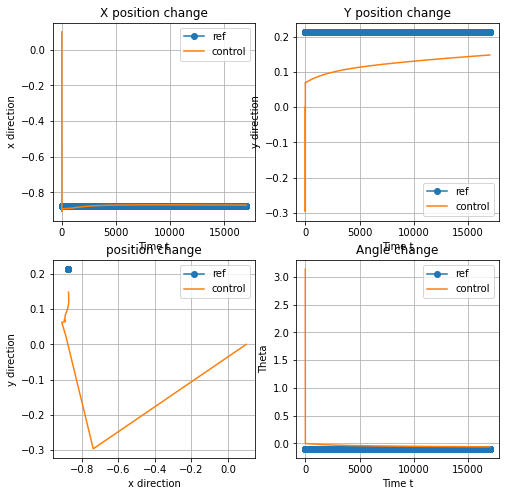

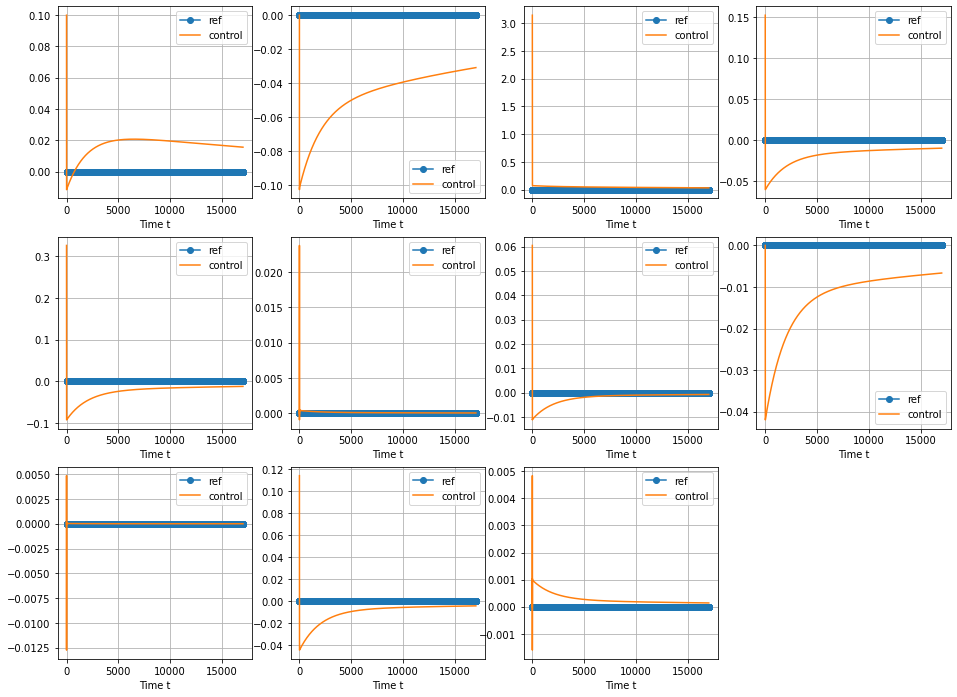

In [1]:
from LQR import dlqr_process
from numpy import pi
import numpy as np
model_file = 'unmasked_encoder_[3, 32, 64, 8]_decoder_[11, 128, 64, 32, 3]_hyper_[1.0, 3.0, 0.3, 1e-07, 1e-07, 1e-07, 10]_batch_10'
init = np.array([0.1,0.,pi])
ref = np.array([0.,0.,0.])
Q = 1000*np.diag(np.array([1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.]))
R = 1*np.diag(np.array([1.,1.]))
thre = 0.05
dlqr_process(model_file,init,ref,Q,R,thre)

In [58]:
(np.ones((1,5))-np.tri(1,5,0))[0]

array([0., 1., 1., 1., 1.])

In [1]:
import numpy as np
from Koopman_numpy import Koopman_numpy
from MPC import *

SimLength = 8
init_x = np.array([0.,0.,0.])
file=simulate_path(init_x,SimLength)
ref = np.load(file+".npy",allow_pickle=True).item()
path_ref = ref['path']
x_init = ref['init state']
diff = path_ref[:,1:]-path_ref[:,:-1]
angle = np.arctan2(diff[1,:],diff[0,:])
path_ref = np.r_[path_ref,np.c_[x_init[2],np.array([angle])]]

./dataset/MPC/SimLenth_8_Ts_0.1


In [2]:
file_name = 'encoder_[3, 32, 64, 6]_decoder_[9, 128, 64, 32, 3]_hyper_[1.0, 3.0, 0.3, 1e-07, 1e-07, 1e-07, 10]_batch_10'
operater = Koopman_numpy(file_name)
lifted_ref = np.zeros((9,path_ref.shape[1]))
for i in range(path_ref.shape[1]):
    lifted_ref[:,i] = operater.encode(path_ref[:,i])
np.save('./matlab/lower_complex/ref_4',lifted_ref)


file_name = 'encoder_[3, 32, 64, 8]_decoder_[11, 128, 64, 32, 3]_hyper_[1.0, 3.0, 0.3, 1e-07, 1e-07, 1e-07, 11]_batch_10'
operater = Koopman_numpy(file_name)
lifted_ref = np.zeros((11,path_ref.shape[1]))
for i in range(path_ref.shape[1]):
    lifted_ref[:,i] = operater.encode(path_ref[:,i])
np.save('./matlab/complex/ref_4',lifted_ref)


file_name = 'unmasked_encoder_[3, 32, 64, 8]_decoder_[11, 128, 64, 32, 3]_hyper_[1.0, 3.0, 0.3, 1e-07, 1e-07, 1e-07, 10]_batch_10'
operater = Koopman_numpy(file_name)
lifted_ref = np.zeros((11,path_ref.shape[1]))
for i in range(path_ref.shape[1]):
    lifted_ref[:,i] = operater.encode(path_ref[:,i])
np.save('./matlab/unmasked/ref_4',lifted_ref)


file_name = 'real_encoder_[3, 32, 64, 8]_decoder_[11, 128, 64, 32, 3]_hyper_[1.0, 3.0, 0.3, 1e-07, 1e-07, 1e-07, 10]_batch_10'
operater = Koopman_numpy(file_name)
lifted_ref = np.zeros((11,path_ref.shape[1]))
for i in range(path_ref.shape[1]):
    lifted_ref[:,i] = operater.encode(path_ref[:,i])
np.save('./matlab/diagonal/ref_4',lifted_ref)

In [5]:
import numpy as np
ref = np.random.rand(3,2)
print(ref)
temp = np.zeros((3,0))
temp = np.c_[temp,ref[:,0]]
for i in range(1,ref.shape[1]):
    if ref[2,i]!=ref[2,i-1]:
        temp = np.c_[temp,[ref[0,i-1],ref[1,i-1],ref[2,i]]]
    temp = np.c_[temp,ref[:,i]]
ref = temp
print(ref)

[[0.28692786 0.97332439]
 [0.67600449 0.65400753]
 [0.34575353 0.95594089]]
[[0.28692786 0.28692786 0.97332439]
 [0.67600449 0.67600449 0.65400753]
 [0.34575353 0.95594089 0.95594089]]


[[1 1]
 [2 2]
 [3 3]]
